## Optimizing Supply Chain Management

### Data Overview

In [1]:
# Importing necessary libraries for data manipulation, analysis, and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import scipy.stats as stats  # For statistical analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For advanced visualization

# Importing libraries for machine learning and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV  # For model selection and evaluation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Ensemble models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model performance metrics
from sklearn.feature_selection import RFE  # For feature selection
from xgboost import XGBRegressor  # Extreme Gradient Boosting model

# Suppressing warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Function to load data with error handling
def load_data(file_path):
    """
    Load data from a CSV file with error handling.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: Loaded data as a DataFrame if successful, None otherwise.
    """
    try:
        # Attempt to read the CSV file
        data = pd.read_csv(file_path)
        print("Data loaded successfully.")

        # Displaying the first few rows of the data
        print(data.head())
        
        # Displaying information about the data
        print(data.info())

        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
    except pd.errors.ParserError:
        print("Error: The file could not be parsed.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Loading the data from file
data = load_data('datasets/raw_data.csv')

Data loaded successfully.
  Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1             

The dataset contains 25,000 rows and 24 columns.

Here are some key details:
1. Data Types:
float64: 2, 
int64: 14, 
object: 8

2. Columns with Missing Values:
workers_num, 
wh_est_year, 
approved_wh_govt_certificate

In [3]:
# Function to check for missing values
def check_missing_values(df):
    """
    Check for missing values in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for missing values.

    Returns:
    pd.Series: Series with the count of missing values for each column, or None if the DataFrame is invalid.
    """
    if df is not None and not df.empty:
        missing_values = df.isnull().sum()
        print("Missing values in each column:")
        print(missing_values)
        return missing_values
    else:
        print("DataFrame is None or empty. Cannot check for missing values.")
        return None

# Check for missing values
missing_values = check_missing_values(data)

Missing values in each column:
Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64


Missing values for each column in the dataset:
1. workers_num: 990
2. wh_est_year: 11881
3. approved_wh_govt_certificate: 908

In [4]:
# Function to check for unique values in each column
def check_unique_values(df):
    """
    Check for unique values in each column of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to check for unique values.

    Returns:
    pd.Series: Series with the count of unique values for each column, or None if the DataFrame is invalid.
    """
    if df is not None and not df.empty:
        unique_values = df.nunique()
        print("Unique values in each column:")
        print(unique_values)
        return unique_values
    else:
        print("DataFrame is None or empty. Cannot check for unique values.")
        return None

# Check for unique values
unique_values = check_unique_values(data)

Unique values in each column:
Ware_house_ID                   25000
WH_Manager_ID                   25000
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4906
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4561
dtype: int64


Unique values in each column in the dataset:
1. Ware_house_ID and WH_Manager_ID have all unique values.

In [5]:
# Function to get summary statistics of the dataset
def get_summary_statistics(df):
    """
    Get summary statistics for the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame for which to get summary statistics.

    Returns:
    pd.DataFrame: Summary statistics of the DataFrame, or None if the DataFrame is invalid.
    """
    if df is not None and not df.empty:
        summary_statistics = df.describe().T
        print("Summary statistics for the dataset:")
        print(summary_statistics)
        return summary_statistics
    else:
        print("DataFrame is None or empty. Cannot get summary statistics.")
        return None

# Getting summary statistics of the dataset
summary_statistics = get_summary_statistics(data)

Summary statistics for the dataset:
                              count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108 

Describe

### Data Preprocessing

In [6]:
# Function to remove duplicates from the dataset
def remove_duplicates(df):
    """
    Remove duplicate rows from the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove duplicates.

    Returns:
    pd.DataFrame: DataFrame with duplicates removed, or None if the DataFrame is invalid.
    """
    if df is not None and not df.empty:
        before_removal = df.shape[0]
        df.drop_duplicates(inplace=True)
        after_removal = df.shape[0]
        print(f"Removed {before_removal - after_removal} duplicate rows.")
        return df
    else:
        print("DataFrame is None or empty. Cannot remove duplicates.")
        return None

# Remove duplicates from the data
data = remove_duplicates(data)

Removed 0 duplicate rows.


In [7]:
# Function to list columns of the dataset
def list_columns(df):
    """
    List the columns of the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns are to be listed.

    Returns:
    Index: An index object containing the column names of the DataFrame, or None if the DataFrame is invalid.
    """
    if df is not None and not df.empty:
        columns = df.columns
        print("Columns in the DataFrame:")
        print(columns)
        return columns
    else:
        print("DataFrame is None or empty. Cannot list columns.")
        return None

# Listing columns of the dataset
columns = list_columns(data)

Columns in the DataFrame:
Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')


In [8]:
# Define lists of column names for target, continuous, numeric, categorical, and ordinal columns
tar_col = ['product_wg_ton']  # Target variable column
cont_col = '''dist_from_hub workers_num wh_est_year retail_shop_num distributor_num'''.split()  # Continuous variables
dis_col = '''num_refill_req_l3m transport_issue_l1y Competitor_in_mkt storage_issue_reported_l3m wh_breakdown_l3m govt_check_l3m'''.split()  # Discrete variables
nom_col = '''Ware_house_ID WH_Manager_ID Location_type WH_capacity_size zone WH_regional_zone wh_owner_type flood_impacted flood_proof electric_supply temp_reg_mach'''.split()  # Nominal variables
ord_col = ['approved_wh_govt_certificate']  # Ordinal variable

# Dictionary of column lists
column_lists = {
    'tar_col': tar_col,
    'cont_col': cont_col,
    'dis_col': dis_col,
    'nom_col': nom_col,
    'ord_col': ord_col
}

# Function to print column lists
def print_column_lists(column_lists):
    """
    Print the lists of columns for each category.

    Parameters:
    column_lists (dict): A dictionary with column categories as keys and lists of column names as values.
    """
    print("Column lists:")
    for key, col_list in column_lists.items():
        print(f"{key}: {col_list}")

# Print column lists
print_column_lists(column_lists)

Column lists:
tar_col: ['product_wg_ton']
cont_col: ['dist_from_hub', 'workers_num', 'wh_est_year', 'retail_shop_num', 'distributor_num']
dis_col: ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']
nom_col: ['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']
ord_col: ['approved_wh_govt_certificate']


There is no clarity about basis of regional zoning. So, Let's create hypotheses.
1. Formulate Hypotheses
Null Hypothesis (H0): Regional zoning is not influenced by market factors.
Alternative Hypothesis (H1): Regional zoning is influenced by market factors.
2. Select Appropriate Test
ANOVA (Analysis of Variance): To compare the means of market factors (number of competitors and number of retail shops) across different regional zones.
3. Determine Significance Level
Set the significance level (α) at 0.05.

In [9]:
# Perform ANOVA for numerical variables
anova_results = {}
num_vars = ['Competitor_in_mkt', 'retail_shop_num']

for variable in num_vars:
    anova_results[variable] = stats.f_oneway(
        data[data['WH_regional_zone'] == 'Zone 1'][variable],
        data[data['WH_regional_zone'] == 'Zone 2'][variable],
        data[data['WH_regional_zone'] == 'Zone 3'][variable],
        data[data['WH_regional_zone'] == 'Zone 4'][variable],
        data[data['WH_regional_zone'] == 'Zone 5'][variable],
        data[data['WH_regional_zone'] == 'Zone 6'][variable]
    )

# Print the results
for var, result in anova_results.items():
    print(f"{var}: F-statistic = {result.statistic}, p-value = {result.pvalue}")

Competitor_in_mkt: F-statistic = 40.63095139045458, p-value = 8.944817893825384e-42
retail_shop_num: F-statistic = 33.19681203030872, p-value = 6.833898709228454e-34


In [10]:
# Make a decision and draw conclusions
print("\nDecision and Conclusions:")
for var, result in anova_results.items():
    if result.pvalue <= 0.05:
        print(f"Reject the null hypothesis for {var}. There are significant differences in {var} across regional zones.")
    else:
        print(f"Fail to reject the null hypothesis for {var}. There are no significant differences in {var} across regional zones.")


Decision and Conclusions:
Reject the null hypothesis for Competitor_in_mkt. There are significant differences in Competitor_in_mkt across regional zones.
Reject the null hypothesis for retail_shop_num. There are significant differences in retail_shop_num across regional zones.


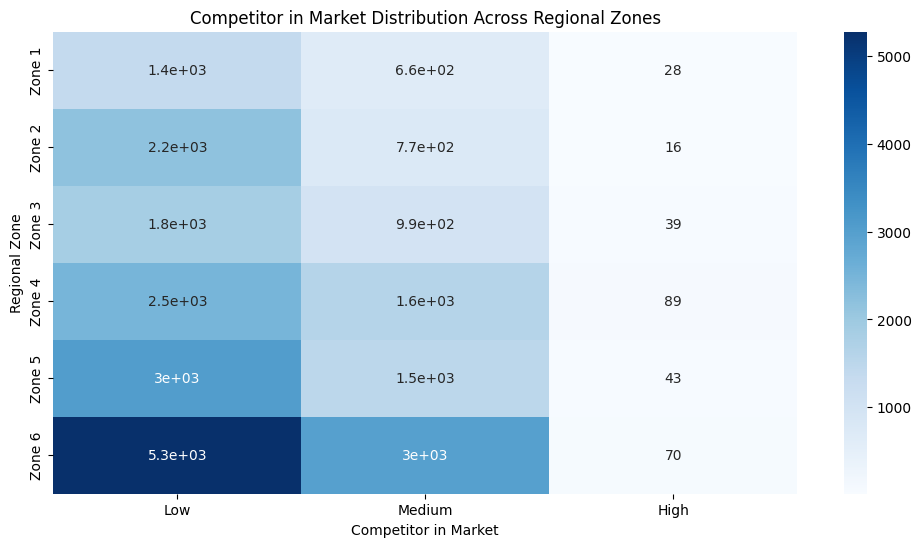

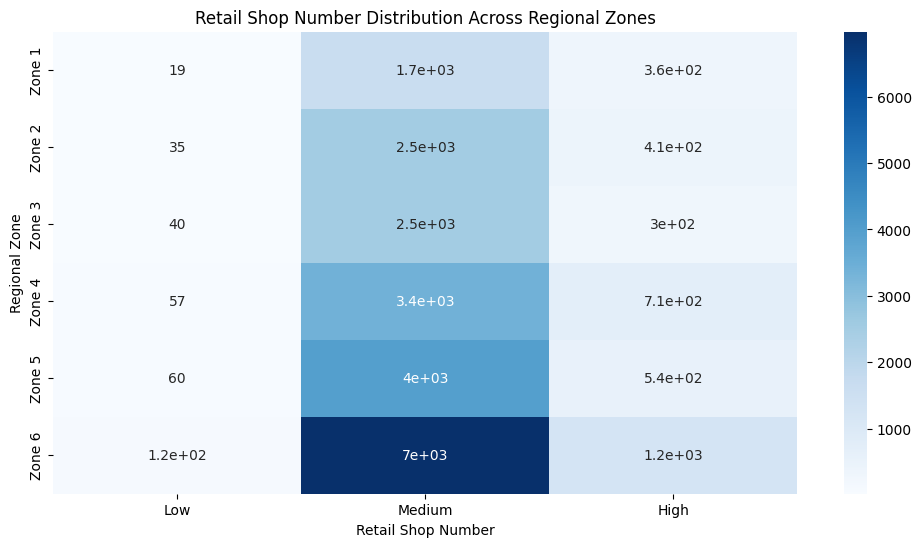

In [11]:
# Define custom bins for Competitor_in_mkt and retail_shop_num
competitor_bins = [0, 3, 6, data['Competitor_in_mkt'].max()]
retail_shop_bins = [0, 3000, 6000, data['retail_shop_num'].max()]

# Create bin labels
competitor_labels = ['Low', 'Medium', 'High']
retail_shop_labels = ['Low', 'Medium', 'High']

# Bin the numerical variables using custom bins
data['Competitor_in_mkt_bins'] = pd.cut(data['Competitor_in_mkt'], bins=competitor_bins, labels=competitor_labels, include_lowest=True)
data['retail_shop_num_bins'] = pd.cut(data['retail_shop_num'], bins=retail_shop_bins, labels=retail_shop_labels, include_lowest=True)

# Create cross-tabulations
competitor_crosstab = pd.crosstab(data['WH_regional_zone'], data['Competitor_in_mkt_bins'])
retail_shop_crosstab = pd.crosstab(data['WH_regional_zone'], data['retail_shop_num_bins'])

# Plot heatmaps
plt.figure(figsize=(12, 6))
sns.heatmap(competitor_crosstab, annot=True, cmap='Blues')
plt.title('Competitor in Market Distribution Across Regional Zones')
plt.xlabel('Competitor in Market')
plt.ylabel('Regional Zone')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(retail_shop_crosstab, annot=True, cmap='Blues')
plt.title('Retail Shop Number Distribution Across Regional Zones')
plt.xlabel('Retail Shop Number')
plt.ylabel('Regional Zone')
plt.show()

Overall Conclusion:
1. Market Competition: There are significant differences in market competition (number of competitors) across the regional zones, suggesting a hierarchical structure.
2. Retail Presence: There are significant differences in retail presence (number of retail shops) across the regional zones, reinforcing the hierarchical nature.

Implications:
Hierarchical Structure: Higher zones might correspond to regions with higher market competition and more retail shops.

In [12]:
nom_col = '''Ware_house_ID WH_Manager_ID Location_type WH_capacity_size zone wh_owner_type flood_impacted flood_proof electric_supply temp_reg_mach'''.split()
ord_col = ['approved_wh_govt_certificate', 'WH_regional_zone']

# Dictionary of column lists
column_lists = {
    'tar_col': tar_col,
    'cont_col': cont_col,
    'dis_col': dis_col,
    'nom_col': nom_col,
    'ord_col': ord_col
}

# Print column lists
print("Column lists:")
for key, col_list in column_lists.items():
    print(f"{key}: {col_list}")

Column lists:
tar_col: ['product_wg_ton']
cont_col: ['dist_from_hub', 'workers_num', 'wh_est_year', 'retail_shop_num', 'distributor_num']
dis_col: ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']
nom_col: ['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach']
ord_col: ['approved_wh_govt_certificate', 'WH_regional_zone']


In [13]:
# Function to drop specified columns and update column lists
def drop_irrelevant_columns(df, columns_to_drop, column_lists):
    """
    Drop specified columns from the DataFrame and update column lists.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to drop columns.
    columns_to_drop (list): List of columns to be dropped.
    column_lists (dict): Dictionary of column lists to be updated.

    Returns:
    pd.DataFrame: DataFrame with specified columns dropped.
    """
    if df is not None and not df.empty:
        before_dropping = df.shape[1]
        
        # Drop specified columns
        df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')
        after_dropping = df.shape[1]
        dropped_columns = before_dropping - after_dropping
        print(f"Dropped {dropped_columns} irrelevant columns.")
        
        # Update column lists
        for col in columns_to_drop:
            for key, col_list in column_lists.items():
                if col in col_list:
                    col_list.remove(col)
        
        print("Remaining columns:")
        print(df.columns)
        return df
    else:
        print("DataFrame is None or empty. Cannot drop columns.")
        return None

# Drop irrelevant columns from the data
columns_to_drop = ['Ware_house_ID', 'WH_Manager_ID']
data = drop_irrelevant_columns(data, columns_to_drop, column_lists)

# Print updated column lists
print("Updated Column Lists:")
for key, col_list in column_lists.items():
    print(f"{key}: {col_list}")

Dropped 2 irrelevant columns.
Remaining columns:
Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'Competitor_in_mkt_bins', 'retail_shop_num_bins'],
      dtype='object')
Updated Column Lists:
tar_col: ['product_wg_ton']
cont_col: ['dist_from_hub', 'workers_num', 'wh_est_year', 'retail_shop_num', 'distributor_num']
dis_col: ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'storage_issue_reported_l3m', 'wh_breakdown_l3m', 'govt_check_l3m']
nom_col: ['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type', 'flood_impacted', 'flood_proof', 'electric_supp

In [14]:
# Set the overall theme and color palette for Seaborn plots
sns.set_theme(style="whitegrid")
print("Seaborn theme set to 'whitegrid'.")

# Available colors and plot sizes
colors = ['dodgerblue', 'gold', 'salmon']
plot_sizes = [(12, 6), (12, 12), (16, 12)]

Seaborn theme set to 'whitegrid'.


Handling missing values

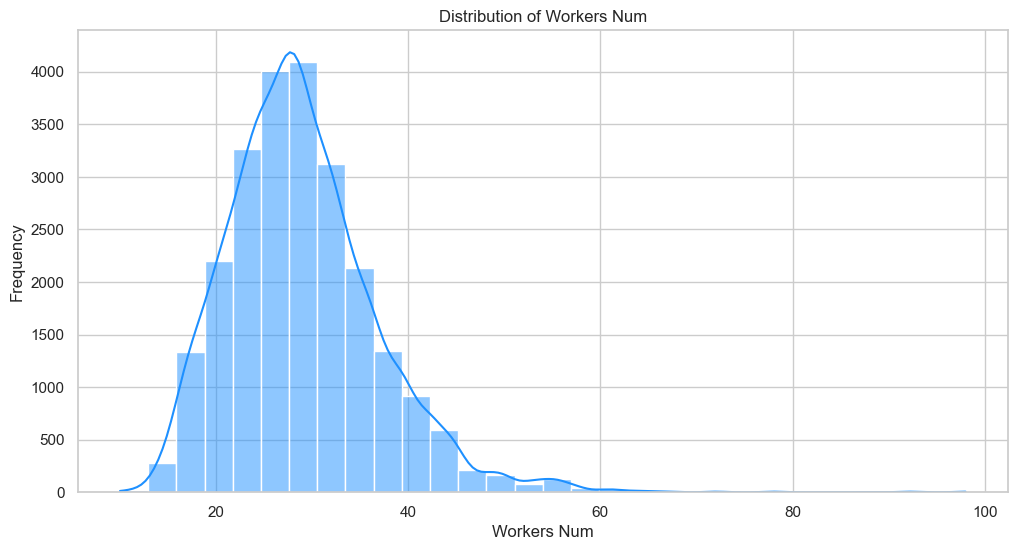

In [15]:
# Function to plot the distribution of a specified column
def plot_frequency_distribution(df, column_name, color='dodgerblue', plot_size=(12, 6)):
    """
    Plot the distribution of a specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to plot.
    color (str): The color for the plot (default is 'dodgerblue').
    plot_size (tuple): The size of the plot (default is (12, 6)).

    Returns:
    None
    """
    if df is not None and not df.empty:
        if column_name in df.columns and (column_name in cont_col or column_name in tar_col):
            plt.figure(figsize=plot_size)
            sns.histplot(df[column_name].dropna(), kde=True, color=color, bins=30)
            plt.title(f'Distribution of {column_name.replace("_", " ").title()}')
            plt.xlabel(column_name.replace('_', ' ').title())
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column '{column_name}' not found in the DataFrame or is not a recognized continuous/target column.")
    else:
        print("DataFrame is None or empty. Cannot plot distribution.")

# Plot the distribution of the number of workers
plot_frequency_distribution(data, 'workers_num')

Few insights from the plot:
1. Shape of the Distribution: The distribution is roughly symmetrical with a slight skew to the right, indicating that most warehouses have a moderate number of workers.
2. Central Tendency: The peak of the distribution suggests that the most common number of workers is around 30.
3. Spread: The number of workers varies significantly, ranging from about 10 to 60, with a few outliers extending up to 98.

In [16]:
# Function to impute missing values in a specified column using a specified method
def impute_missing_values(df, column_name, method='mean'):
    """
    Impute missing values in a specified column using the specified method (mean, median, mode).

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which to impute missing values.
    method (str): The method to use for imputation ('mean', 'median', 'mode').

    Returns:
    pd.DataFrame: The DataFrame with imputed values.
    """
    if df is not None and not df.empty:
        if column_name in df.columns:
            if method == 'mean':
                value = df[column_name].mean()
            elif method == 'median':
                value = df[column_name].median()
            elif method == 'mode':
                value = df[column_name].mode()[0]
            else:
                print(f"Method '{method}' is not recognized. Use 'mean', 'median', or 'mode'.")
                return df
            
            df[column_name].fillna(value, inplace=True)
            print(f"Missing values in '{column_name}' have been imputed with the {method} value: {value}")
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")
    else:
        print("DataFrame is None or empty. Cannot impute missing values.")

    return df

# Impute missing values for the number of workers with the median
data = impute_missing_values(data, 'workers_num', method='median')

Missing values in 'workers_num' have been imputed with the median value: 28.0


Justification: We use median imputation because it is more robust to outliers compared to mean.

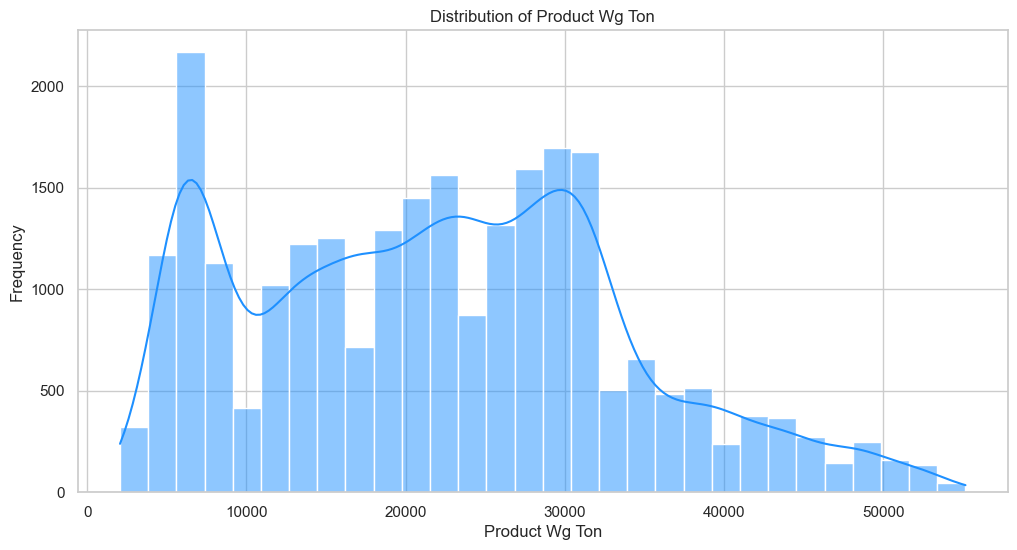

In [17]:
# Plot the distribution of the target variable
# Plotting the distribution of the target variable 'product_wg_ton'
plot_frequency_distribution(data, 'product_wg_ton')

Few insights from the plot:
1. Shape of the Distribution: The distribution appears to be roughly symmetrical, indicating a fairly even spread of product weights across the dataset.
2. Central Tendency: The peak of the distribution suggests that the most common product weights are around the central value.
3. Spread: The product weights vary significantly, ranging from around 2000 tons to over 55000 tons.
4. Density Plot: The KDE (Kernel Density Estimate) line provides a smooth estimate of the distribution, further highlighting the central tendency and spread.
5. Outliers: There are no significant outliers visible, which suggests that the data does not have extreme values that might skew the analysis.

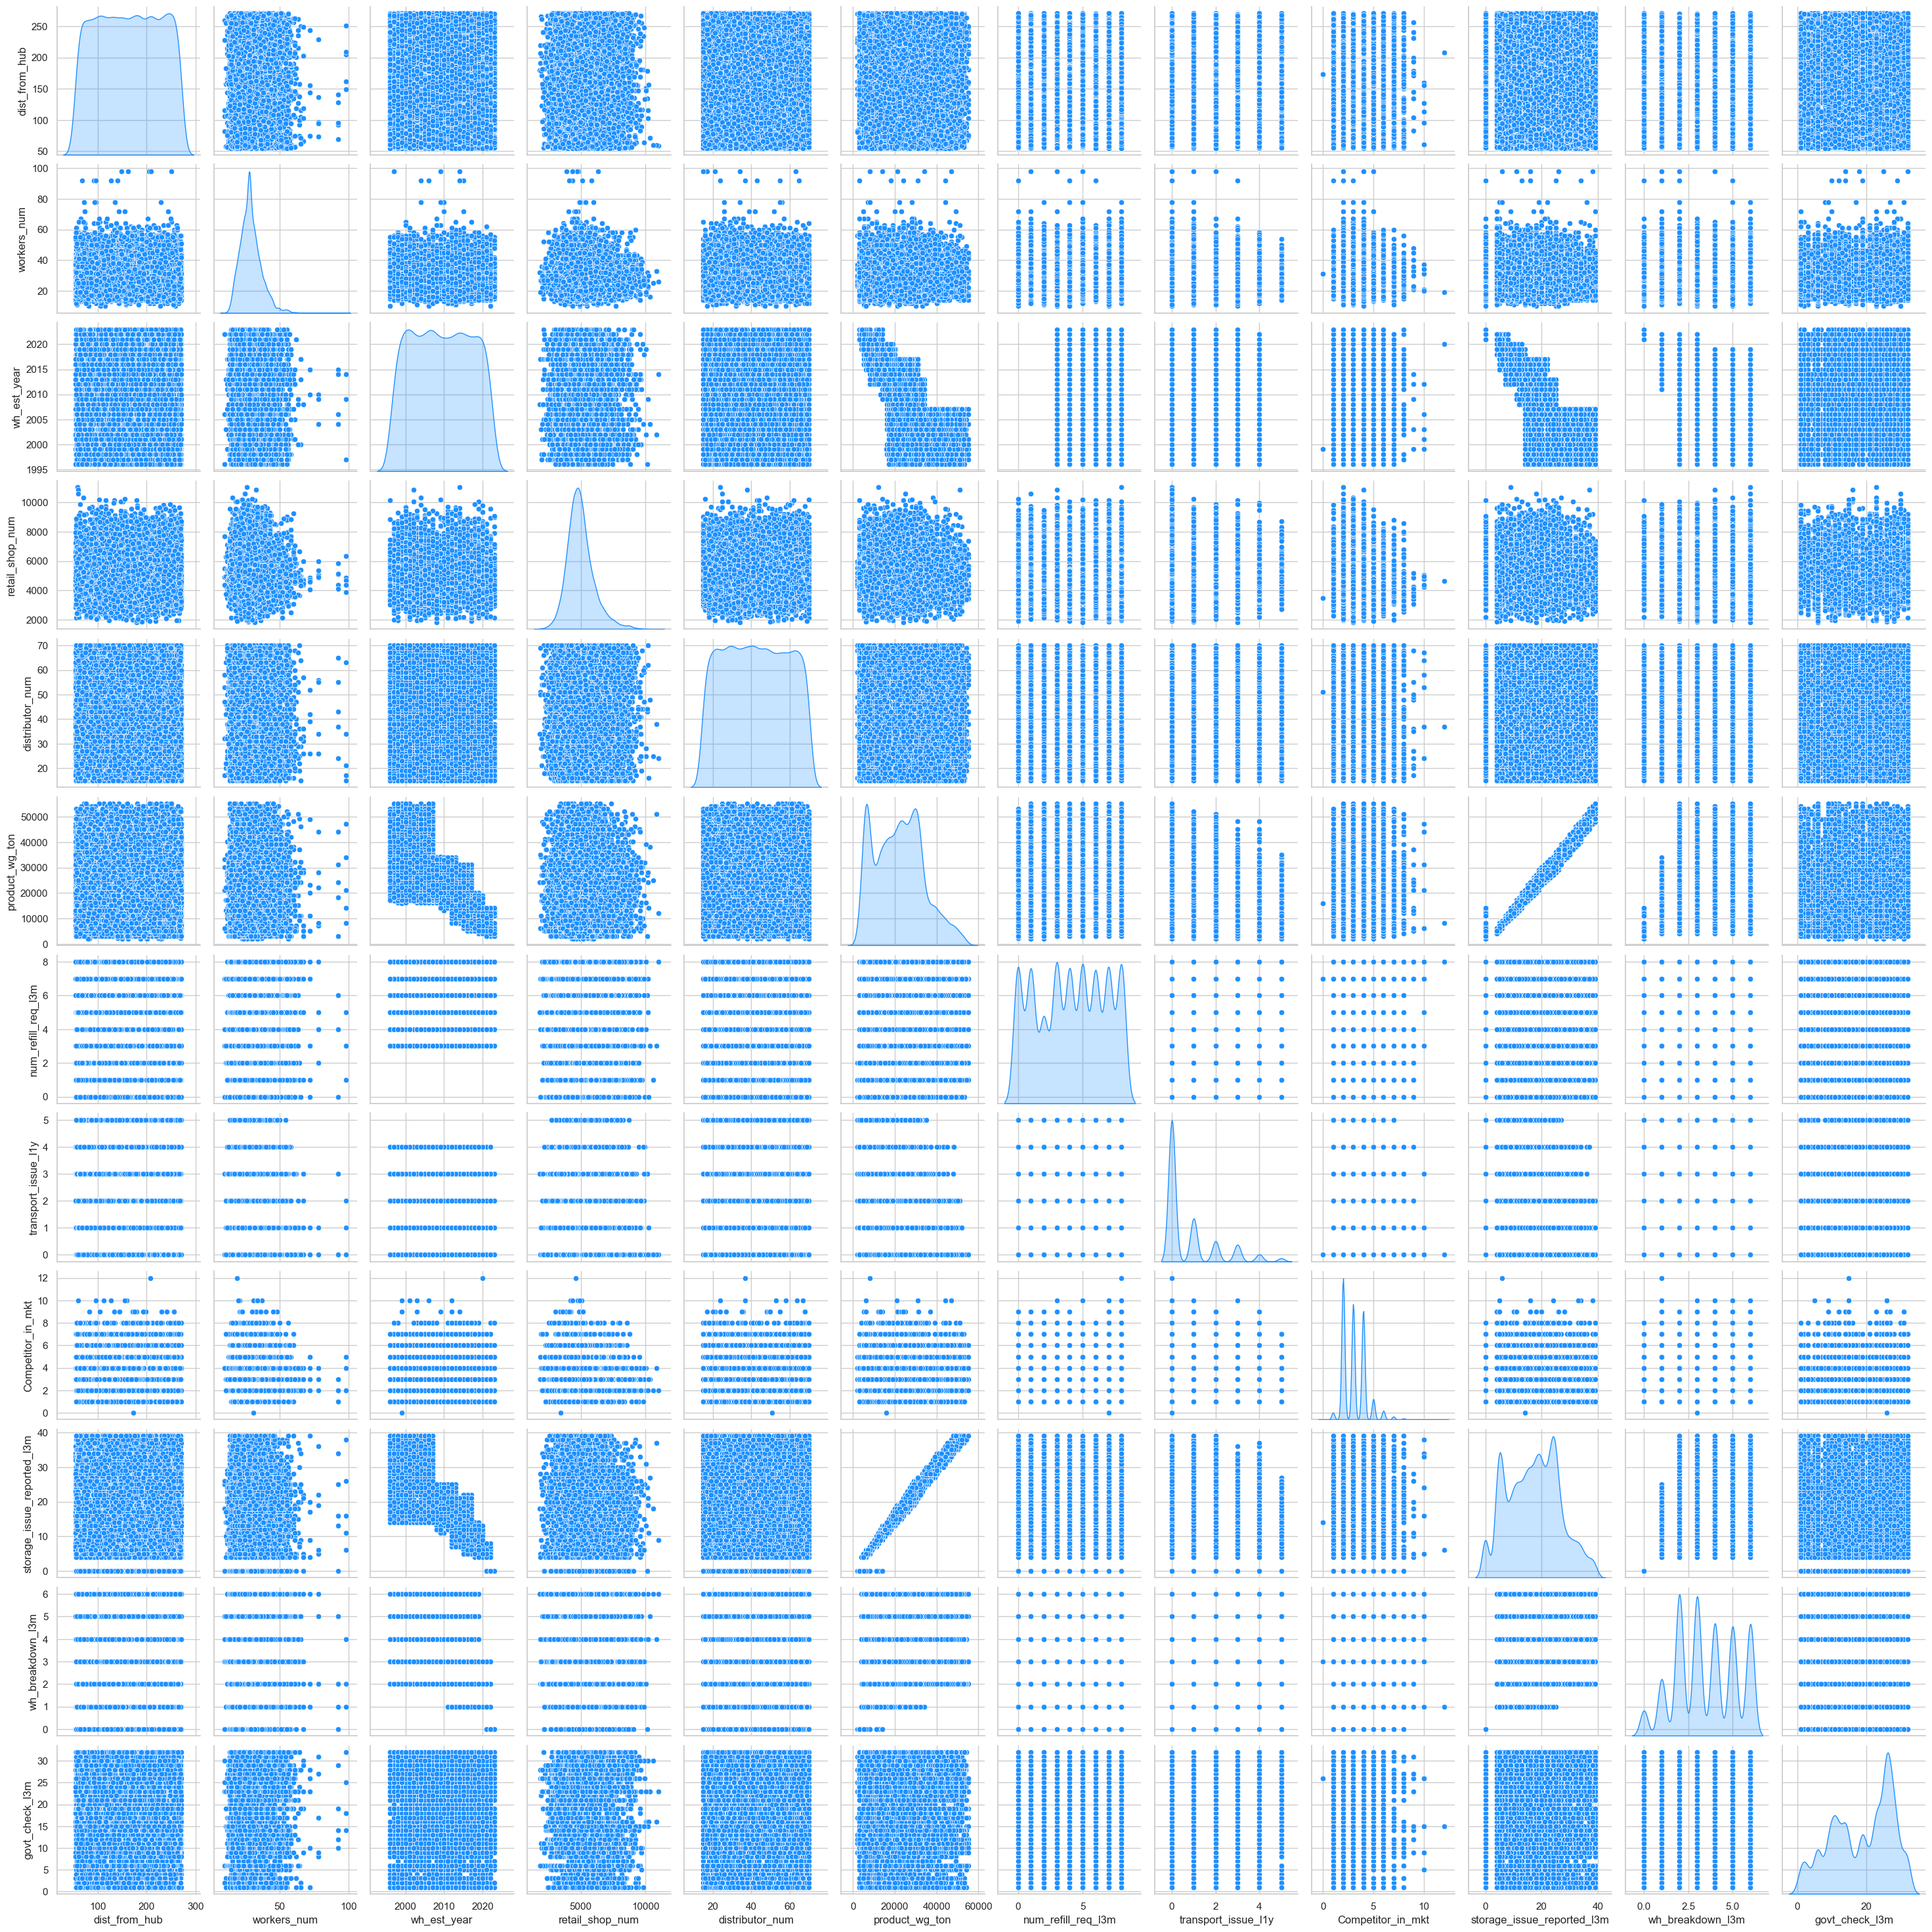

In [18]:
# Function to create a subset of the DataFrame and plot a pair plot
def plot_pairplot(df, cont_col, tar_col, dis_col, colors):
    """
    Create a subset of the DataFrame and plot a pair plot.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cont_col (list): List of continuous column names.
    tar_col (list): List of target column names.
    dis_col (list): List of discrete column names.
    colors (list): List of colors for the plot.

    Returns:
    None
    """
    required_cols = cont_col + tar_col + dis_col
    if df is not None and not df.empty:
        missing_cols = [col for col in required_cols if col not in df.columns]
        if not missing_cols:
            data_subset = df[required_cols]

            # Create a pair plot using the global theme and custom color
            sns.pairplot(data_subset, diag_kind='kde', plot_kws={'color': colors[0]}, diag_kws={'color': colors[0]})
            plt.show()
        else:
            print(f"The following required columns are missing in the DataFrame: {missing_cols}")
    else:
        print("DataFrame is None or empty. Cannot create pair plot.")

# Plot the pair plot
plot_pairplot(data, cont_col, tar_col, dis_col, colors)

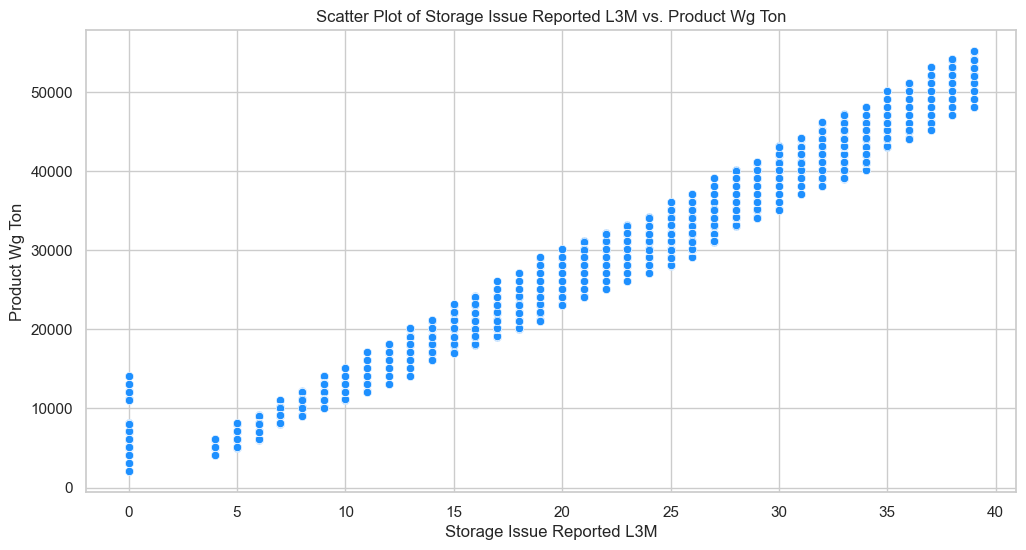

In [19]:
# Function to create a scatter plot with two passable variables
def plot_scatter(df, x_col, y_col, color='dodgerblue', plot_size=(12, 6)):
    """
    Create a scatter plot with the specified x and y columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The name of the column for the x-axis.
    y_col (str): The name of the column for the y-axis.
    color (str): The color for the scatter plot points (default is 'dodgerblue').
    plot_size (tuple): The size of the plot (default is (12, 6)).

    Returns:
    None
    """
    if df is not None and not df.empty:
        if x_col in df.columns and y_col in df.columns:
            if (x_col in cont_col or x_col in dis_col or x_col in tar_col) and (y_col in cont_col or y_col in dis_col or y_col in tar_col):
                plt.figure(figsize=plot_size)  # Set the size of the figure
                sns.scatterplot(x=df[x_col], y=df[y_col], color=color)  # Create the scatter plot
                plt.title(f'Scatter Plot of {x_col.replace("_", " ").title()} vs. {y_col.replace("_", " ").title()}')  # Set the title of the plot
                plt.xlabel(x_col.replace("_", " ").title())  # Set the x-axis label
                plt.ylabel(y_col.replace("_", " ").title())  # Set the y-axis label
                plt.show()  # Display the plot
            else:
                print(f"Columns '{x_col}' and/or '{y_col}' are not in the specified continuous, discrete, or target columns.")
        else:
            print(f"One or both columns '{x_col}' and '{y_col}' not found in the DataFrame.")
    else:
        print("DataFrame is None or empty. Cannot create scatter plot.")

# Example usage: Create a scatter plot for 'storage_issue_reported_l3m' vs 'product_wg_ton'
plot_scatter(data, 'storage_issue_reported_l3m', 'product_wg_ton')

In [20]:
# Function to check for instances with a specific value/category in a specified column
def check_instances_with_value(df, column_name, value=pd.NA):
    """
    Check for instances with a specific value/category in a specified column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to check for the specific value.
    value: The specific value or category to look for in the column (default is pd.NA for missing values).

    Returns:
    pd.DataFrame: DataFrame containing the instances with the specific value in the specified column, or None if column is not found.
    """
    if df is not None and not df.empty:
        if column_name in df.columns:
            if pd.isna(value):
                instances = df[df[column_name].isna()]
                value_display = 'NaN'
            else:
                instances = df[df[column_name] == value]
                value_display = value
            num_instances = instances.shape[0]
            print(f"Number of instances with value {value_display} in column '{column_name}': {num_instances}")
            return instances
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")
            return None
    else:
        print("DataFrame is None or empty. Cannot check for instances.")
        return None

# Check for instances with value 0 in the 'storage_issue_reported_l3m' column
value_instances = check_instances_with_value(data, 'storage_issue_reported_l3m', 0)

Number of instances with value 0 in column 'storage_issue_reported_l3m': 908


In [21]:
# Display the corresponding 'approved_wh_govt_certificate' column
if value_instances is not None and not value_instances.empty:
    print("Corresponding 'approved_wh_govt_certificate' values:")
    print(value_instances[['approved_wh_govt_certificate']])

Corresponding 'approved_wh_govt_certificate' values:
      approved_wh_govt_certificate
28                             NaN
35                             NaN
38                             NaN
99                             NaN
117                            NaN
...                            ...
24887                          NaN
24897                          NaN
24902                          NaN
24934                          NaN
24961                          NaN

[908 rows x 1 columns]


In [22]:
# Function to drop rows with missing values or a specific value in a specified column
def drop_rows_with_value(df, column_name, value=None):
    """
    Drop rows with missing values or a specific value in a specified column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to check for missing or specific values.
    value: The specific value to look for in the column. If None, rows with missing values are dropped.

    Returns:
    None
    """
    if df is not None and not df.empty:
        if column_name in df.columns:
            if value is None:
                # Drop rows with missing values in the specified column
                df.dropna(subset=[column_name], inplace=True)
                print(f"Rows with missing values in column '{column_name}' have been dropped.")
            else:
                # Drop rows with the specific value in the specified column
                df.drop(df[df[column_name] == value].index, inplace=True)
                print(f"Rows with value '{value}' in column '{column_name}' have been dropped.")
        else:
            print(f"Column '{column_name}' not found in the DataFrame.")
    else:
        print("DataFrame is None or empty. Cannot drop rows.")

# Drop rows with missing values in 'approved_wh_govt_certificate'
drop_rows_with_value(data, 'approved_wh_govt_certificate')

Rows with missing values in column 'approved_wh_govt_certificate' have been dropped.


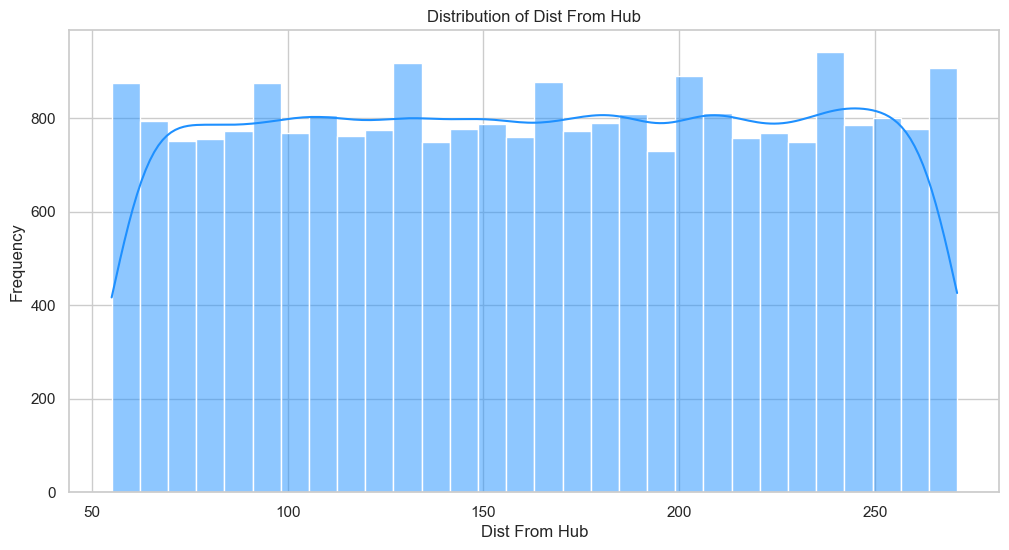

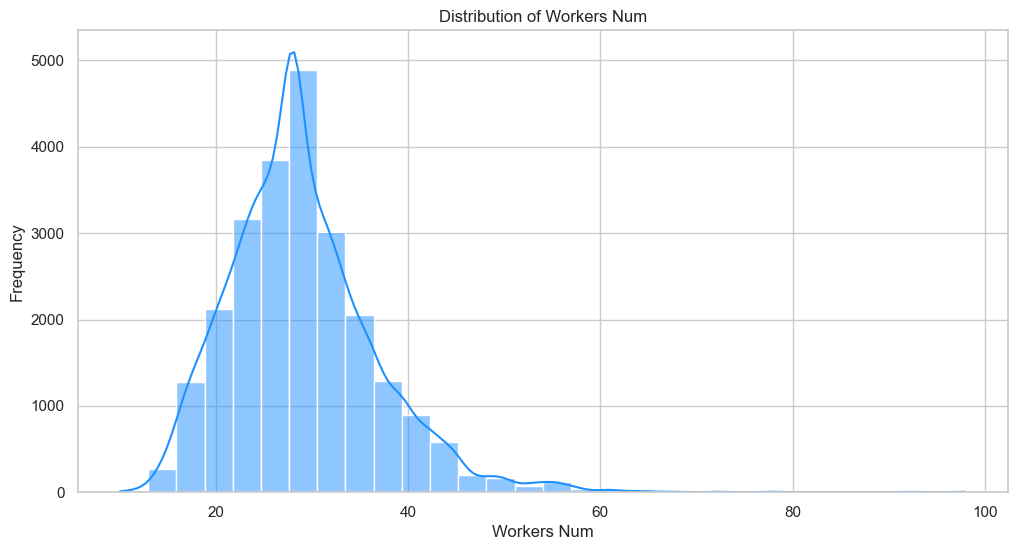

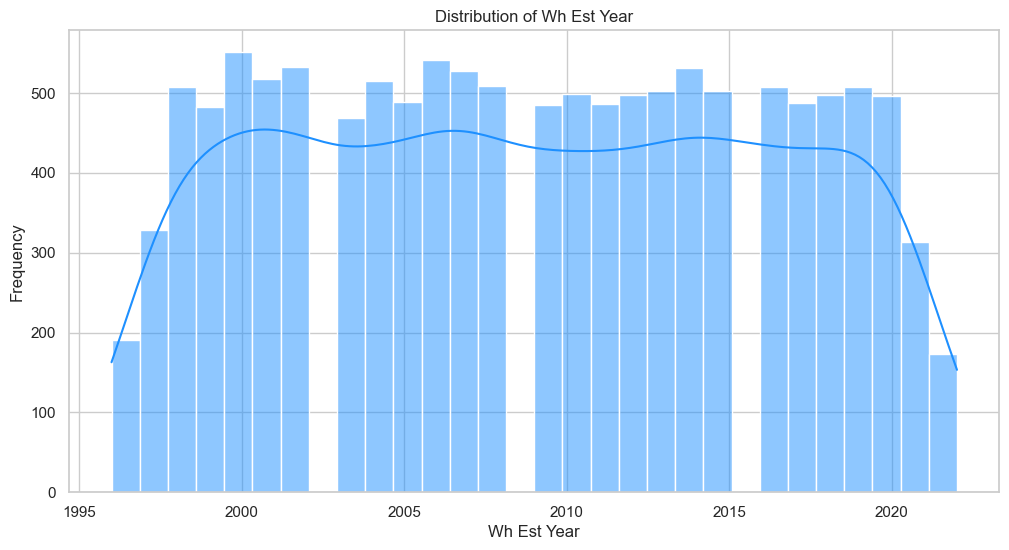

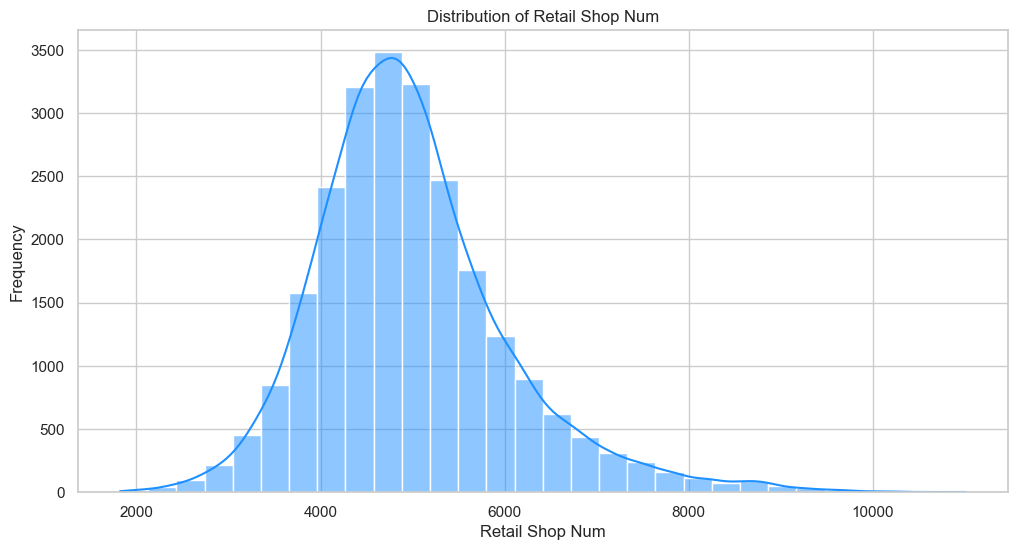

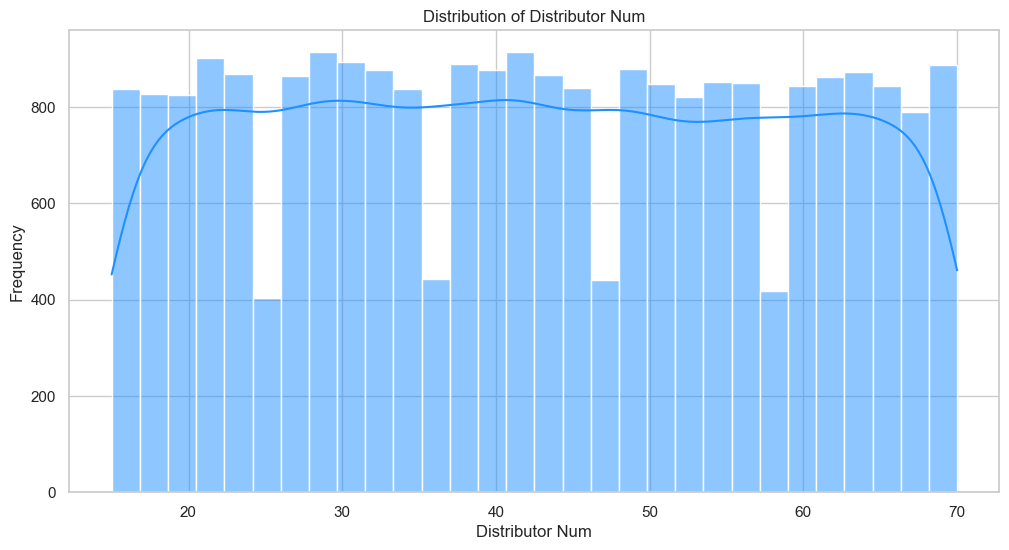

In [23]:
# Loop through each numerical column and plot the distribution
# Plotting the distribution for each numerical column
for column in cont_col:
    plot_frequency_distribution(data, column)

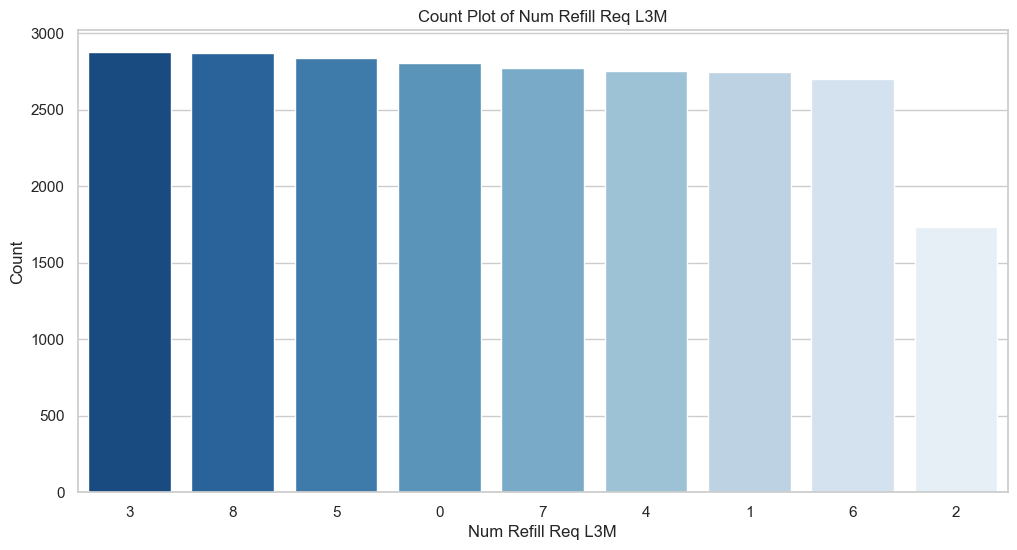

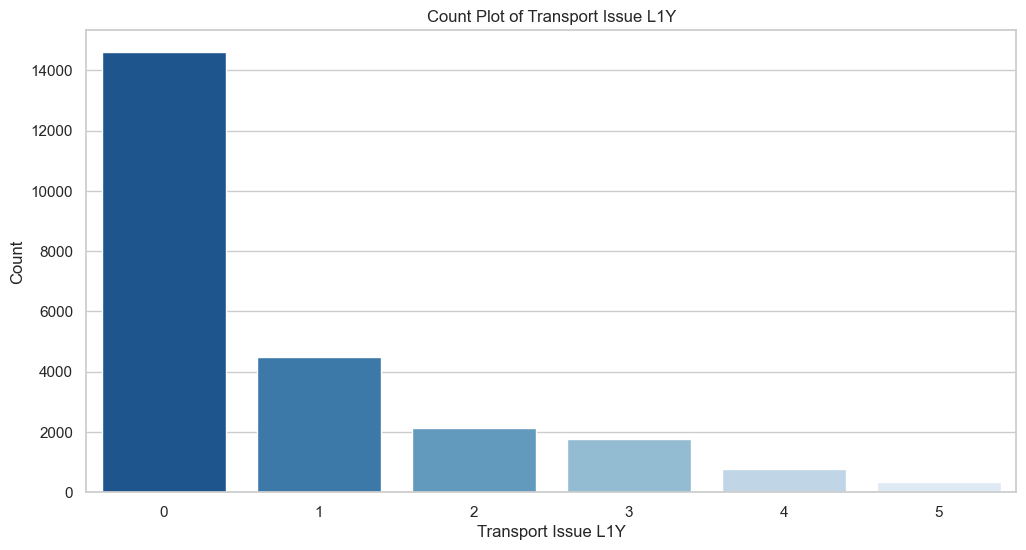

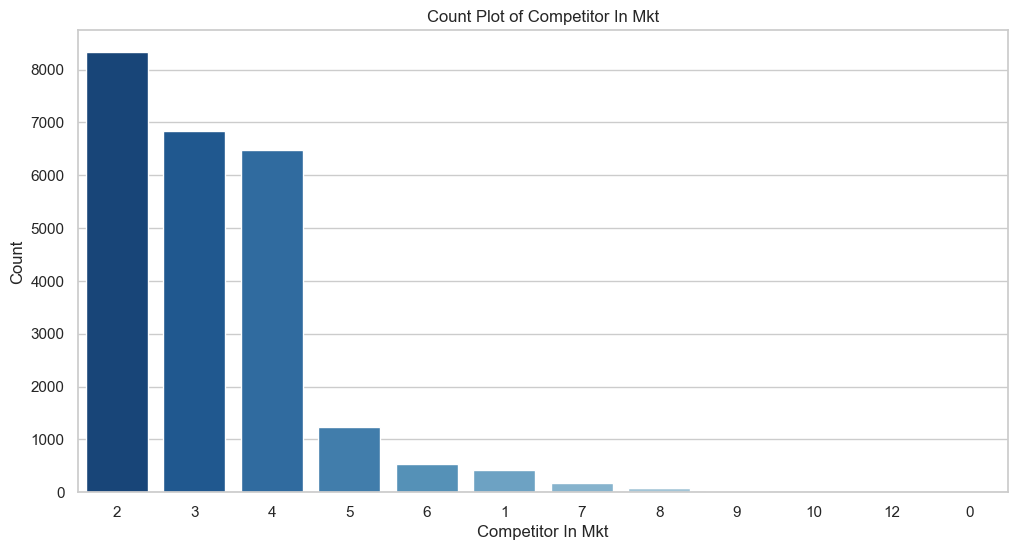

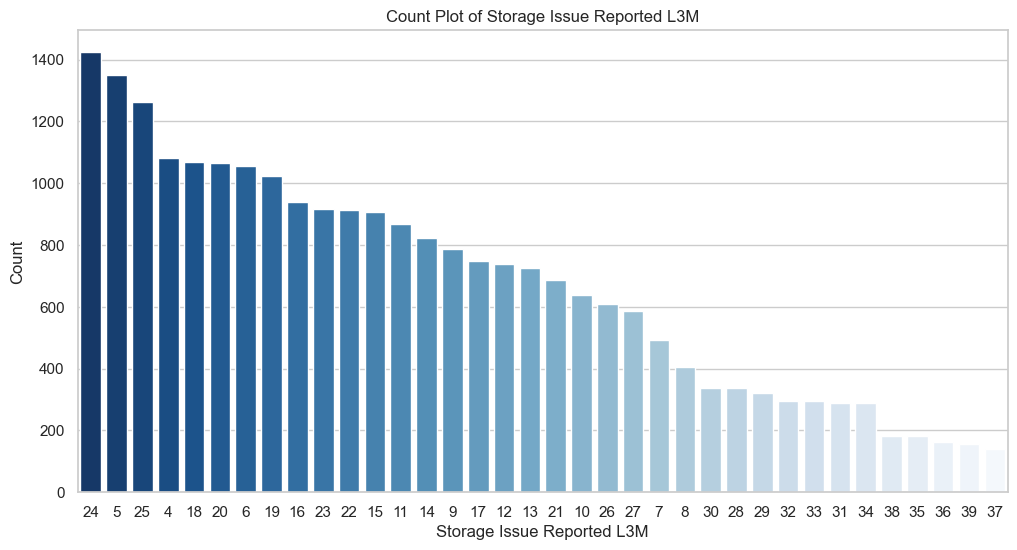

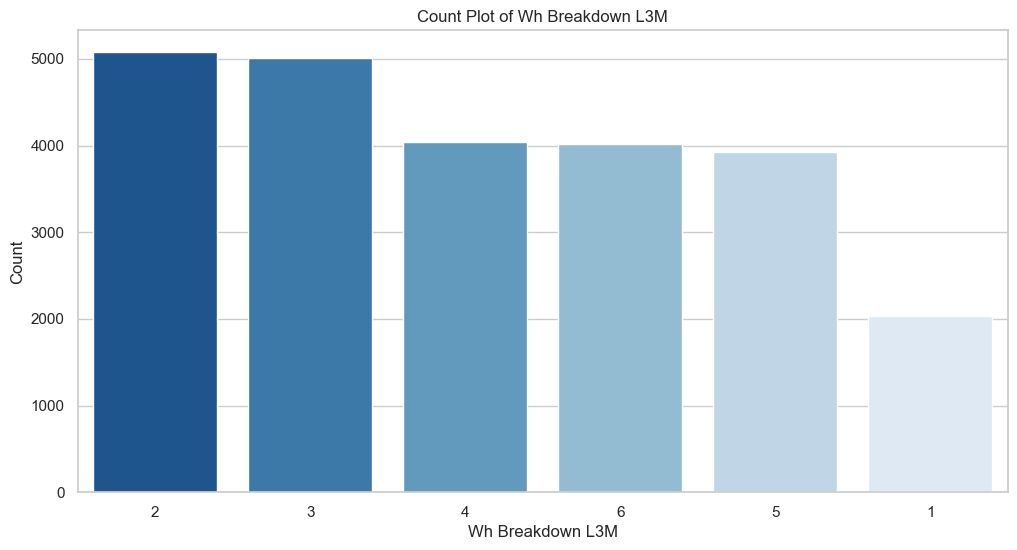

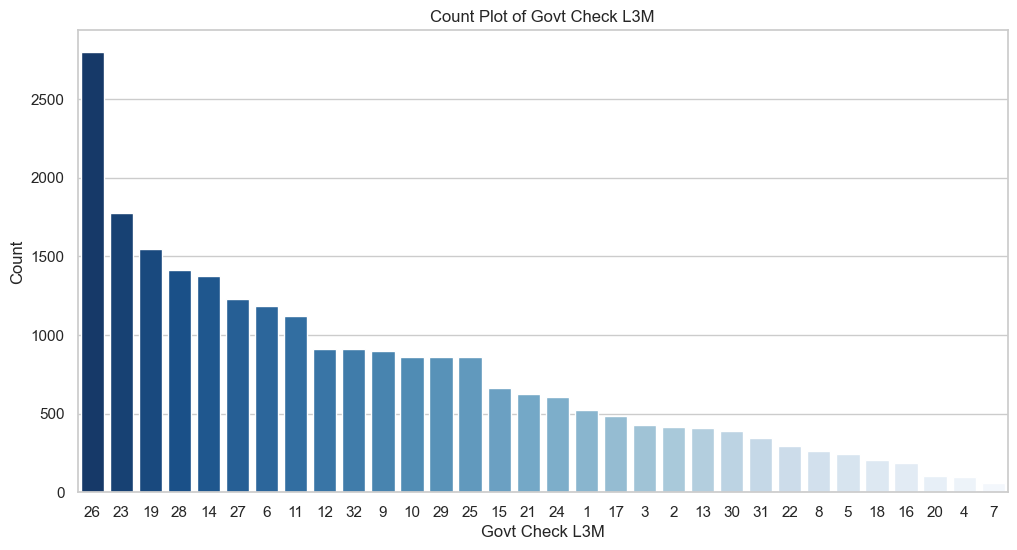

In [84]:
# Function to create count plot for discrete and nominal columns with blue gradient color
def plot_count_with_gradient(df, column_name, plot_size=(12, 6)):
    """
    Create a count plot for a specified discrete or nominal column with blue gradient color.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which the count plot is to be created.
    plot_size (tuple): The size of the plot (default is (12, 6)).

    Returns:
    None
    """
    if df is not None and not df.empty:
        if column_name in df.columns and (column_name in dis_col or column_name in nom_col or column_name in ord_col):
            plt.figure(figsize=plot_size)  # Set the size of the figure
            # Create the count plot with blue gradient color
            palette = sns.color_palette('Blues')[::-1]
            sns.countplot(x=df[column_name], palette='Blues_r', order=df[column_name].value_counts().index)
            plt.title(f'Count Plot of {column_name.replace("_", " ").title()}')  # Set the title of the plot
            plt.xlabel(column_name.replace('_', ' ').title())  # Set the x-axis label
            plt.ylabel('Count')  # Set the y-axis label
            plt.show()  # Display the plot
        else:
            print(f"Column '{column_name}' not found in the DataFrame or is not a recognized discrete/nominal/ordinal column.")
    else:
        print("DataFrame is None or empty. Cannot create count plot.")

# Loop through each nominal column and plot the count plot with blue gradient color
for column in dis_col:
    plot_count_with_gradient(data, column)


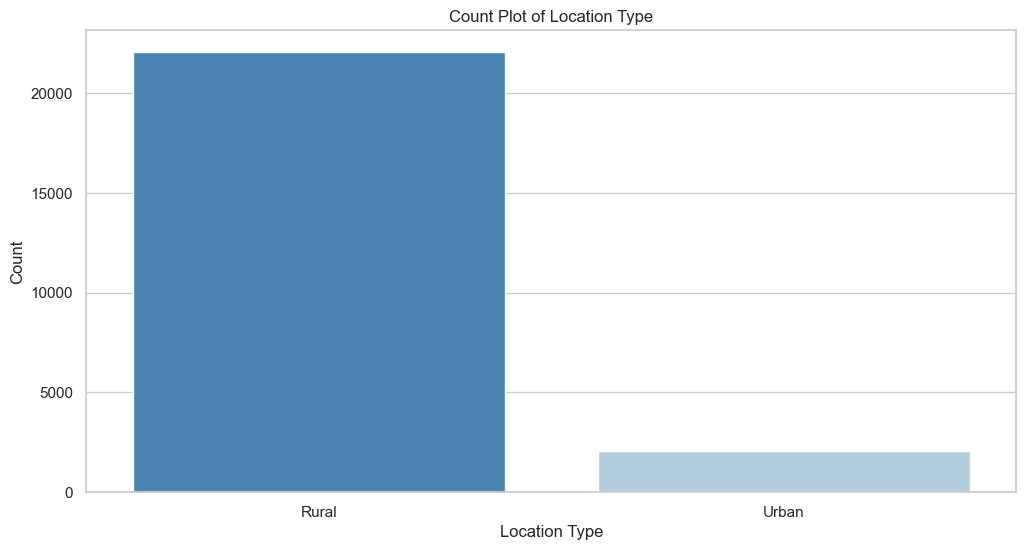

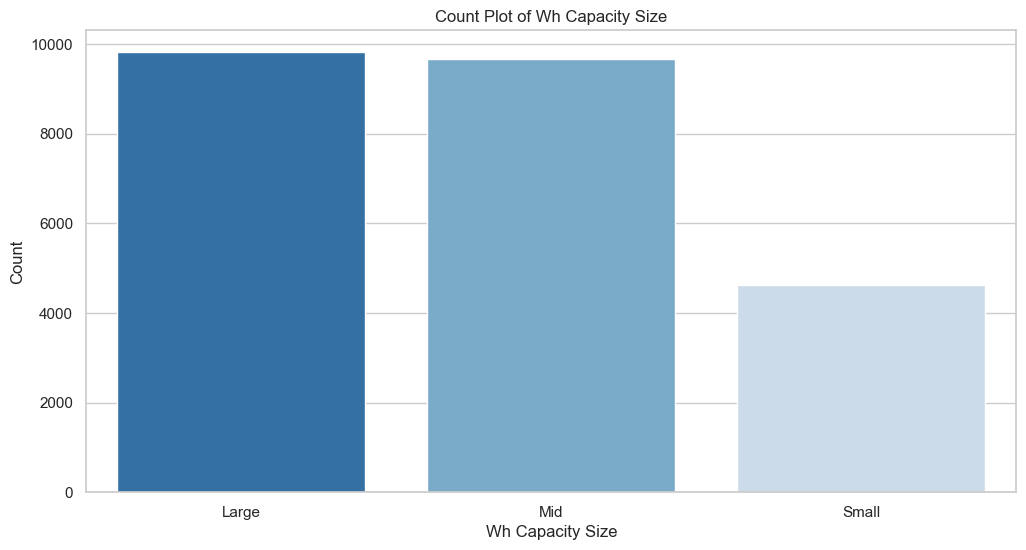

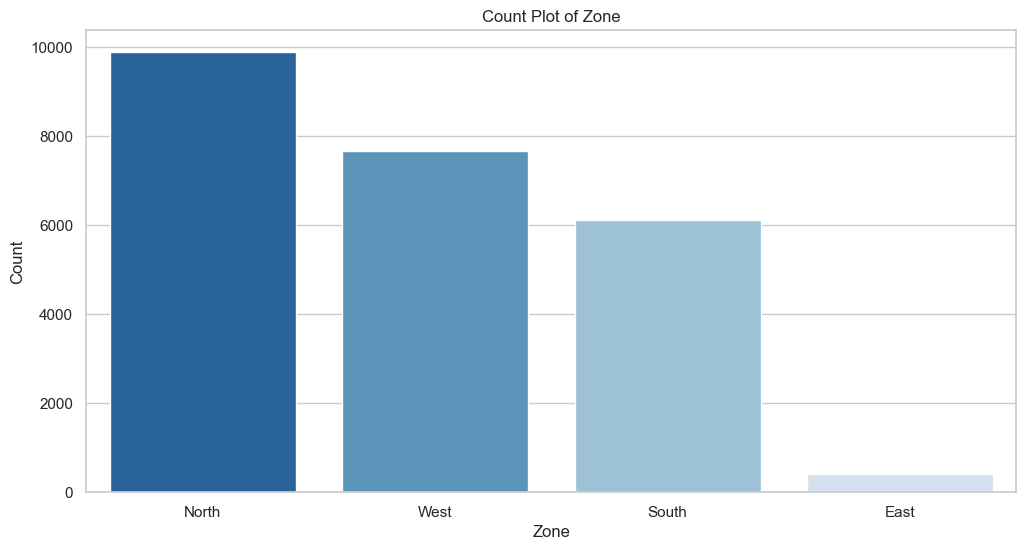

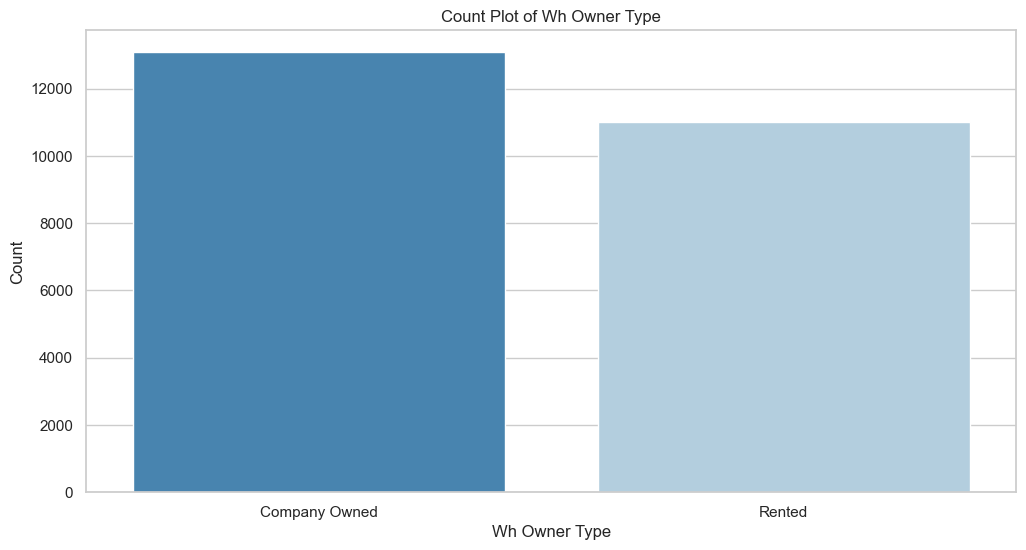

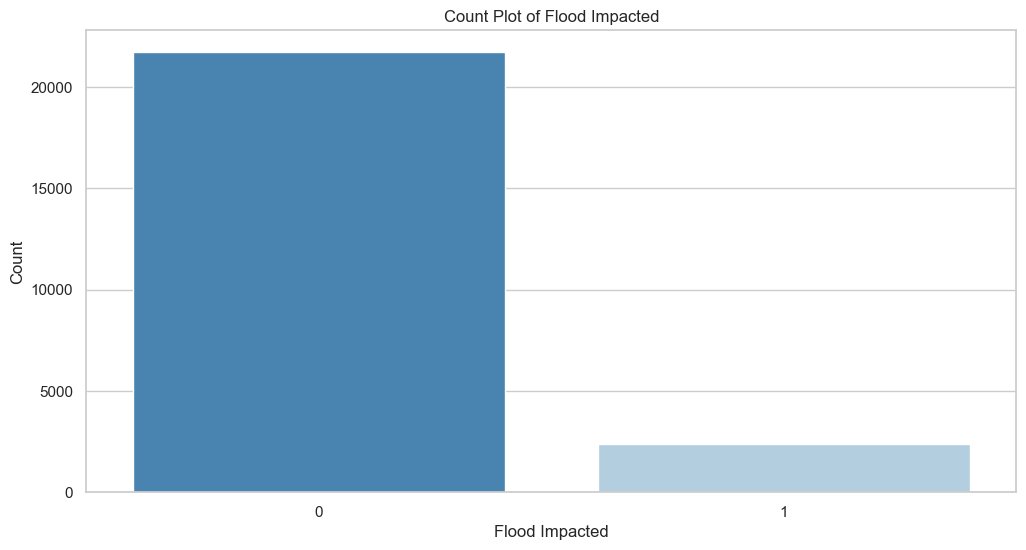

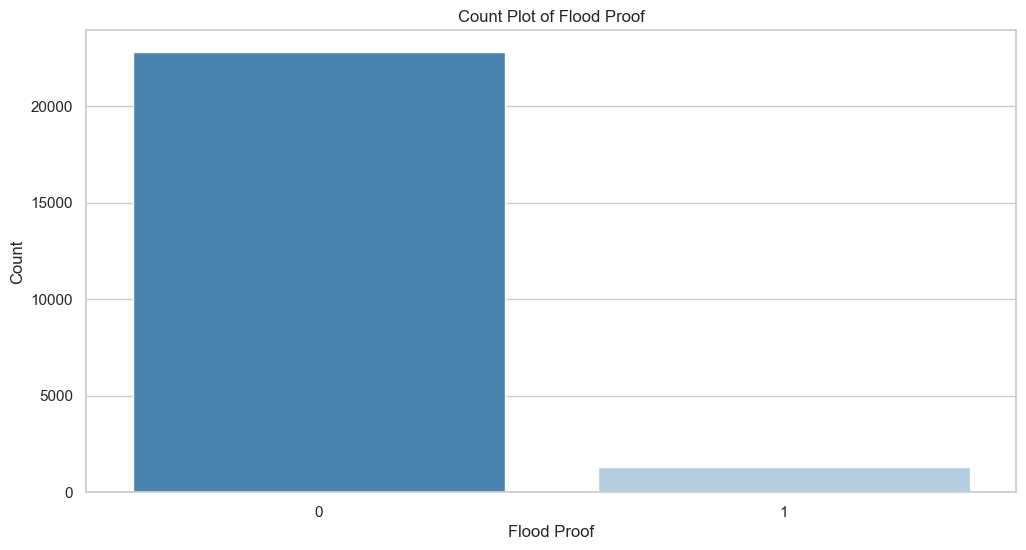

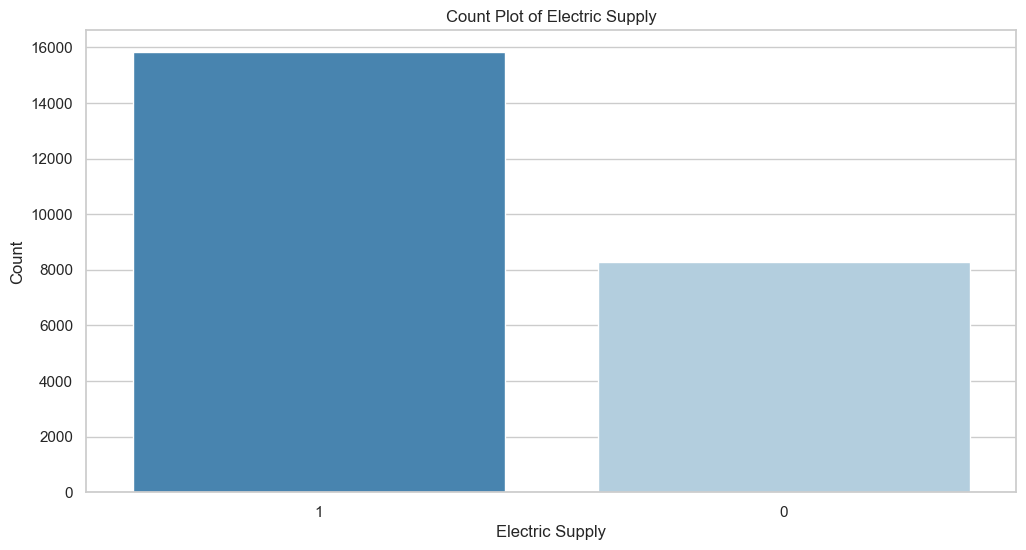

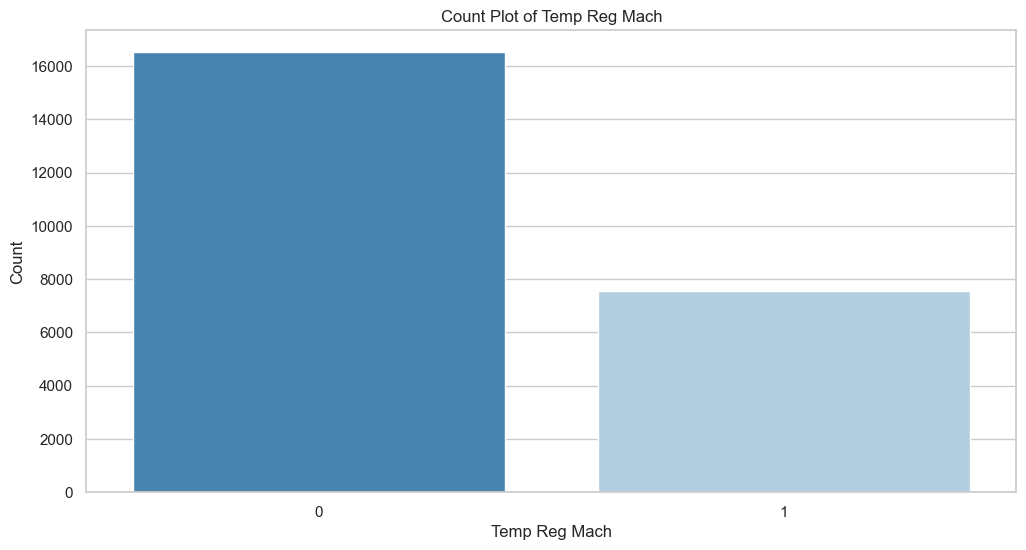

In [85]:
# Loop through each nominal column and plot the count plot
# Plotting the count plot for each nominal column
for column in nom_col:
    plot_count_with_gradient(data, column)

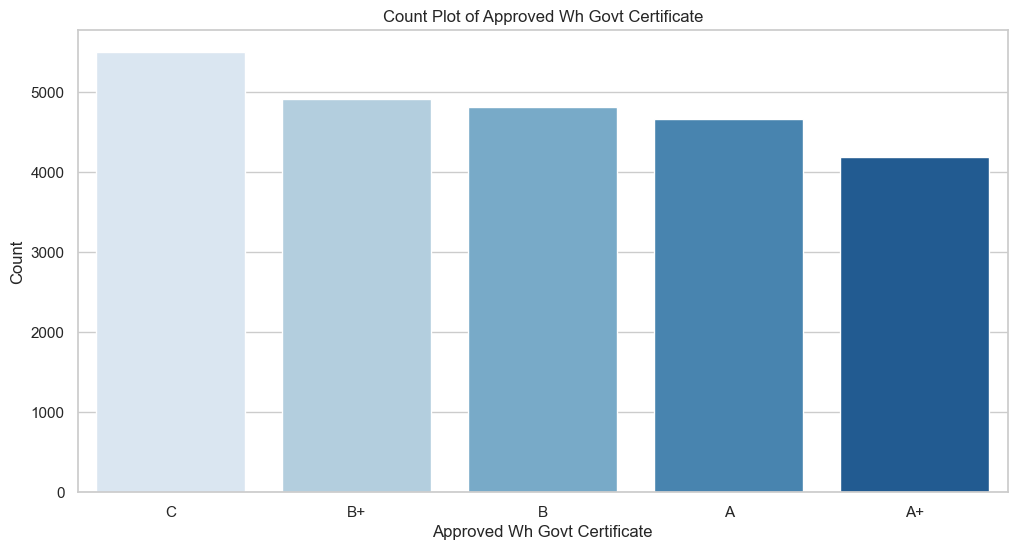

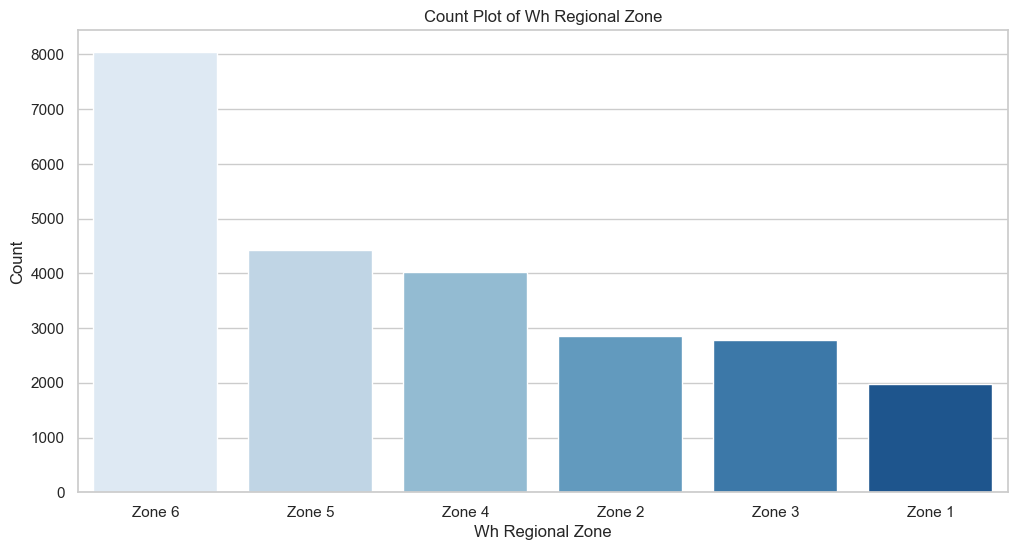

In [26]:
# # Loop through each ordinal column and plot the count plot
for column in ord_col:
    plot_count_with_gradient(data, column)

In [27]:
# Function to calculate and print skewness and kurtosis
def calculate_skewness_kurtosis(df, columns):
    """
    Calculate and print skewness and kurtosis for specified columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of columns for which to calculate skewness and kurtosis.

    Returns:
    pd.Series: Skewness and kurtosis of the specified columns.
    """
    if df is not None and not df.empty:
        missing_cols = [col for col in columns if col not in df.columns]
        if not missing_cols:
            # Calculate skewness and kurtosis
            skewness = df[columns].skew()
            kurtosis = df[columns].kurtosis()

            # Print skewness and kurtosis
            print("Skewness of the dataset:\n", skewness)
            print("\nKurtosis of the dataset:\n", kurtosis)
            
            return skewness, kurtosis
        else:
            print(f"The following required columns are missing in the DataFrame: {missing_cols}")
            return None, None
    else:
        print("DataFrame is None or empty. Cannot calculate skewness and kurtosis.")
        return None, None

# Calculate skewness and kurtosis
columns_to_check = cont_col + tar_col + dis_col
skewness, kurtosis = calculate_skewness_kurtosis(data, columns_to_check)

Skewness of the dataset:
 dist_from_hub                -0.006058
workers_num                   1.082629
wh_est_year                   0.012662
retail_shop_num               0.908015
distributor_num               0.014912
product_wg_ton                0.330629
num_refill_req_l3m           -0.077632
transport_issue_l1y           1.598869
Competitor_in_mkt             0.979781
storage_issue_reported_l3m    0.202563
wh_breakdown_l3m              0.068049
govt_check_l3m               -0.364379
dtype: float64

Kurtosis of the dataset:
 dist_from_hub                -1.202248
workers_num                   3.595012
wh_est_year                  -1.173091
retail_shop_num               1.850227
distributor_num              -1.188520
product_wg_ton               -0.448879
num_refill_req_l3m           -1.219709
transport_issue_l1y           1.790236
Competitor_in_mkt             1.793255
storage_issue_reported_l3m   -0.695229
wh_breakdown_l3m             -1.160941
govt_check_l3m               -1.056

Insights:
1. Transport issues and number of competitors show a positive skew, indicating that higher values are less frequent.
2. Flood impact and flood proof have high kurtosis values, indicating heavy tails or outliers in the distribution.
3. Electric supply and distance from the hub show negative skew, indicating that lower values are less frequent.

Inspecting outliers

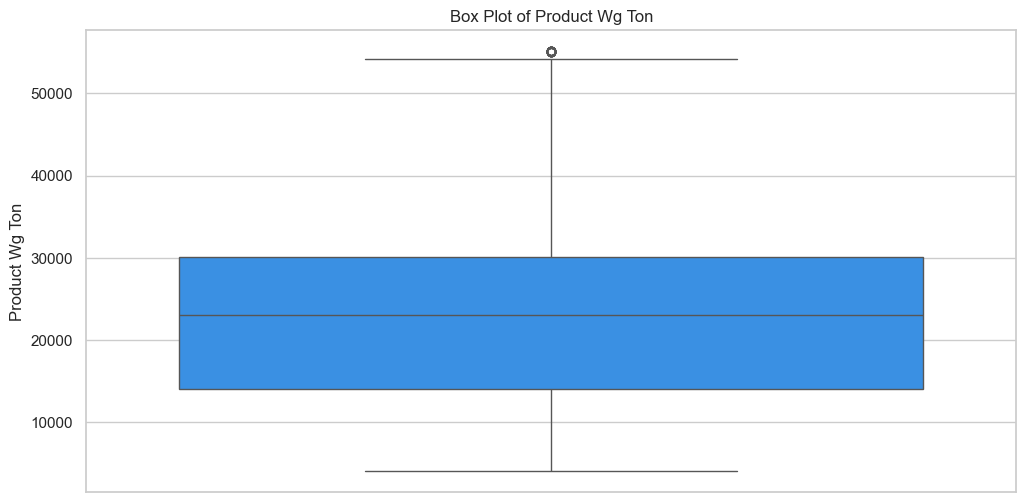

In [28]:
# Function to create a box plot for a specified column, optionally grouped by a categorical variable
def plot_box(df, column_name, group_by=None, color='dodgerblue', plot_size=(12, 6)):
    """
    Create a box plot for a specified continuous column, optionally grouped by a categorical variable.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which the box plot is to be created.
    group_by (str): Optional categorical column to group by.
    color (str): The color for the plot (default is 'dodgerblue').
    plot_size (tuple): The size of the plot (default is (12, 6)).

    Returns:
    None
    """
    if df is not None and not df.empty:
        if column_name in df.columns and (column_name in cont_col or column_name in tar_col or column_name in dis_col):
            plt.figure(figsize=plot_size)
            if group_by and group_by in df.columns and (group_by in dis_col or group_by in nom_col or group_by in ord_col):
                sns.boxplot(x=df[group_by], y=df[column_name], palette='Blues')
                plt.title(f'Box Plot of {column_name.replace("_", " ").title()} Grouped by {group_by.replace("_", " ").title()}')
                plt.xlabel(group_by.replace('_', ' ').title())
                plt.ylabel(column_name.replace('_', ' ').title())
            else:
                sns.boxplot(y=df[column_name], color=color)
                plt.title(f'Box Plot of {column_name.replace("_", " ").title()}')
                plt.ylabel(column_name.replace('_', ' ').title())
            plt.show()
        else:
            print(f"Column '{column_name}' not found in the DataFrame or is not a recognized continuous/target/discrete column.")
    else:
        print("DataFrame is None or empty. Cannot create box plot.")

# Create a box plot for 'product_wg_ton' without grouping
for column in tar_col:
    plot_box(data, column)

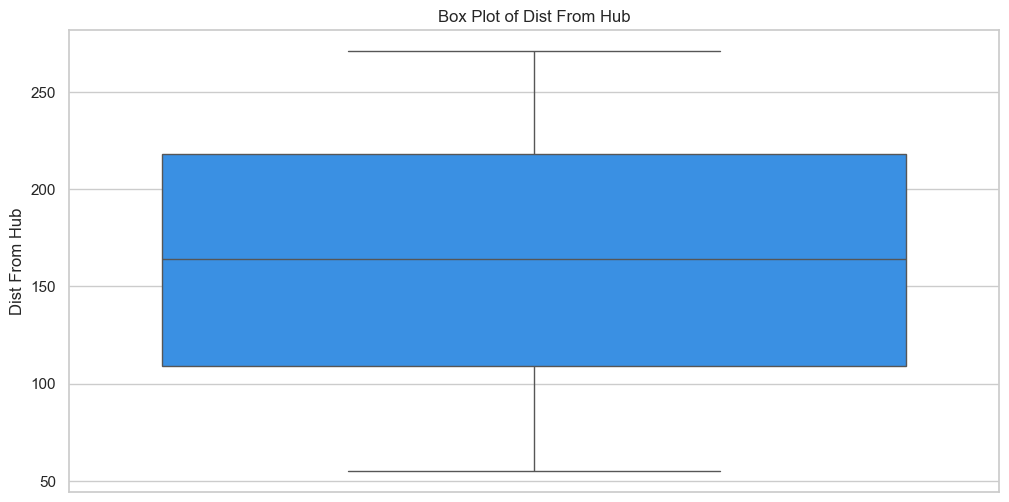

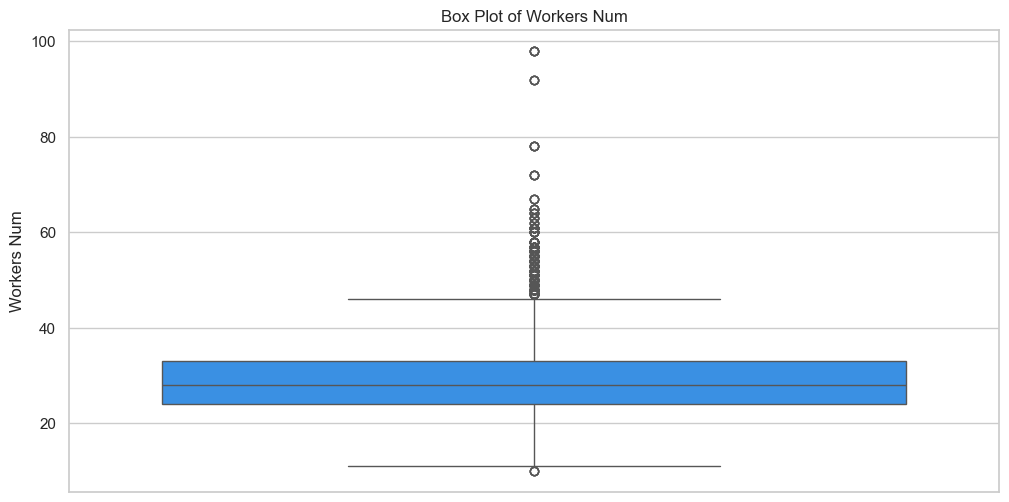

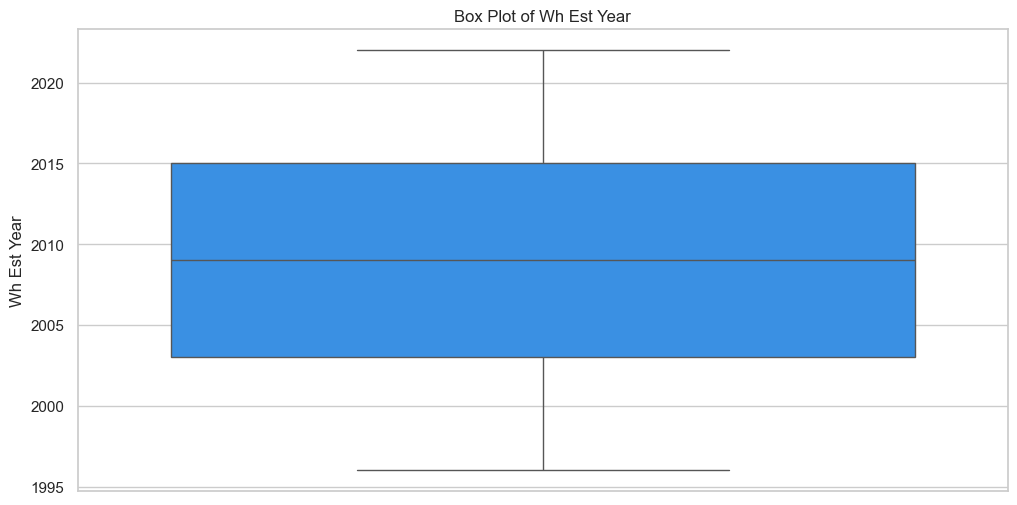

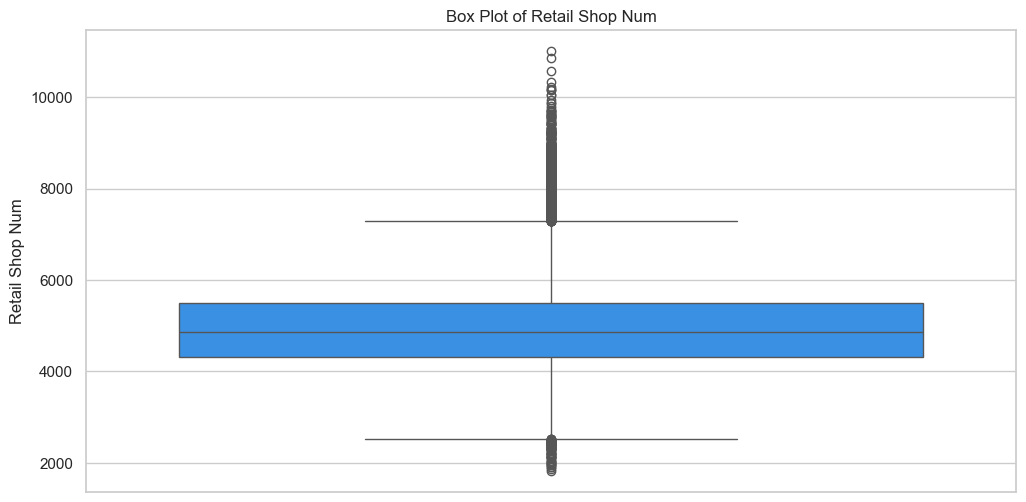

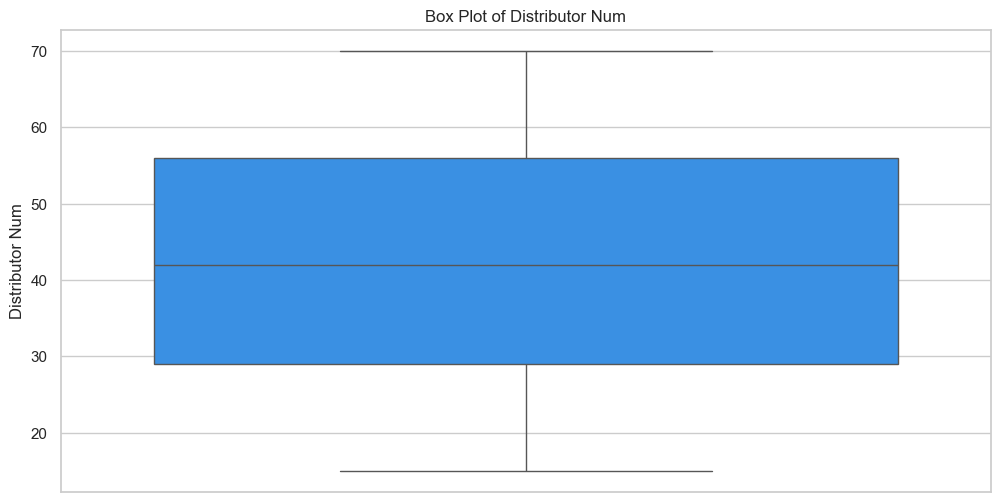

In [29]:
# Loop through continuous columns and create a box plot
# Plotting the box plot for each continuous column
for column in cont_col:
    plot_box(data, column)

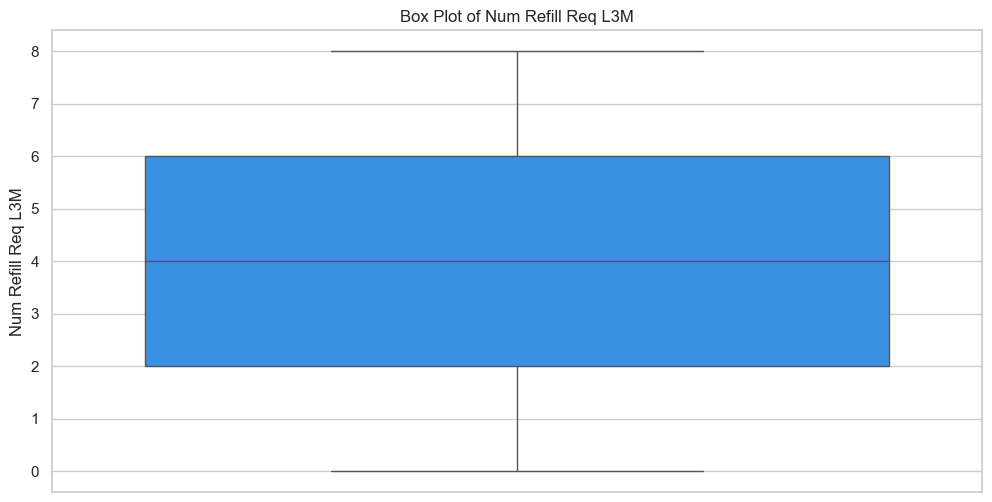

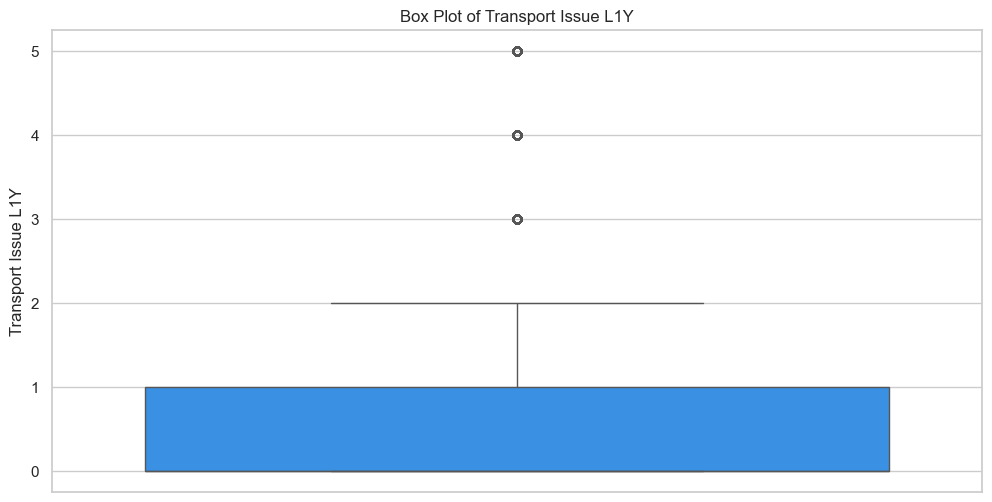

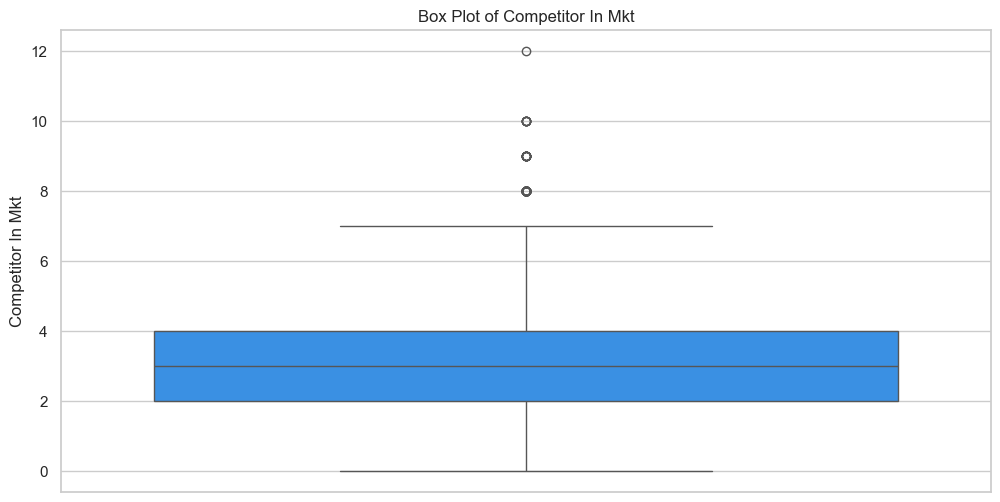

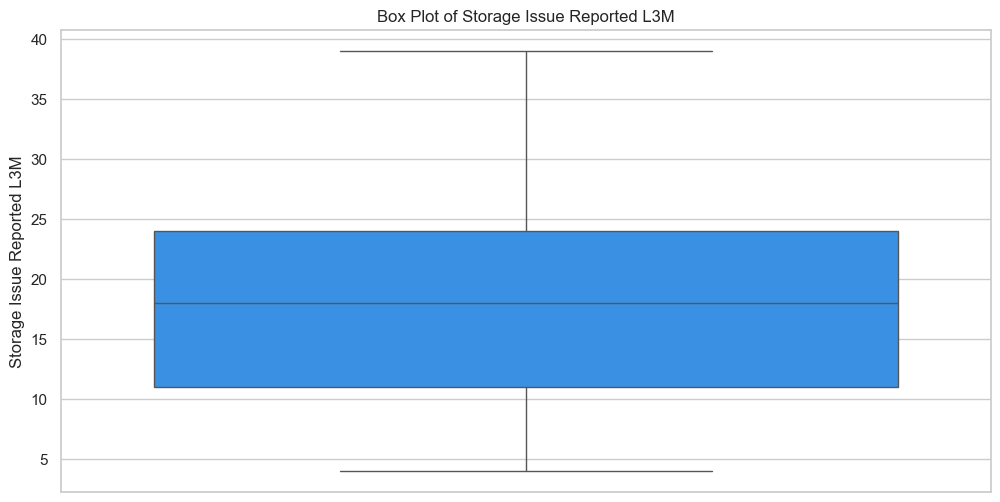

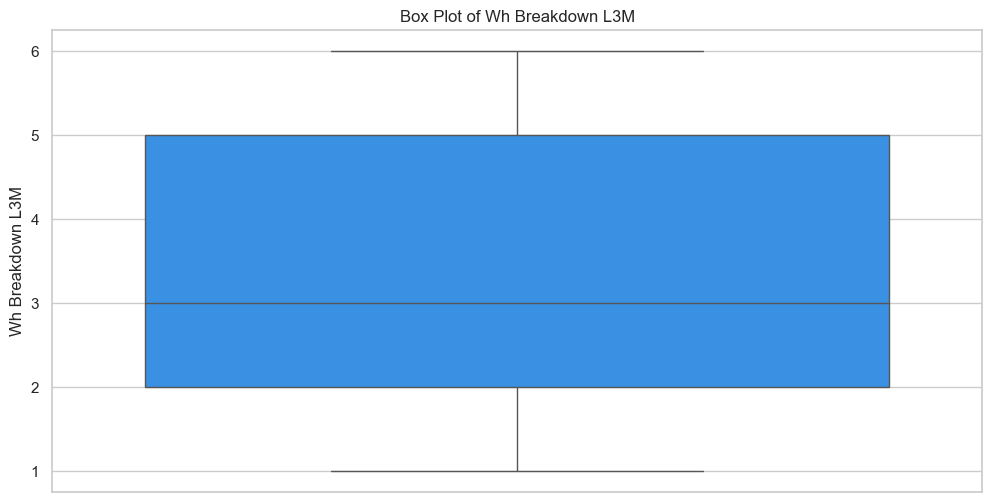

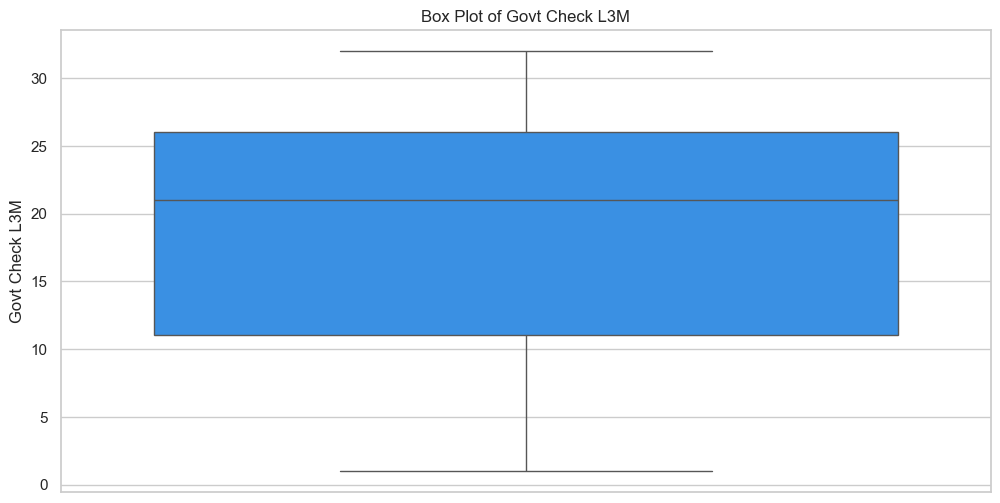

In [30]:
# Loop through discrete columns and create a box plot
# Plotting the box plot for each discrete column
for column in dis_col:
    plot_box(data, column)

In [31]:
# Detect outliers using IQR
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[cont_col + tar_col + dis_col].quantile(0.25)
Q3 = data[cont_col + tar_col + dis_col].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Determine outliers
outliers_iqr = (data[cont_col + tar_col + dis_col] < (Q1 - 1.5 * IQR)) | (data[cont_col + tar_col + dis_col] > (Q3 + 1.5 * IQR))

# Calculate the sum of outliers in each column using IQR method
sum_outliers_iqr = outliers_iqr.sum()
print("Sum of outliers in each column using IQR method:\n", sum_outliers_iqr)

# Filter rows with any outliers
rows_with_outliers_iqr = data[outliers_iqr.any(axis=1)]

print("Rows with outliers using IQR method:\n", rows_with_outliers_iqr)

Sum of outliers in each column using IQR method:
 dist_from_hub                    0
workers_num                    580
wh_est_year                      0
retail_shop_num                904
distributor_num                  0
product_wg_ton                  17
num_refill_req_l3m               0
transport_issue_l1y           2866
Competitor_in_mkt               94
storage_issue_reported_l3m       0
wh_breakdown_l3m                 0
govt_check_l3m                   0
dtype: int64
Rows with outliers using IQR method:
       Location_type WH_capacity_size   zone WH_regional_zone  \
3             Rural              Mid  North           Zone 3   
9             Rural            Small  South           Zone 6   
26            Rural            Small   West           Zone 6   
27            Rural            Small  South           Zone 6   
37            Rural              Mid   East           Zone 3   
...             ...              ...    ...              ...   
24978         Rural            

In [32]:
# Calculate Z-scores
z_scores = (data[cont_col + tar_col + dis_col] - data[cont_col + tar_col + dis_col].mean()) / data[cont_col + tar_col + dis_col].std()

# Determine outliers using Z-value method (threshold = 3)
outliers_z = (z_scores > 3) | (z_scores < -3)

# Calculate the sum of outliers in each column using Z-value method
sum_outliers_z = outliers_z.sum()
print("Sum of outliers in each column using Z-value method:\n", sum_outliers_z)

# Filter rows with any outliers using Z-value method
rows_with_outliers_z = data[outliers_z.any(axis=1)]

print("Rows with outliers using Z-value method:\n", rows_with_outliers_z)

Sum of outliers in each column using Z-value method:
 dist_from_hub                   0
workers_num                   272
wh_est_year                     0
retail_shop_num               332
distributor_num                 0
product_wg_ton                  0
num_refill_req_l3m              0
transport_issue_l1y           336
Competitor_in_mkt             275
storage_issue_reported_l3m      0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64
Rows with outliers using Z-value method:
       Location_type WH_capacity_size   zone WH_regional_zone  \
37            Rural              Mid   East           Zone 3   
71            Rural              Mid  North           Zone 2   
76            Rural            Large  North           Zone 6   
127           Rural            Small   East           Zone 1   
139           Rural            Small   West           Zone 6   
...             ...              ...    ...              ...   
24899         Rural              Mi

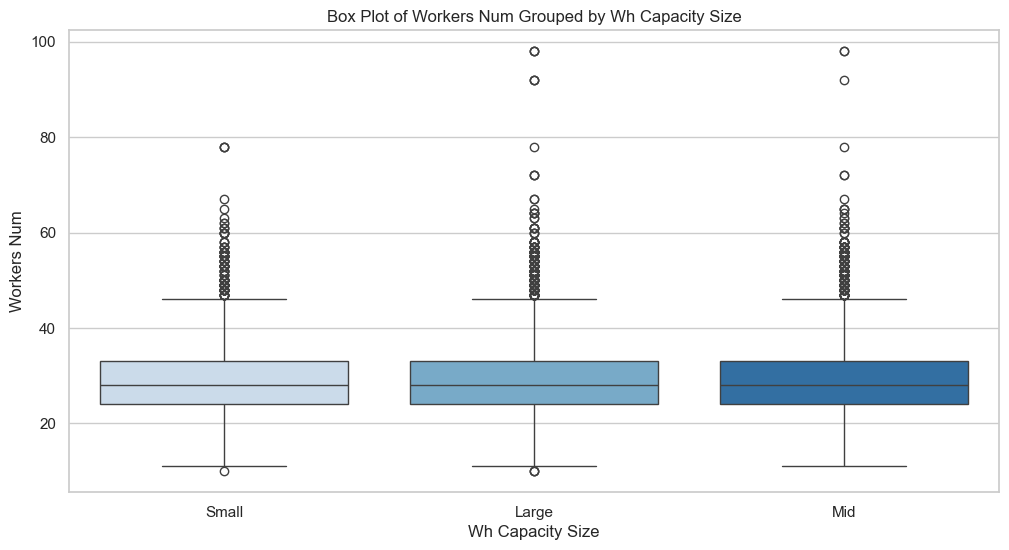

                   count       mean       std   min   25%   50%   75%   max
WH_capacity_size                                                           
Large             9820.0  28.986253  7.784834  10.0  24.0  28.0  33.0  98.0
Mid               9657.0  28.754582  7.634898  11.0  24.0  28.0  33.0  98.0
Small             4615.0  29.042687  7.709881  10.0  24.0  28.0  33.0  78.0


In [33]:
# Create a box plot for 'workers_num' with capacity size category
plot_box(data, 'workers_num', group_by='WH_capacity_size')

# Calculate descriptive statistics for workers_num within each capacity size category
workers_stats_by_capacity = data.groupby('WH_capacity_size')['workers_num'].describe()

# Display the calculated statistics
print(workers_stats_by_capacity)

The box plot shows the distribution of worker numbers within each warehouse capacity size. The distributions are relatively similar across all sizes, but large and mid-sized warehouses show a broader range, especially at the higher end.

Interpretation:
1. Consistency Across Categories: The means and medians of worker numbers are quite consistent across all warehouse sizes, suggesting a similar staffing model irrespective of warehouse size.
2. Outliers in Context: The presence of outliers (e.g., up to 98 workers) in large and mid-sized warehouses aligns with the operational requirements of larger facilities, which may need more staff for complex operations or extended hours.
3. Validation of Outliers: The outliers are plausible and consistent with the domain knowledge, indicating that high worker numbers in large and mid-sized warehouses are reasonable.

Recommendation: Retain the Outliers: Given the consistency and plausibility of the outliers, retain them in the dataset.

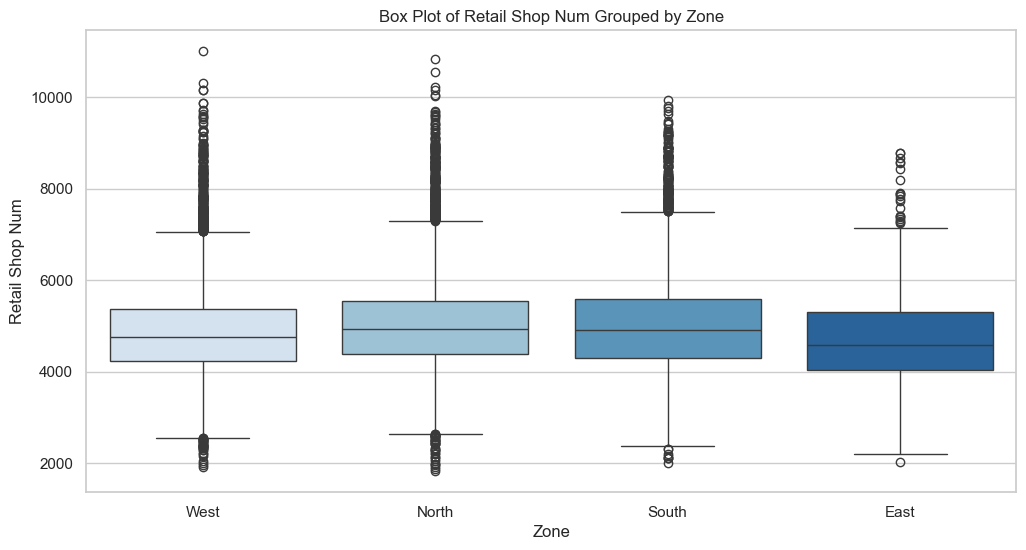

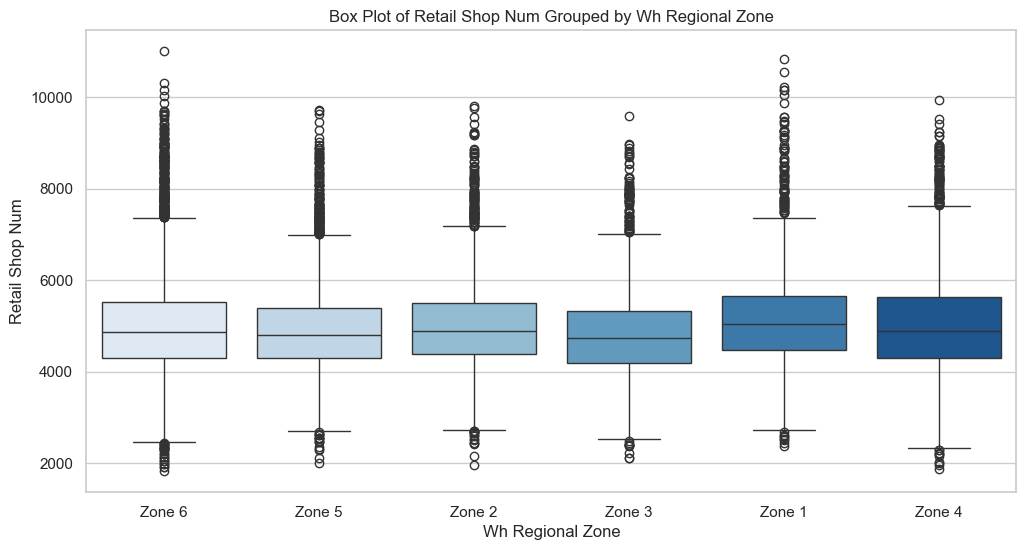

Retail Shop Numbers by Zone:
        count         mean          std     min     25%     50%     75%  \
zone                                                                      
East    421.0  4802.451306  1140.570267  2018.0  4045.0  4588.0  5299.0   
North  9889.0  5044.117100  1043.907620  1821.0  4385.0  4924.0  5552.0   
South  6117.0  5020.835377  1083.533068  1999.0  4300.0  4900.0  5581.0   
West   7665.0  4888.969472  1026.753440  1915.0  4241.0  4757.0  5370.0   

           max  
zone            
East    8787.0  
North  10846.0  
South   9933.0  
West   11008.0  

Retail Shop Numbers by WH Regional Zone:
                   count         mean          std     min      25%     50%  \
WH_regional_zone                                                              
Zone 1            1970.0  5174.941624  1110.308688  2376.0  4474.25  5035.5   
Zone 2            2849.0  5018.810811  1023.920152  1959.0  4380.00  4898.0   
Zone 3            2782.0  4827.816319   964.012882  2113.0  

In [34]:
# Plot box plots using the custom function
plot_box(data, 'retail_shop_num', group_by='zone')
plot_box(data, 'retail_shop_num', group_by='WH_regional_zone')

# Calculate descriptive statistics for retail_shop_num within each zone
retail_shop_stats_by_zone = data.groupby('zone')['retail_shop_num'].describe()

# Calculate descriptive statistics for retail_shop_num within each WH regional zone
retail_shop_stats_by_regional_zone = data.groupby('WH_regional_zone')['retail_shop_num'].describe()

# Display the calculated statistics
print("Retail Shop Numbers by Zone:")
print(retail_shop_stats_by_zone)

print("\nRetail Shop Numbers by WH Regional Zone:")
print(retail_shop_stats_by_regional_zone)


The box plots show the distribution of retail shop numbers within each zone and WH regional zone. There are several high values (outliers) especially in the North, West, Zone 1, and Zone 6, which correspond to the higher maximum values observed.

Interpretation:
1. North and West Zone: These regions have the highest mean and maximum number of retail shops, indicating densely populated or high-demand areas.
2. Zone 1 and Zone 6: These zones show similarly high means and maximum values, justifying the presence of outliers in these areas.
3. Consistency Across Other Zones: The means and ranges in other zones and WH regional zones also indicate significant retail presence but with fewer extreme outliers.
4. High-Demand Areas: The high values in the North, West, Zone 1, and Zone 6 are consistent with the presence of large urban centers or high-demand areas, aligning with densely populated regions.

Recommendation: Retain the Outliers: The high values are consistent with high-demand areas and should be retained for further analysis.

In [35]:
# Creating copy for visualisation
datavis = data.copy()

### Exploratory Data Analysis

I. Warehouse Capacity:

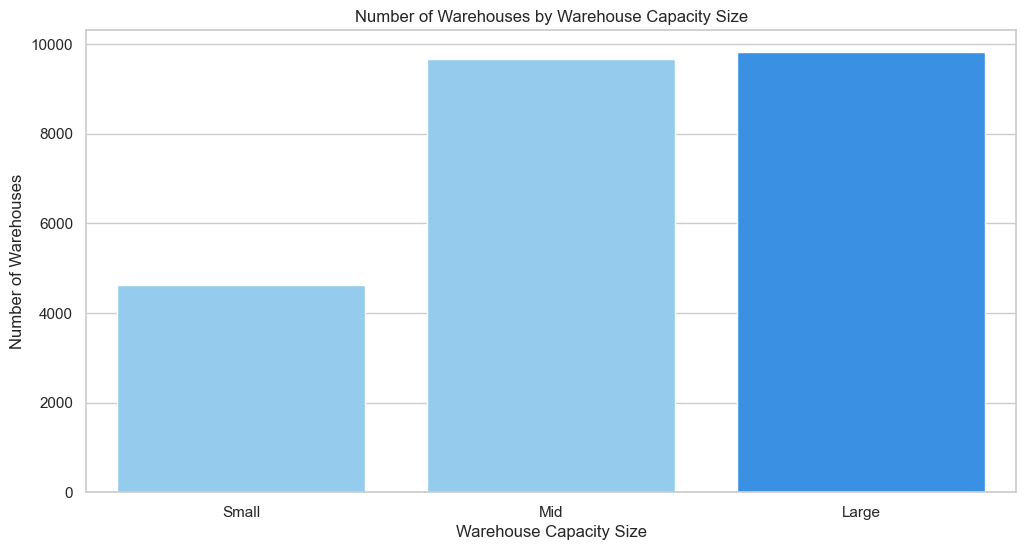

In [36]:
# Convert 'WH_capacity_size' to categorical labels for plotting purposes
datavis['WH_capacity_size'] = datavis['WH_capacity_size'].astype(pd.CategoricalDtype(categories=['Small', 'Mid', 'Large'], ordered=True))

# Calculate the counts of each warehouse capacity size
wh_cap_counts = datavis['WH_capacity_size'].value_counts().sort_index()
# Find the maximum count of warehouses
wh_cap_max_cat = wh_cap_counts.max()
# Create custom color palette based on the maximum count
wh_cap_palette = ['dodgerblue' if count == wh_cap_max_cat else 'lightskyblue' for count in wh_cap_counts]

# Plot the number of warehouses by capacity size
plt.figure(figsize=(12, 6))
sns.countplot(data=datavis, x='WH_capacity_size', hue='WH_capacity_size', palette=wh_cap_palette, legend=False)
plt.title('Number of Warehouses by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Number of Warehouses')
plt.show()

Insights:
1. The 'Large' capacity size has the highest count among the three categories.

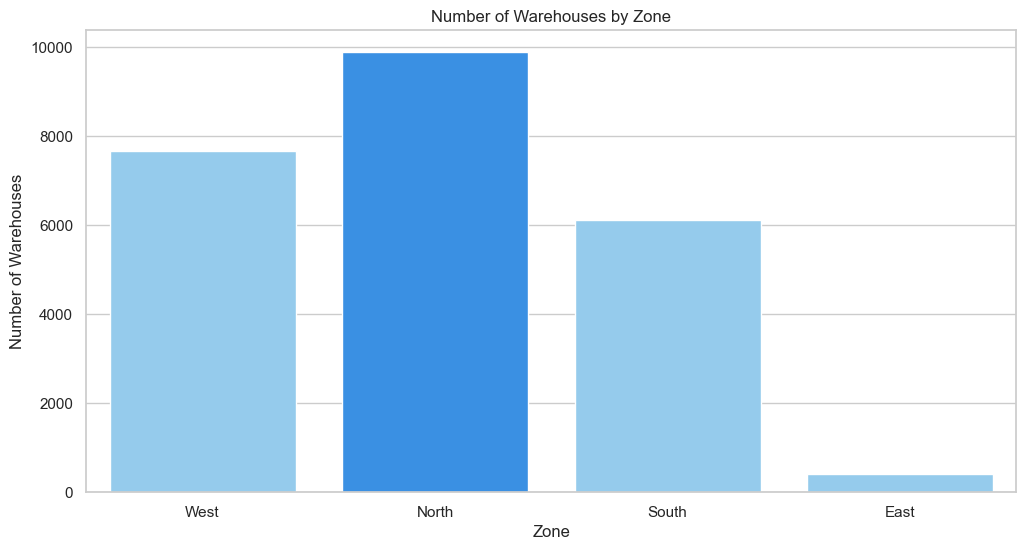

In [37]:
# Calculate the counts of each warehouse capacity size
wh_cap_counts2 = datavis['zone'].value_counts().sort_index()
# Find the maximum count of warehouses
wh_cap_max_cat2 = wh_cap_counts2.max()
# Create custom color palette based on the maximum count
wh_cap_palette2 = ['dodgerblue' if count == wh_cap_max_cat2 else 'lightskyblue' for count in wh_cap_counts2]

# Plot the number of warehouses by capacity size
plt.figure(figsize=(12, 6))
sns.countplot(data=datavis, x='zone', hue='zone', palette=wh_cap_palette2, legend=False)
plt.title('Number of Warehouses by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Warehouses')
plt.show()

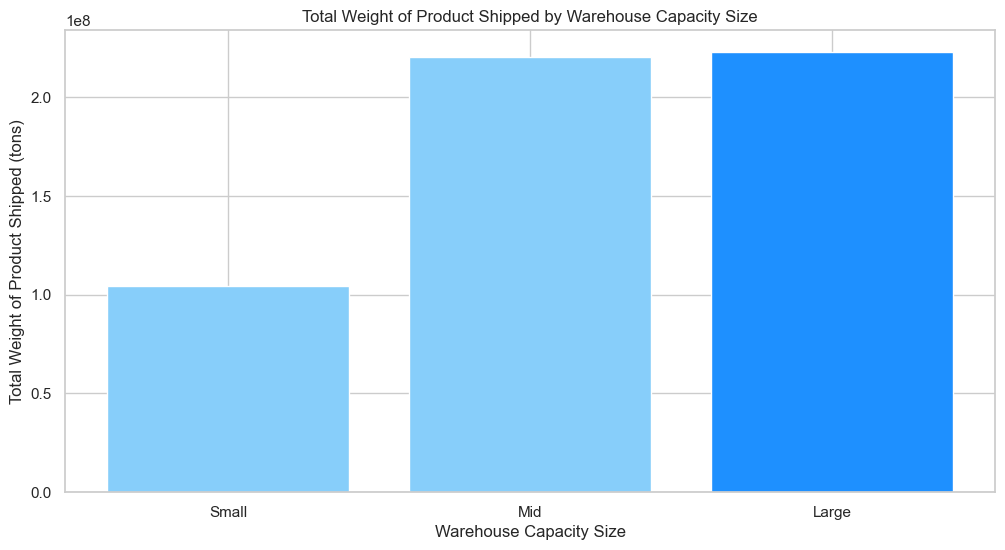

In [38]:
# Calculate the total weight of product shipped by warehouse capacity size
wh_cap_prod_tot = datavis.groupby('WH_capacity_size', observed=False)['product_wg_ton'].sum().reset_index()

# Find the maximum total weight of product shipped
wh_cap_prod_max_cat = wh_cap_prod_tot['product_wg_ton'].max()

# Create custom color palette based on the maximum total weight of product shipped
wh_cap_prod_palette = ['dodgerblue' if value == wh_cap_prod_max_cat else 'lightskyblue' for value in wh_cap_prod_tot['product_wg_ton']]

# Plot the total weight of product shipped by warehouse capacity size
plt.figure(figsize=(12, 6))
plt.bar(wh_cap_prod_tot['WH_capacity_size'], wh_cap_prod_tot['product_wg_ton'], color=wh_cap_prod_palette)
plt.title('Total Weight of Product Shipped by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Total Weight of Product Shipped (tons)')
plt.show()

Insights:
1. The 'Large' capacity warehouses ship the highest total weight of products compared to 'Mid' and 'Small' capacity warehouses.

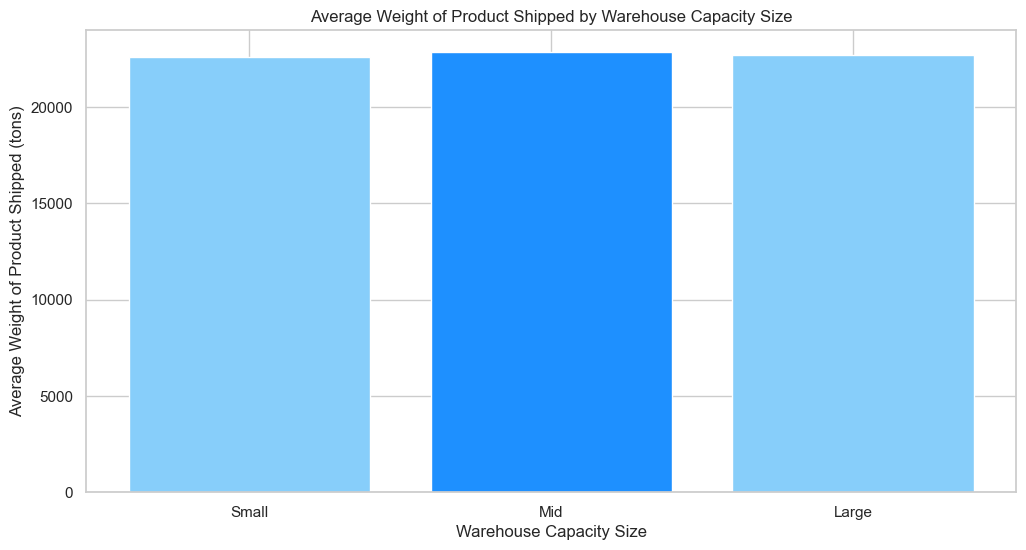

In [39]:
# Calculate the average weight of product shipped by warehouse capacity size
wh_cap_prod_avg = datavis.groupby('WH_capacity_size', observed=False)['product_wg_ton'].mean().reset_index()

# Find the maximum average weight
wh_cap_prod_max2 = wh_cap_prod_avg['product_wg_ton'].max()

# Create custom color palette based on the maximum average weight
wh_cap_prod_palette2 = ['dodgerblue' if value == wh_cap_prod_max2 else 'lightskyblue' for value in wh_cap_prod_avg['product_wg_ton']]

# Plot the average weight of product shipped by warehouse capacity size
plt.figure(figsize=(12, 6))
plt.bar(wh_cap_prod_avg['WH_capacity_size'], wh_cap_prod_avg['product_wg_ton'], color=wh_cap_prod_palette2)
plt.title('Average Weight of Product Shipped by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Average Weight of Product Shipped (tons)')
plt.show()

Insights:
1. The 'Mid' capacity warehouses have the highest average weight of products shipped compared to 'Large' and 'Small' capacity warehouses.

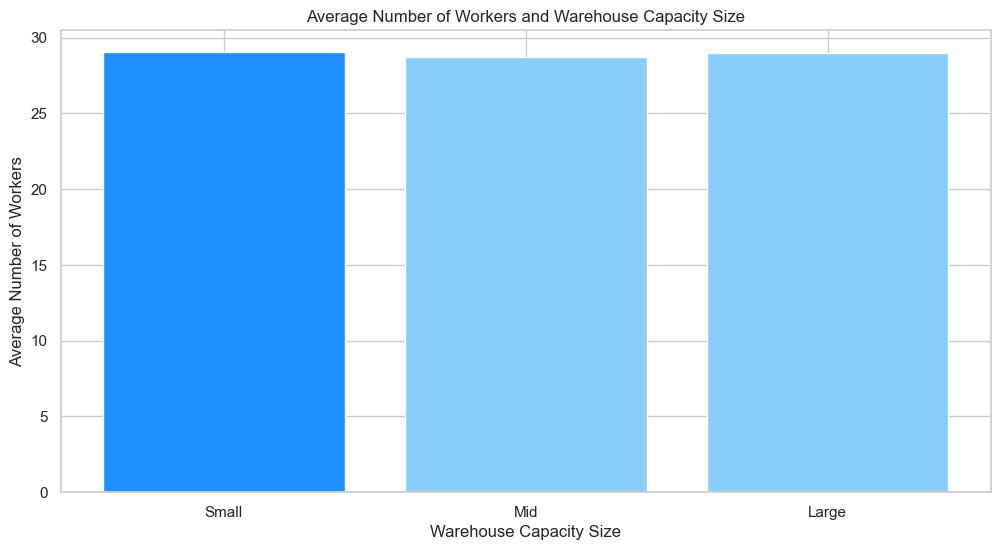

In [40]:
# Calculate the mean number of workers for each capacity size
wh_cap_worker_avg = datavis.groupby('WH_capacity_size', observed=False)['workers_num'].mean().reset_index()

# Find the maximum average number of workers
wh_cap_worker_max = wh_cap_worker_avg['workers_num'].max()

# Create custom color palette based on the maximum average number of workers
wh_cap_worker_palette = ['dodgerblue' if value == wh_cap_worker_max else 'lightskyblue' for value in wh_cap_worker_avg['workers_num']]

# Plot the mean number of workers by capacity size with customized colors
plt.figure(figsize=(12, 6))
plt.bar(wh_cap_worker_avg['WH_capacity_size'], wh_cap_worker_avg['workers_num'], color=wh_cap_worker_palette)
plt.title('Average Number of Workers and Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Average Number of Workers')
plt.show()

Insights:
1. The 'Small' capacity warehouses have the highest average number of workers compared to 'Mid' and 'Large' capacity warehouses.

II. Location and Accessibility:

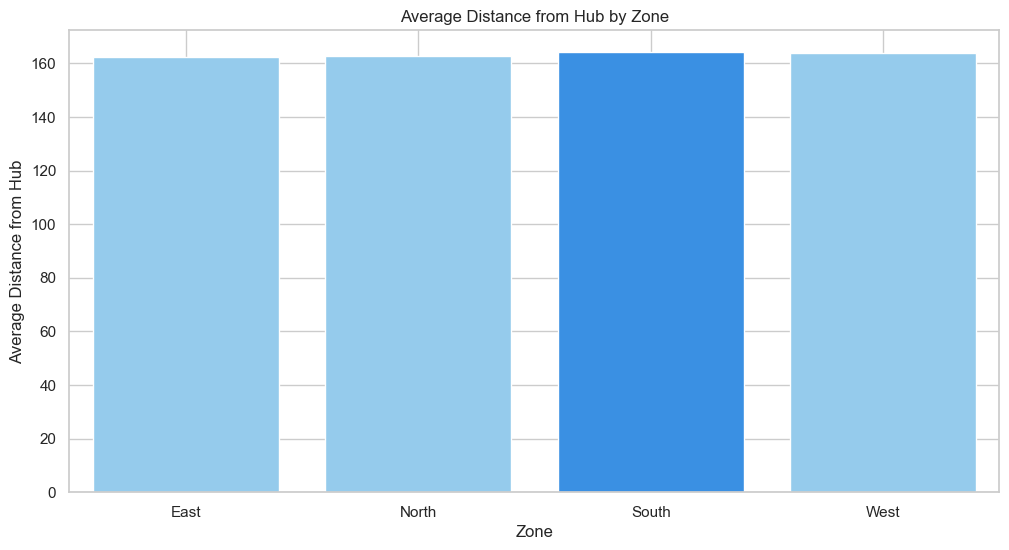

In [41]:
# Grouping by 'zone' and calculating the mean 'dist_from_hub'
wh_loc_dist_avg = datavis.groupby('zone')['dist_from_hub'].mean().reset_index()

# Find the maximum average distance from hub
wh_loc_dist_max_cat = wh_loc_dist_avg['dist_from_hub'].max()

# Create custom color palette based on the maximum average distance from hub
wh_loc_dist_palette = ['dodgerblue' if value == wh_loc_dist_max_cat else 'lightskyblue' for value in wh_loc_dist_avg['dist_from_hub']]

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_loc_dist_avg, x='zone', y='dist_from_hub', hue='zone', palette=wh_loc_dist_palette, legend=False)
plt.title('Average Distance from Hub by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Distance from Hub')
plt.grid(True)
plt.show()

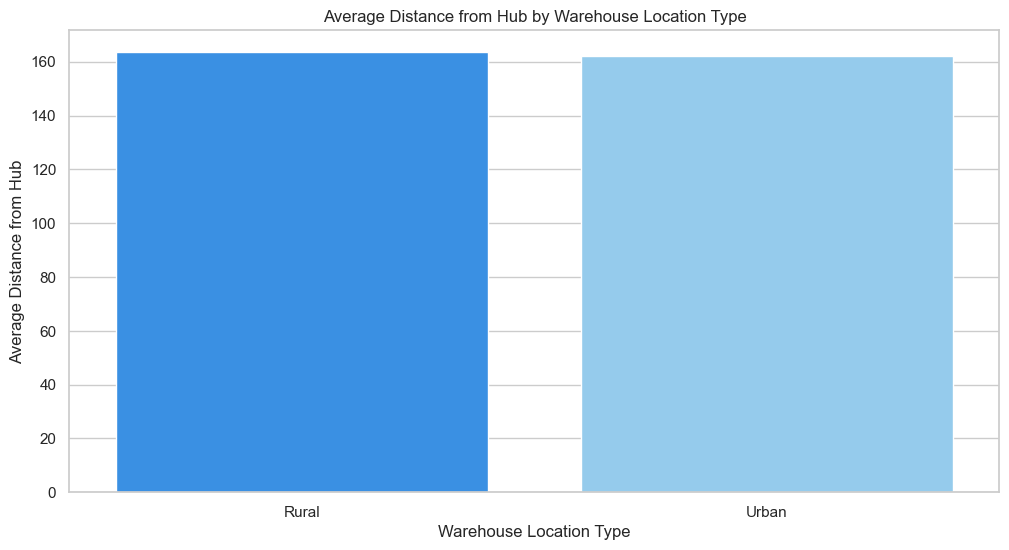

In [42]:
# Grouping by 'Location_type' and calculating the mean 'dist_from_hub'
wh_loc_loc_avg = datavis.groupby('Location_type')['dist_from_hub'].mean().reset_index()

# Find the maximum average distance from hub
wh_loc_loc_max_cat = wh_loc_loc_avg['dist_from_hub'].max()

# Create custom color palette based on the maximum average distance from hub
wh_loc_loc_palette = ['dodgerblue' if value == wh_loc_loc_max_cat else 'lightskyblue' for value in wh_loc_loc_avg['dist_from_hub']]

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_loc_loc_avg, x='Location_type', y='dist_from_hub', hue='Location_type', palette=wh_loc_loc_palette, legend=False)
plt.title('Average Distance from Hub by Warehouse Location Type')
plt.xlabel('Warehouse Location Type')
plt.ylabel('Average Distance from Hub')
plt.show()

Insights:
1. Warehouses located in rural areas have a higher average distance from the hub compared to those in urban areas.

III. Warehouse Operations:

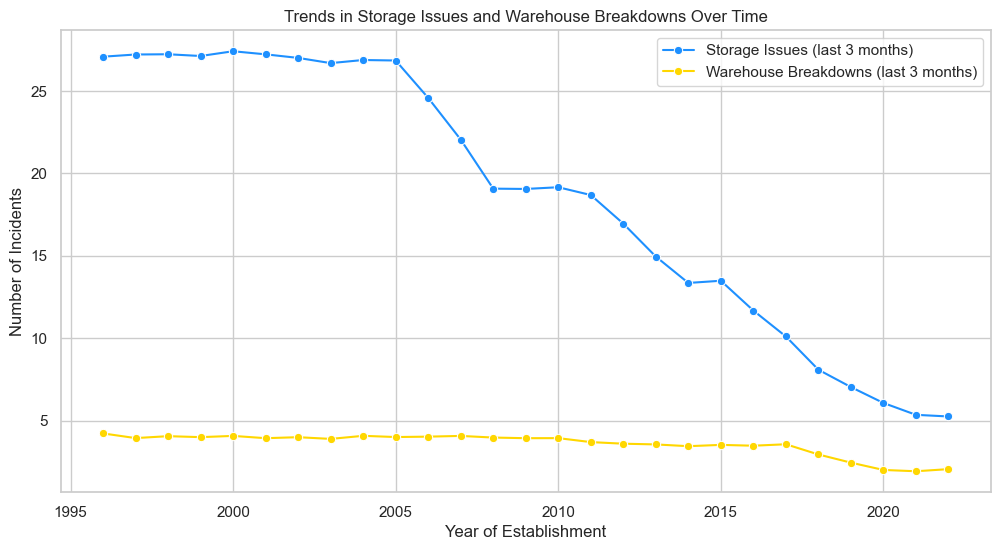

In [43]:
# Filter out rows with known establishment years
wh_op_est_filter = datavis.dropna(subset=['wh_est_year'])

# Group by establishment year and calculate the mean of storage issues reported and warehouse breakdowns
wh_op_str_avg = wh_op_est_filter.groupby('wh_est_year')['storage_issue_reported_l3m'].mean().reset_index()
wh_op_break_avg = datavis.groupby('wh_est_year')['wh_breakdown_l3m'].mean().reset_index()

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=wh_op_str_avg, x='wh_est_year', y='storage_issue_reported_l3m', marker='o', color='dodgerblue', label='Storage Issues (last 3 months)')
sns.lineplot(data=wh_op_break_avg, x='wh_est_year', y='wh_breakdown_l3m', marker='o', color='gold', label='Warehouse Breakdowns (last 3 months)')
plt.title('Trends in Storage Issues and Warehouse Breakdowns Over Time')
plt.xlabel('Year of Establishment')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

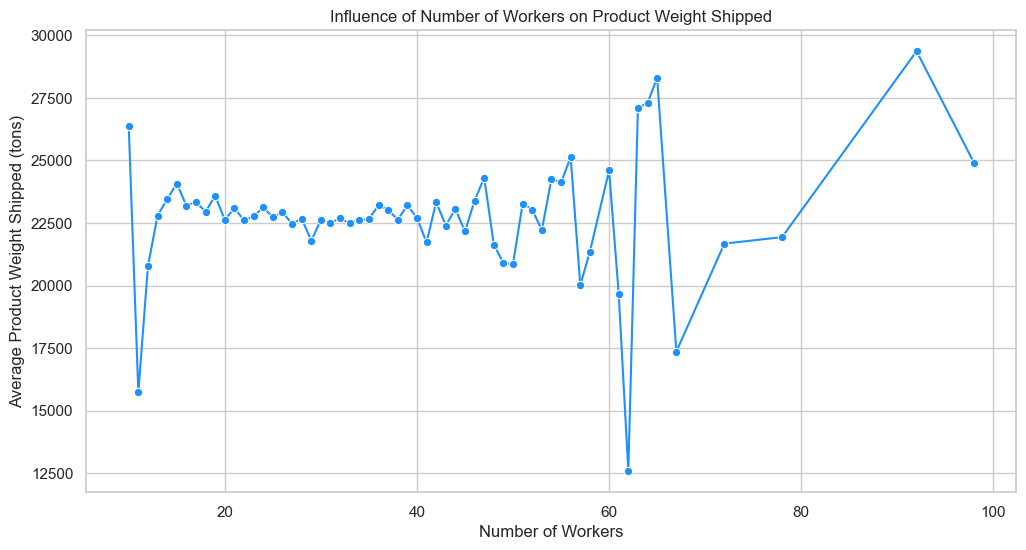

In [44]:
# Calculate the average product weight shipped grouped by the number of workers
wh_op_worker_wt_avg = data.groupby('workers_num')['product_wg_ton'].mean().reset_index()

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=wh_op_worker_wt_avg, x='workers_num', y='product_wg_ton', marker='o', color='dodgerblue')
plt.title('Influence of Number of Workers on Product Weight Shipped')
plt.xlabel('Number of Workers')
plt.ylabel('Average Product Weight Shipped (tons)')
plt.show()

Insights:
1. Initially, as the number of workers increases, there seems to be an increase in the average weight shipped. After reaching a peak, the trend shows variability, indicating that other factors might also influence the product weight shipped.


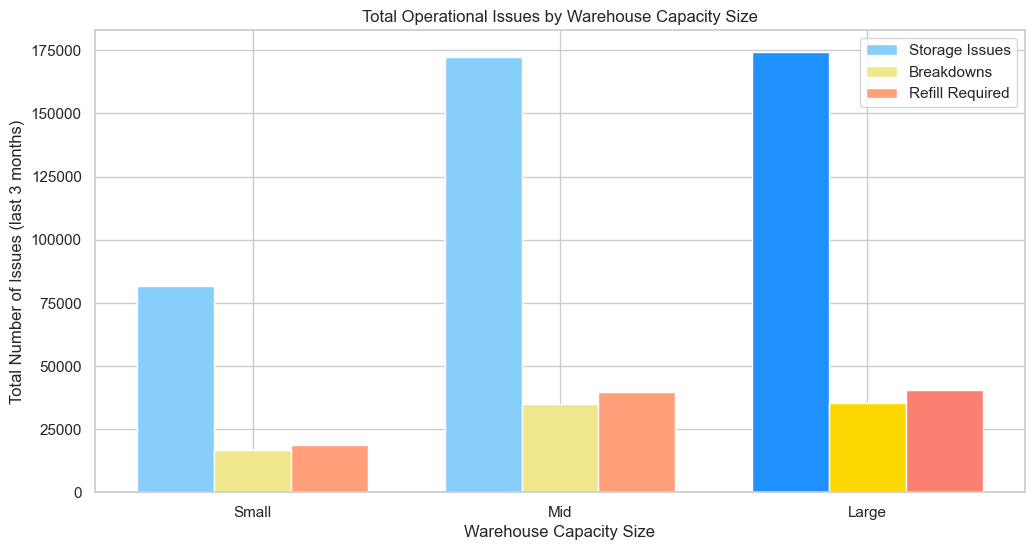

In [45]:
# Calculate total values for each issue by warehouse capacity size
wh_op_issues_tot = datavis.groupby('WH_capacity_size', observed=False)[['storage_issue_reported_l3m', 'wh_breakdown_l3m', 'num_refill_req_l3m']].sum().reset_index()

# Find the maximum value for each issue
wh_op_strissue_max_cat = wh_op_issues_tot['storage_issue_reported_l3m'].max()
wh_op_breakissue_max_cat = wh_op_issues_tot['wh_breakdown_l3m'].max()
wh_op_refillissue_max_cat = wh_op_issues_tot['num_refill_req_l3m'].max()

# Create color schemes for each issue
wh_op_strissue_palette = ['dodgerblue' if value == wh_op_strissue_max_cat else 'lightskyblue' for value in wh_op_issues_tot['storage_issue_reported_l3m']]
wh_op_breakissue_palette = ['gold' if value == wh_op_breakissue_max_cat else 'khaki' for value in wh_op_issues_tot['wh_breakdown_l3m']]
wh_op_refillissue_palette = ['salmon' if value == wh_op_refillissue_max_cat else 'lightsalmon' for value in wh_op_issues_tot['num_refill_req_l3m']]

# Plot each bar group separately to apply different colors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
bar_positions = np.arange(len(wh_op_issues_tot))

# Plot each bar group separately to apply different colors
ax.bar(bar_positions, wh_op_issues_tot['storage_issue_reported_l3m'], width=bar_width, color=wh_op_strissue_palette, label='Storage Issues')
ax.bar(bar_positions + bar_width, wh_op_issues_tot['wh_breakdown_l3m'], width=bar_width, color=wh_op_breakissue_palette, label='Breakdowns')
ax.bar(bar_positions + 2 * bar_width, wh_op_issues_tot['num_refill_req_l3m'], width=bar_width, color=wh_op_refillissue_palette, label='Refill Required')

# Set labels and title
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(wh_op_issues_tot['WH_capacity_size'])
ax.set_title('Total Operational Issues by Warehouse Capacity Size')
ax.set_xlabel('Warehouse Capacity Size')
ax.set_ylabel('Total Number of Issues (last 3 months)')
ax.legend()
plt.show()

Insights:
1. Storage Issues: The 'Large' capacity warehouses have the highest total number of storage issues reported in the last three months.
2. Breakdowns: Similarly, the 'Large' capacity warehouses also have the highest total number of warehouse breakdowns.
3. Refill Requirements: The 'Large' capacity warehouses again show the highest total number of refills required, indicating more frequent refill needs.

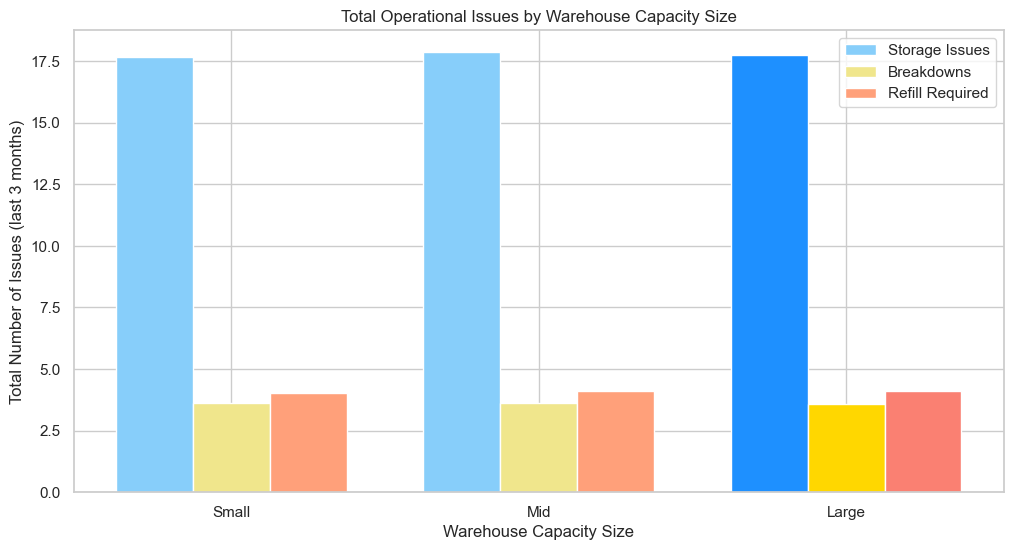

In [46]:
# Calculate total values for each issue by warehouse capacity size
wh_op_issues_avg = datavis.groupby('WH_capacity_size', observed=False)[['storage_issue_reported_l3m', 'wh_breakdown_l3m', 'num_refill_req_l3m']].mean().reset_index()

# Find the maximum value for each issue
wh_op_strissue_max_cat2 = wh_op_issues_avg['storage_issue_reported_l3m'].max()
wh_op_breakissue_max_cat2 = wh_op_issues_avg['wh_breakdown_l3m'].max()
wh_op_refillissue_max_cat2 = wh_op_issues_avg['num_refill_req_l3m'].max()

# Plot each bar group separately to apply different colors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
bar_positions = np.arange(len(wh_op_issues_avg))

# Plot each bar group separately to apply different colors
ax.bar(bar_positions, wh_op_issues_avg['storage_issue_reported_l3m'], width=bar_width, color=wh_op_strissue_palette, label='Storage Issues')
ax.bar(bar_positions + bar_width, wh_op_issues_avg['wh_breakdown_l3m'], width=bar_width, color=wh_op_breakissue_palette, label='Breakdowns')
ax.bar(bar_positions + 2 * bar_width, wh_op_issues_avg['num_refill_req_l3m'], width=bar_width, color=wh_op_refillissue_palette, label='Refill Required')

# Set labels and title
ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(wh_op_issues_avg['WH_capacity_size'])
ax.set_title('Total Operational Issues by Warehouse Capacity Size')
ax.set_xlabel('Warehouse Capacity Size')
ax.set_ylabel('Total Number of Issues (last 3 months)')
ax.legend()
plt.show()

Iinsights:
1. Storage Issues: The 'Large' capacity warehouses have the highest average number of storage issues reported in the last three months.
2. Breakdowns: Similarly, the 'Large' capacity warehouses also have the highest average number of warehouse breakdowns.
3. Refill Requirements: The 'Large' capacity warehouses again show the highest average number of refills required, indicating more frequent refill needs.

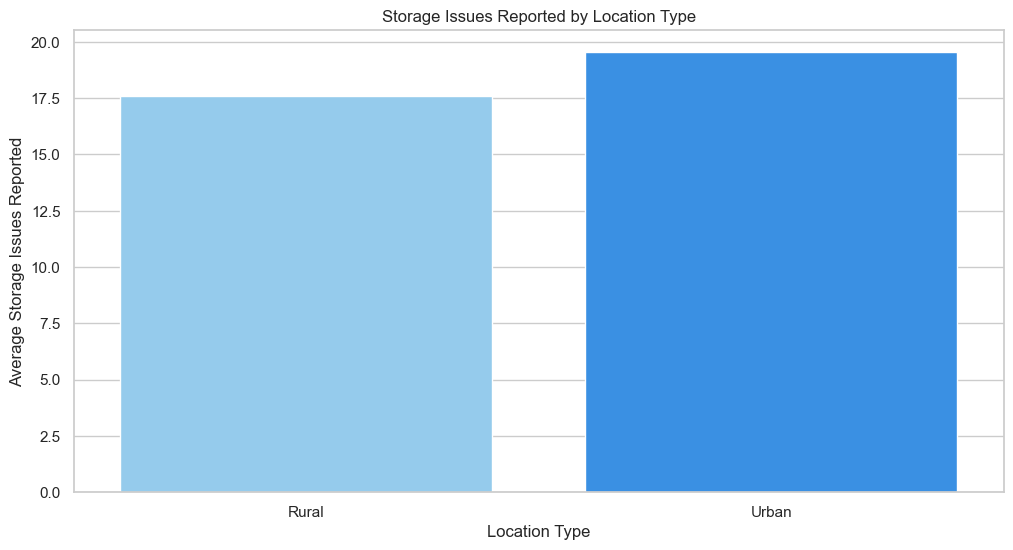

In [47]:
# Calculate the average storage issues reported by location type
wh_op_loc_str_avg = data.groupby('Location_type')['storage_issue_reported_l3m'].mean().reset_index()

# Determine the maximum value for coloring
wh_op_loc_str_max_cat = wh_op_loc_str_avg['storage_issue_reported_l3m'].max()

# Create a color palette based on the maximum value
wh_op_loc_str_palette = ['dodgerblue' if value == wh_op_loc_str_max_cat else 'lightskyblue' for value in wh_op_loc_str_avg['storage_issue_reported_l3m']]

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_op_loc_str_avg, x='Location_type', y='storage_issue_reported_l3m', hue='Location_type', palette=wh_op_loc_str_palette, legend=False)
plt.title('Storage Issues Reported by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Storage Issues Reported')
plt.show()

Insights:
1. Warehouses located in urban areas report a higher average number of storage issues compared to those in rural areas.

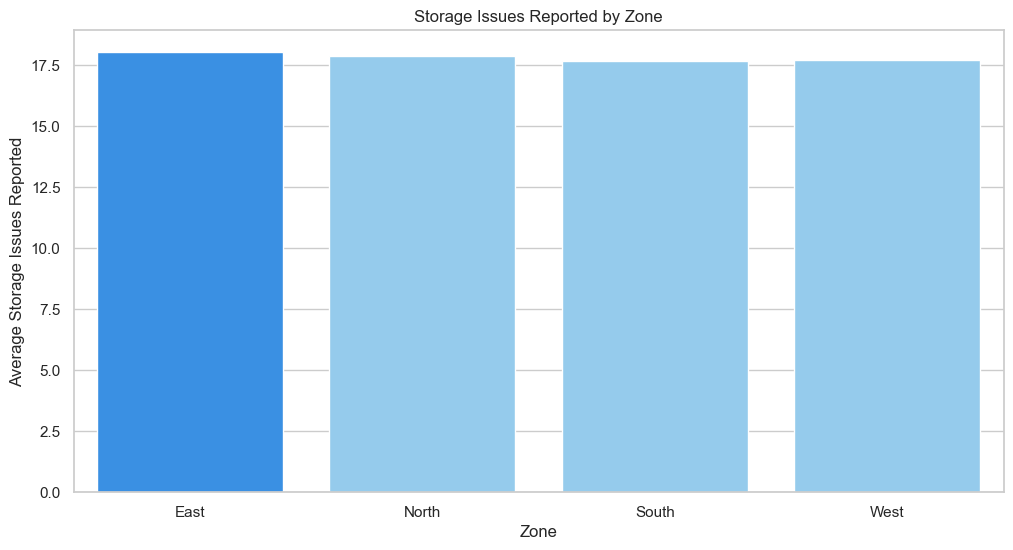

In [48]:
# Calculate the average storage issues reported by zone
wh_op_zone_str_avg = data.groupby('zone')['storage_issue_reported_l3m'].mean().reset_index()

# Determine the maximum value for coloring
wh_op_zone_str_max_cat = wh_op_zone_str_avg['storage_issue_reported_l3m'].max()

# Create a color palette based on the maximum value
wh_op_zone_str_palette = ['dodgerblue' if value == wh_op_zone_str_max_cat else 'lightskyblue' for value in wh_op_zone_str_avg['storage_issue_reported_l3m']]

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_op_zone_str_avg, x='zone', y='storage_issue_reported_l3m', hue='zone', palette=wh_op_zone_str_palette, legend=False)
plt.title('Storage Issues Reported by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Storage Issues Reported')
plt.show()

IV. Logistics and Transportation:

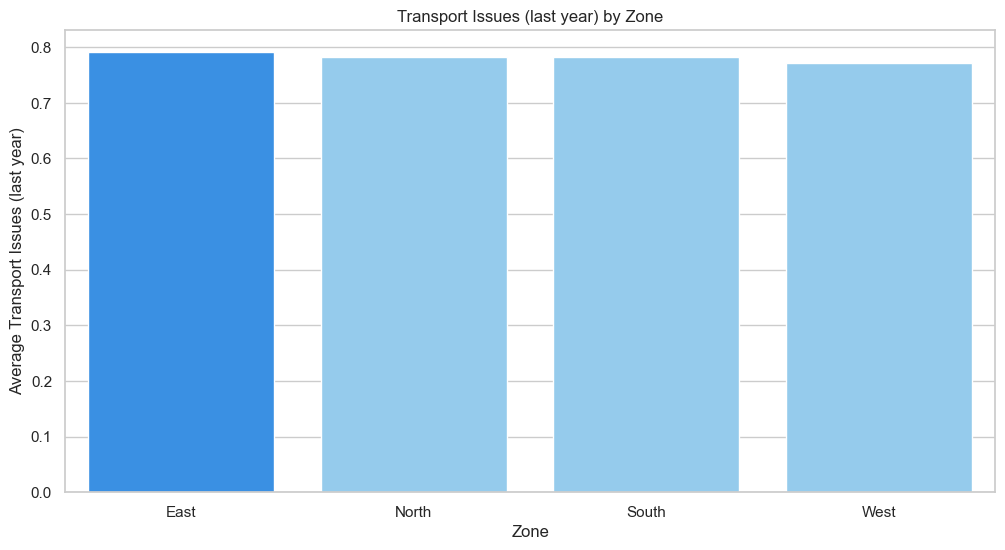

In [49]:
# Calculate the average transport issues reported by zone
wh_logi_zone_avg = datavis.groupby('zone')['transport_issue_l1y'].mean().reset_index()

# Determine the maximum value for coloring
wh_logi_zone_max_cat = wh_logi_zone_avg['transport_issue_l1y'].max()

# Create color palette based on the maximum value
wh_logi_zone_palette = ['dodgerblue' if value == wh_logi_zone_max_cat else 'lightskyblue' for value in wh_logi_zone_avg['transport_issue_l1y']]

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_logi_zone_avg, x='zone', y='transport_issue_l1y', hue='zone', palette=wh_logi_zone_palette, legend=False)
plt.title('Transport Issues (last year) by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Transport Issues (last year)')
plt.show()

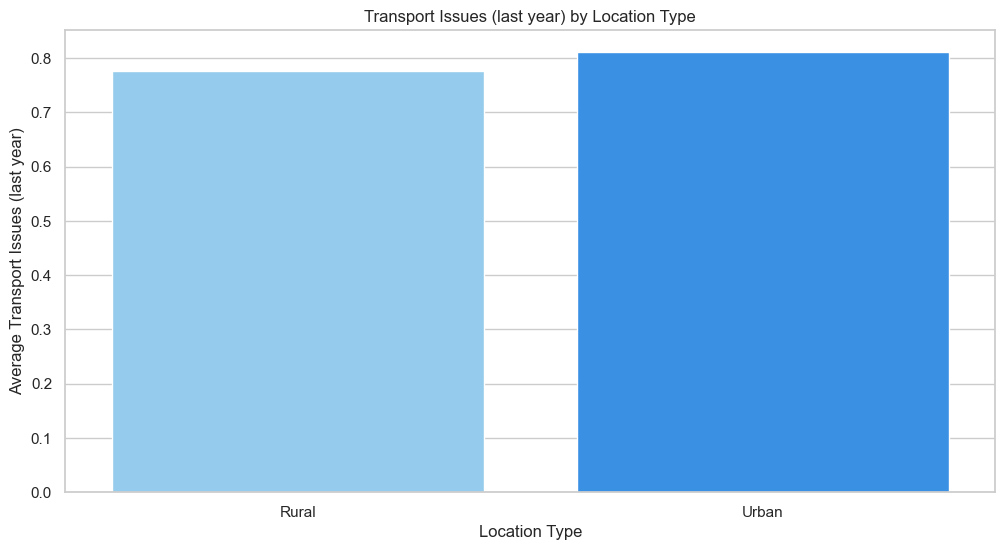

In [50]:
# Calculate the average transport issues reported by Location_type
wh_logi_loc_avg = datavis.groupby('Location_type')['transport_issue_l1y'].mean().reset_index()

# Determine the maximum value for coloring
wh_logi_loc_max_cat = wh_logi_loc_avg['transport_issue_l1y'].max()

# Create color palette based on the maximum value
wh_logi_loc_palette = ['dodgerblue' if value == wh_logi_loc_max_cat else 'lightskyblue' for value in wh_logi_loc_avg['transport_issue_l1y']]

# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_logi_loc_avg, x='Location_type', y='transport_issue_l1y', hue='Location_type', palette=wh_logi_loc_palette, legend=False)
plt.title('Transport Issues (last year) by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Transport Issues (last year)')
plt.show()

Insights:
1. The chart shows that warehouses in urban areas experience a higher average number of transport issues compared to those in rural areas.

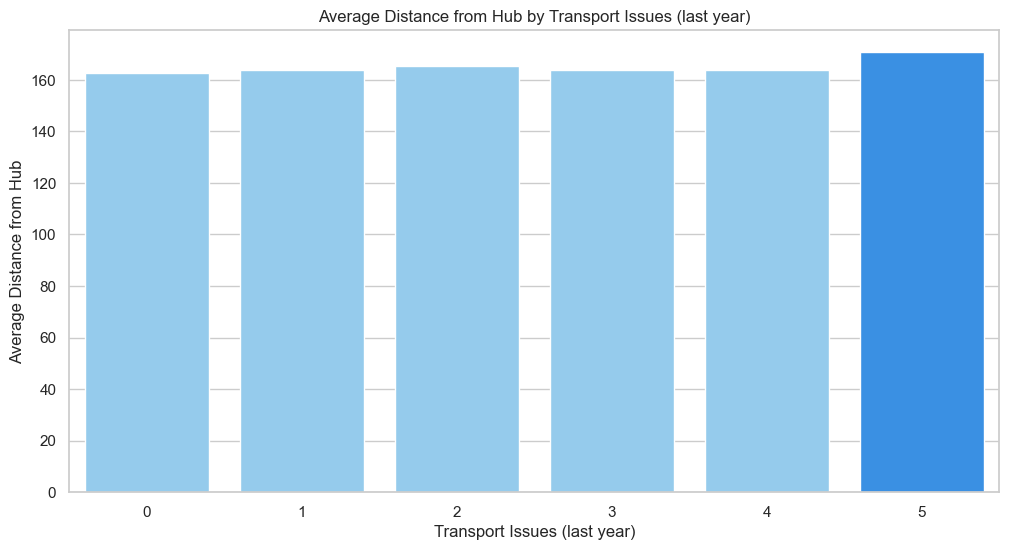

In [51]:
# Bar plot for average transport issues by distance from hub
wh_logi_dist_avg = datavis.groupby('transport_issue_l1y')['dist_from_hub'].mean().reset_index()

# Define the conditional coloring logic
wh_logi_dist_max_cat = wh_logi_dist_avg['dist_from_hub'].max()
wh_logi_dist_palette = ['dodgerblue' if value == wh_logi_dist_max_cat else 'lightskyblue' for value in wh_logi_dist_avg['dist_from_hub']]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_logi_dist_avg, y='dist_from_hub', x='transport_issue_l1y', hue='transport_issue_l1y', palette=wh_logi_dist_palette, legend=False)
plt.title('Average Distance from Hub by Transport Issues (last year)')
plt.ylabel('Average Distance from Hub')
plt.xlabel('Transport Issues (last year)')
plt.show()

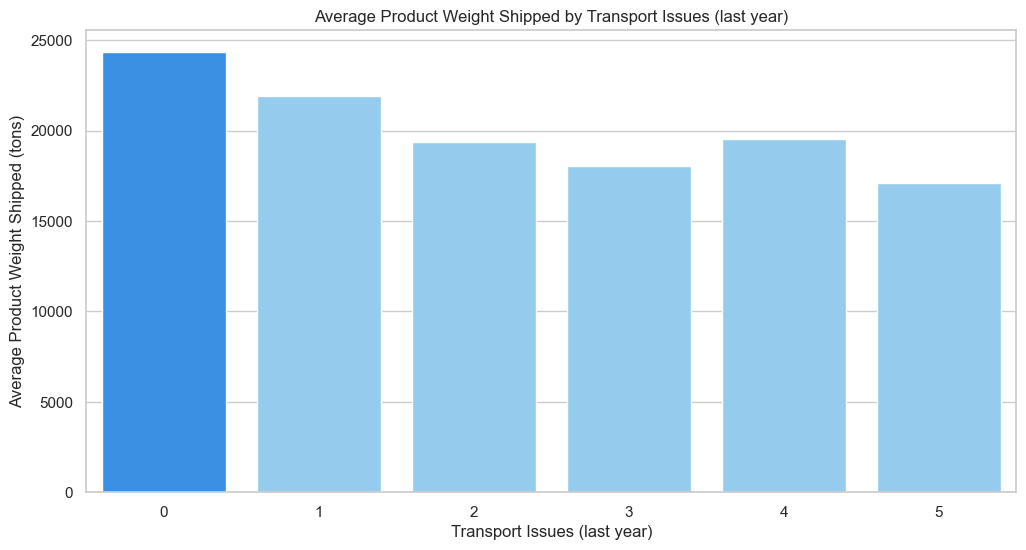

In [52]:
# Bar plot for average transport issues by product weight
wh_logi_prod_avg = datavis.groupby('transport_issue_l1y')['product_wg_ton'].mean().reset_index()

# Define the conditional coloring logic
wh_logi_prod_max_cat = wh_logi_prod_avg['product_wg_ton'].max()
wh_logi_prod_palette = ['dodgerblue' if value == wh_logi_prod_max_cat else 'lightskyblue' for value in wh_logi_prod_avg['product_wg_ton']]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_logi_prod_avg, y='product_wg_ton', x='transport_issue_l1y', hue='transport_issue_l1y', palette=wh_logi_prod_palette, legend=False)
plt.title('Average Product Weight Shipped by Transport Issues (last year)')
plt.ylabel('Average Product Weight Shipped (tons)')
plt.xlabel('Transport Issues (last year)')
plt.show()

V. Competition and Market Factors:

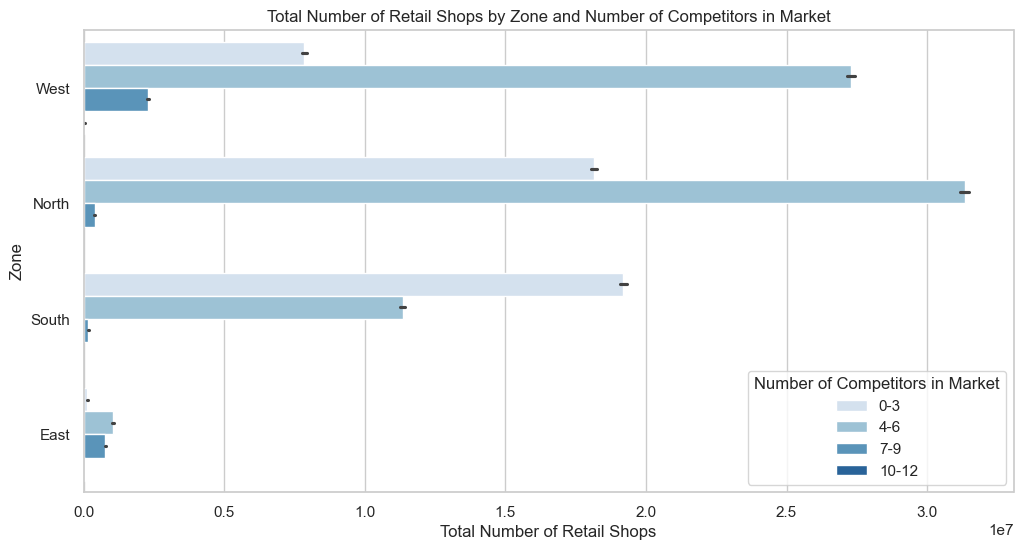

In [53]:
# Define the bin edges
wh_mar_bin_edges = [0, 3, 6, 9, 12]

# Define the bin labels
wh_mar_bin_labels = ['0-3', '4-6', '7-9', '10-12']

# Create a new column in the DataFrame to represent the bins
datavis['Competitor_in_mkt_bins'] = pd.cut(datavis['Competitor_in_mkt'], bins=wh_mar_bin_edges, labels=wh_mar_bin_labels, right=False)

# Bar plot for Competitors in Market vs. Number of Retail Shops, with hue representing the bins
plt.figure(figsize=(12, 6))
sns.barplot(data=datavis, x='retail_shop_num', y='zone', hue='Competitor_in_mkt_bins', estimator=sum, palette="Blues")
plt.title('Total Number of Retail Shops by Zone and Number of Competitors in Market')
plt.xlabel('Total Number of Retail Shops')
plt.ylabel('Zone')
plt.legend(title='Number of Competitors in Market')
plt.show()

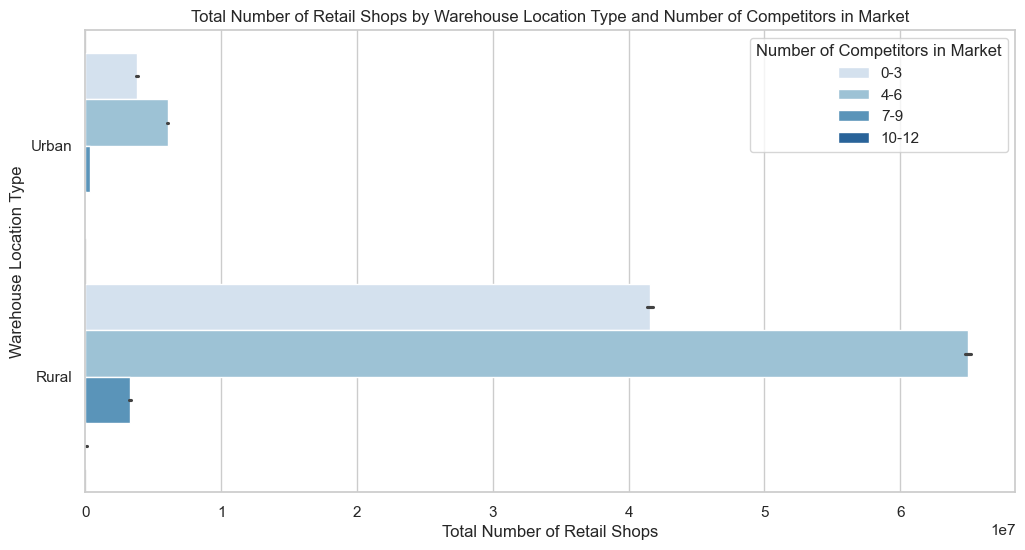

In [54]:
# Bar plot for Competitors in Market vs. Number of Retail Shops, with hue representing the bins
plt.figure(figsize=(12, 6))
sns.barplot(data=datavis, x='retail_shop_num', y='Location_type', hue='Competitor_in_mkt_bins', estimator=sum, palette="Blues")
plt.title('Total Number of Retail Shops by Warehouse Location Type and Number of Competitors in Market')
plt.xlabel('Total Number of Retail Shops')
plt.ylabel('Warehouse Location Type')
plt.legend(title='Number of Competitors in Market')
plt.show()

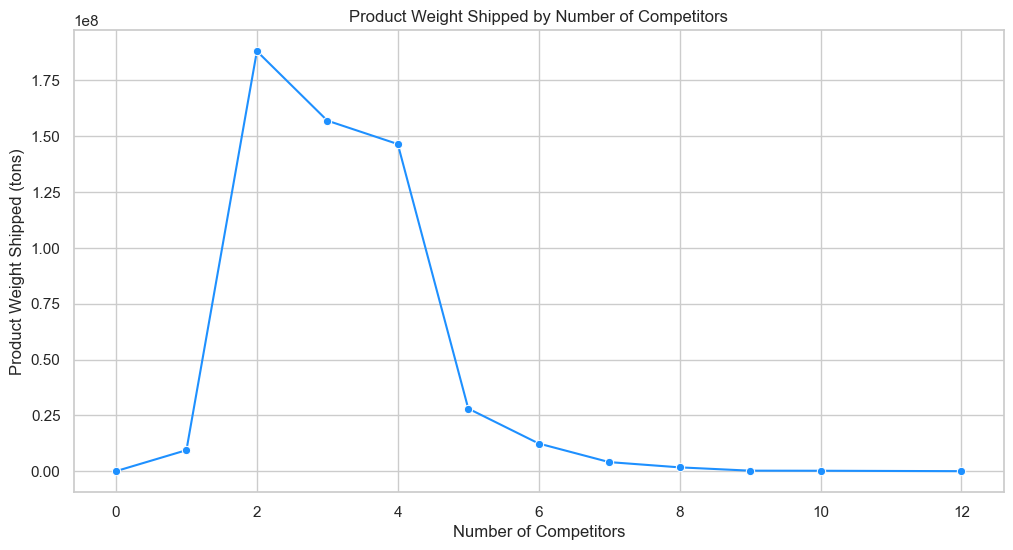

In [55]:
# Competitors' Influence on Warehouse Performance
wh_mar_prod_tot = datavis.groupby('Competitor_in_mkt')['product_wg_ton'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=wh_mar_prod_tot, x='Competitor_in_mkt', y='product_wg_ton', marker='o', color='dodgerblue')
plt.title('Product Weight Shipped by Number of Competitors')
plt.xlabel('Number of Competitors')
plt.ylabel('Product Weight Shipped (tons)')
plt.show()

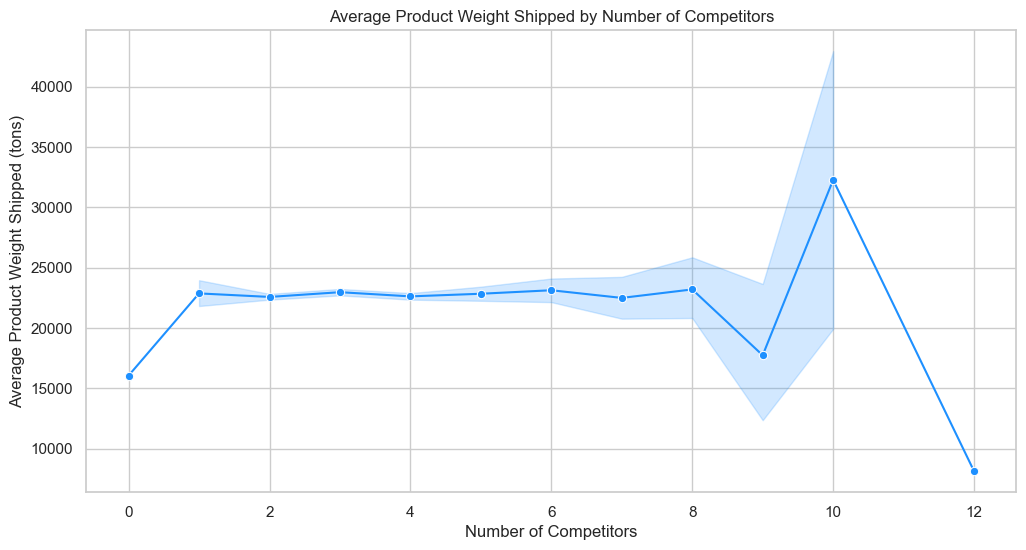

In [56]:
# Competitors' Influence on Warehouse Performance
plt.figure(figsize=(12, 6))
sns.lineplot(data=datavis, x='Competitor_in_mkt', y='product_wg_ton', marker='o', color='dodgerblue')
plt.title('Average Product Weight Shipped by Number of Competitors')
plt.xlabel('Number of Competitors')
plt.ylabel('Average Product Weight Shipped (tons)')
plt.show()

VI. Compliance and Regulatory Factors

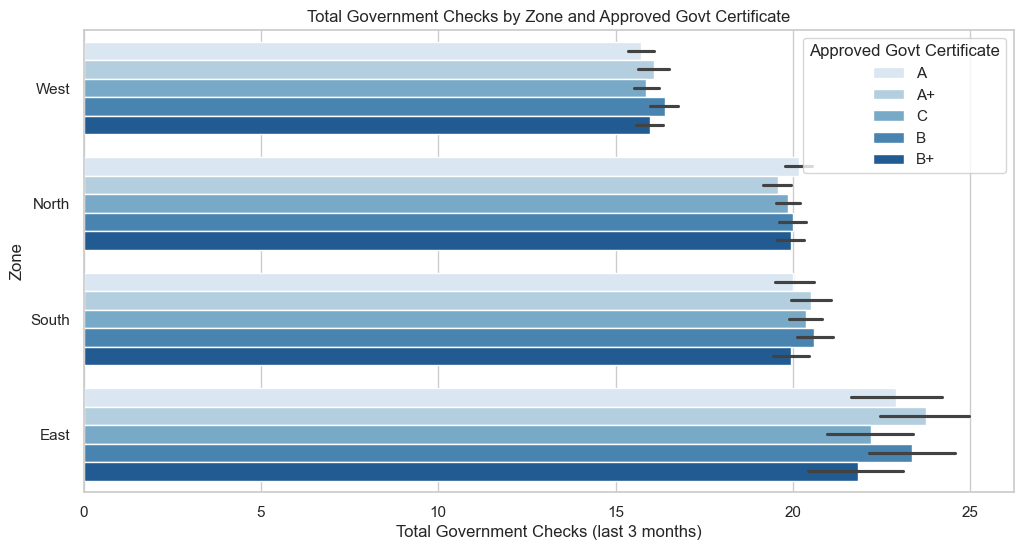

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=datavis, x='govt_check_l3m', y='zone', hue='approved_wh_govt_certificate', estimator='mean', palette='Blues')
plt.title('Total Government Checks by Zone and Approved Govt Certificate')
plt.xlabel('Total Government Checks (last 3 months)')
plt.ylabel('Zone')
plt.legend(title='Approved Govt Certificate')
plt.show()

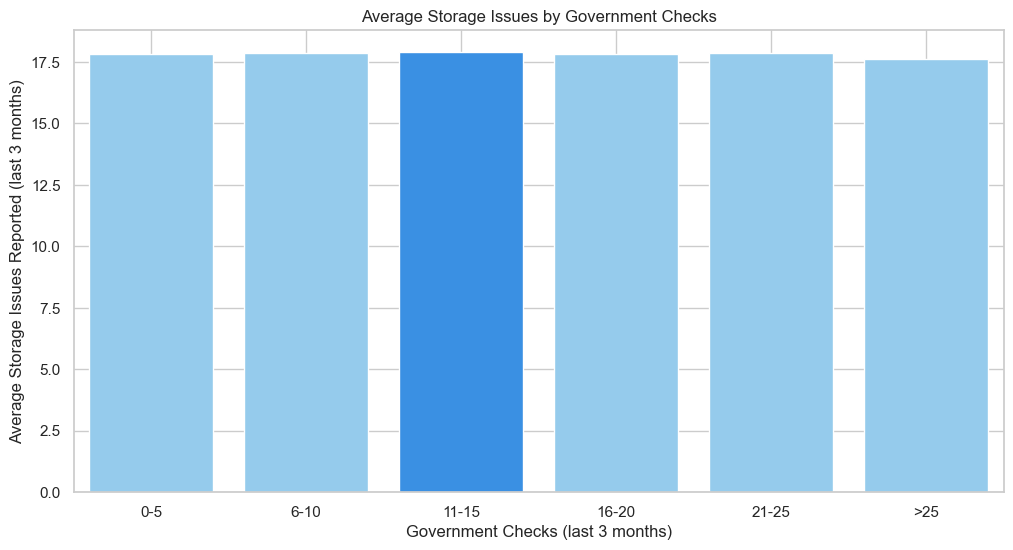

In [58]:
# Create bins for government checks
wh_comp_bin_edges = [0, 5, 10, 15, 20, 25, np.inf]
wh_comp_bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '>25']

datavis['govt_check_bins'] = pd.cut(datavis['govt_check_l3m'], bins=wh_comp_bin_edges, labels=wh_comp_bin_labels, right=False)

# Group by government check bins and calculate mean storage issues
wh_comp_str_avg = datavis.groupby('govt_check_bins', observed=False)['storage_issue_reported_l3m'].mean().reset_index()

# Determine the maximum value for coloring
wh_comp_str_max_cat = wh_comp_str_avg['storage_issue_reported_l3m'].max()

# Create color palette based on the maximum value
comp_str_palette = ['dodgerblue' if value == wh_comp_str_max_cat else 'lightskyblue' for value in wh_comp_str_avg['storage_issue_reported_l3m']]

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_comp_str_avg, x='govt_check_bins', y='storage_issue_reported_l3m', hue='govt_check_bins', palette=comp_str_palette, legend=False)
plt.title('Average Storage Issues by Government Checks')
plt.xlabel('Government Checks (last 3 months)')
plt.ylabel('Average Storage Issues Reported (last 3 months)')
plt.grid(True)
plt.show()

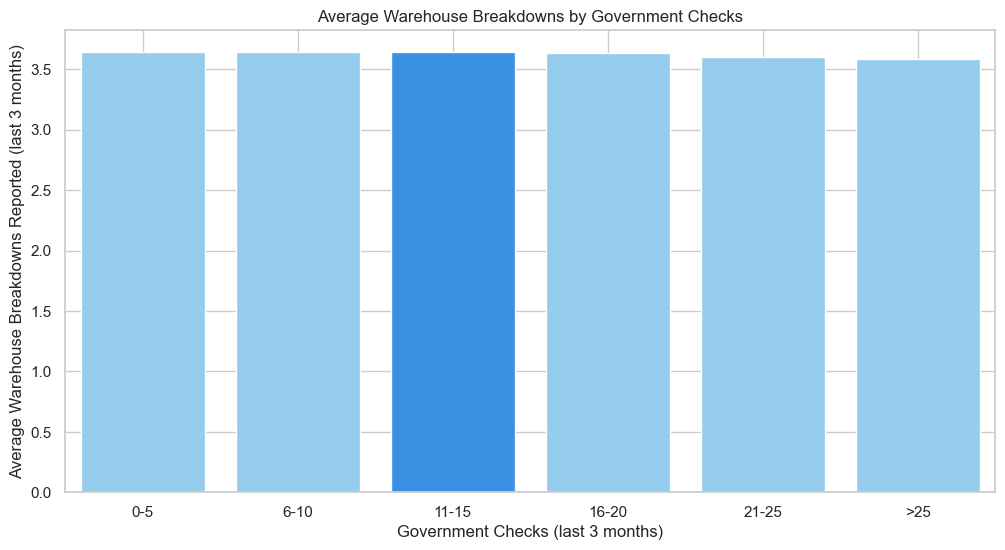

In [59]:
# Group by government check bins and calculate mean storage issues
wh_comp_break_avg = datavis.groupby('govt_check_bins', observed=False)['wh_breakdown_l3m'].mean().reset_index()

# Determine the maximum value for coloring
wh_comp_break_max_cat = wh_comp_break_avg['wh_breakdown_l3m'].max()

# Create color palette based on the maximum value
comp_break_palette = ['dodgerblue' if value == wh_comp_break_max_cat else 'lightskyblue' for value in wh_comp_break_avg['wh_breakdown_l3m']]

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=wh_comp_break_avg, x='govt_check_bins', y='wh_breakdown_l3m', hue='govt_check_bins', palette=comp_break_palette, legend=False)
plt.title('Average Warehouse Breakdowns by Government Checks')
plt.xlabel('Government Checks (last 3 months)')
plt.ylabel('Average Warehouse Breakdowns Reported (last 3 months)')
plt.grid(True)
plt.show()

VII. Infrastructure and Facilities

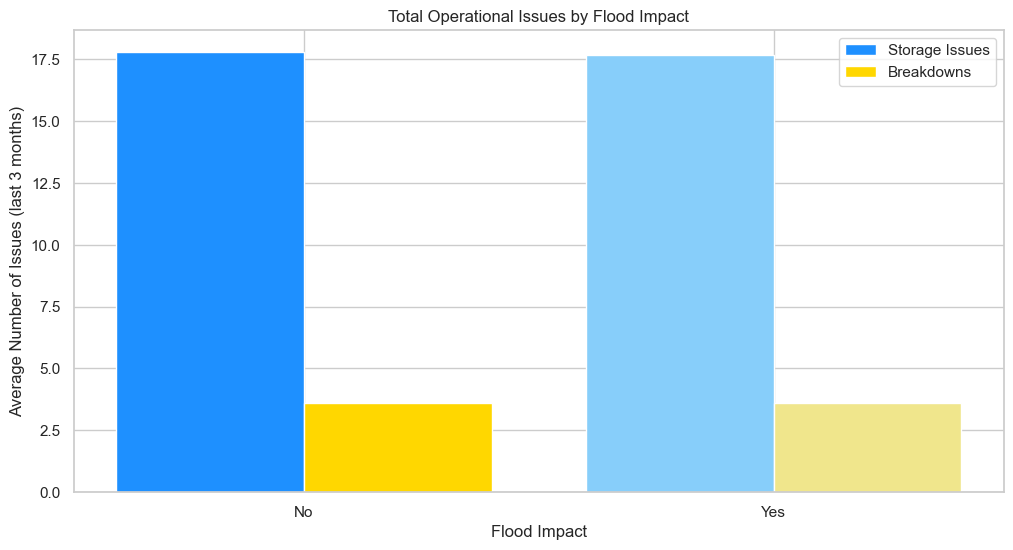

In [60]:
# Calculate total values for each issue by warehouse capacity size
wh_inf_issues_avg = datavis.groupby('flood_impacted', observed=False)[['storage_issue_reported_l3m', 'wh_breakdown_l3m']].mean().reset_index()

# Find the maximum value for each issue
wh_inf_strissue_max_cat = wh_inf_issues_avg['storage_issue_reported_l3m'].max()
wh_inf_breakissue_max_cat = wh_inf_issues_avg['wh_breakdown_l3m'].max()

# Create color schemes for each issue
wh_inf_strissue_palette = ['dodgerblue' if value == wh_inf_strissue_max_cat else 'lightskyblue' for value in wh_inf_issues_avg['storage_issue_reported_l3m']]
wh_inf_breakissue_palette = ['gold' if value == wh_inf_breakissue_max_cat else 'khaki' for value in wh_inf_issues_avg['wh_breakdown_l3m']]

# Plot each bar group separately to apply different colors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
bar_positions = np.arange(len(wh_inf_issues_avg))

# Plot each bar group separately to apply different colors
ax.bar(bar_positions, wh_inf_issues_avg['storage_issue_reported_l3m'], width=bar_width, color=wh_inf_strissue_palette, label='Storage Issues')
ax.bar(bar_positions + bar_width, wh_inf_issues_avg['wh_breakdown_l3m'], width=bar_width, color=wh_inf_breakissue_palette, label='Breakdowns')

# Set labels and title
ax.set_xticks(bar_positions + bar_width/2)
ax.set_xticklabels(['No', 'Yes'])
ax.set_title('Total Operational Issues by Flood Impact')
ax.set_xlabel('Flood Impact')
ax.set_ylabel('Average Number of Issues (last 3 months)')
ax.legend()
plt.show()

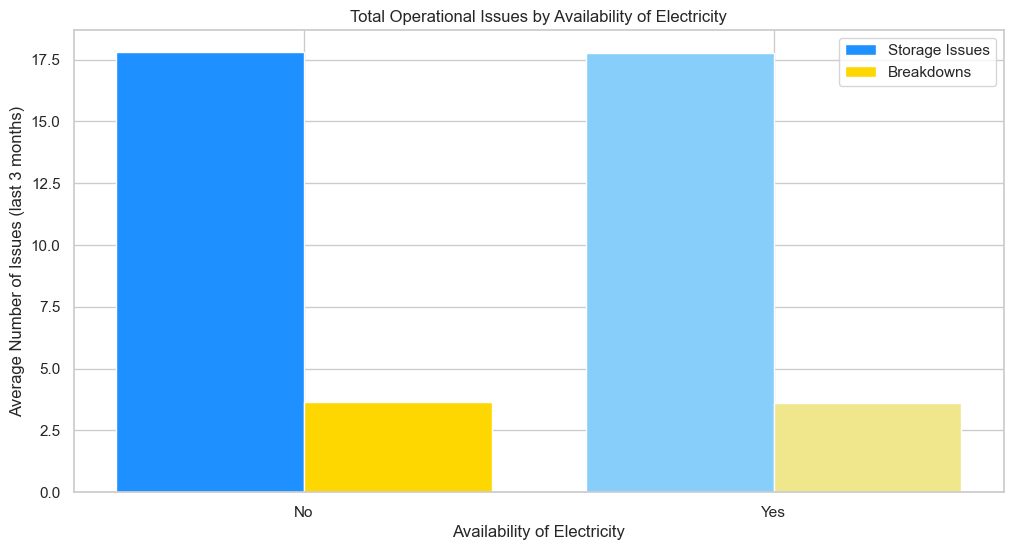

In [61]:
# Calculate total values for each issue by warehouse capacity size
wh_inf_issues_avg2 = datavis.groupby('electric_supply', observed=False)[['storage_issue_reported_l3m', 'wh_breakdown_l3m']].mean().reset_index()

# Find the maximum value for each issue
wh_inf_strissue_max_cat2 = wh_inf_issues_avg2['storage_issue_reported_l3m'].max()
wh_inf_breakissue_max_cat2 = wh_inf_issues_avg2['wh_breakdown_l3m'].max()

# Create color schemes for each issue
wh_inf_strissue_palette2 = ['dodgerblue' if value == wh_inf_strissue_max_cat2 else 'lightskyblue' for value in wh_inf_issues_avg2['storage_issue_reported_l3m']]
wh_inf_breakissue_palette2 = ['gold' if value == wh_inf_breakissue_max_cat2 else 'khaki' for value in wh_inf_issues_avg2['wh_breakdown_l3m']]

# Plot each bar group separately to apply different colors
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4
bar_positions = np.arange(len(wh_inf_issues_avg2))

# Plot each bar group separately to apply different colors
ax.bar(bar_positions, wh_inf_issues_avg2['storage_issue_reported_l3m'], width=bar_width, color=wh_inf_strissue_palette2, label='Storage Issues')
ax.bar(bar_positions + bar_width, wh_inf_issues_avg2['wh_breakdown_l3m'], width=bar_width, color=wh_inf_breakissue_palette2, label='Breakdowns')

# Set labels and title
ax.set_xticks(bar_positions + bar_width/2)
ax.set_xticklabels(['No', 'Yes'])
ax.set_title('Total Operational Issues by Availability of Electricity')
ax.set_xlabel('Availability of Electricity')
ax.set_ylabel('Average Number of Issues (last 3 months)')
ax.legend()
plt.show()

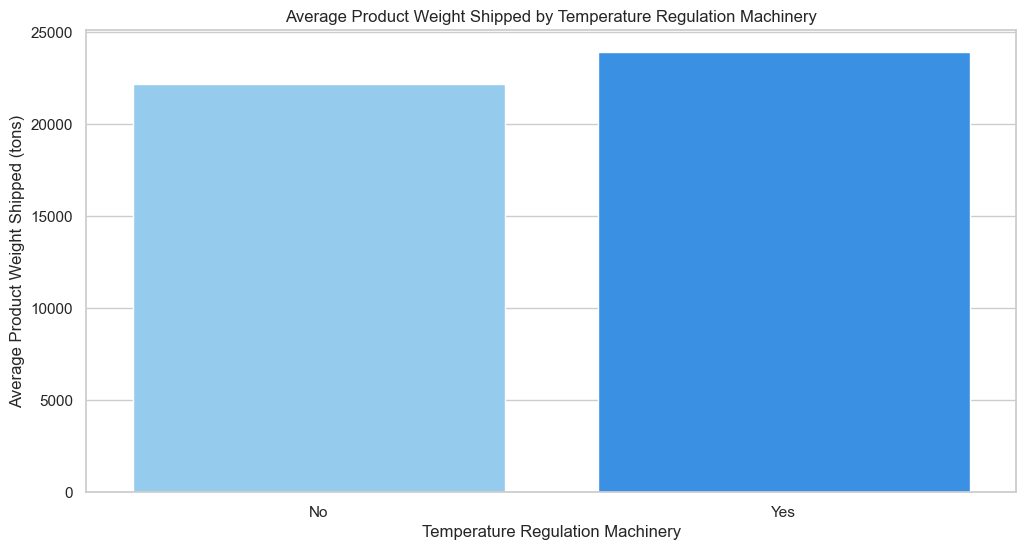

In [62]:
# Group by government check bins and calculate mean storage issues
wh_inf_prod_avg = datavis.groupby('temp_reg_mach', observed=False)['product_wg_ton'].mean().reset_index()

# Determine the maximum value for coloring
wh_inf_prod_max_cat = wh_inf_prod_avg['product_wg_ton'].max()

# Create color palette based on the maximum value
wh_inf_prod_palette = ['dodgerblue' if value == wh_inf_prod_max_cat else 'lightskyblue' for value in wh_inf_prod_avg['product_wg_ton']]

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=wh_inf_prod_avg, x='temp_reg_mach', y='product_wg_ton', hue='temp_reg_mach', palette=wh_inf_prod_palette, legend=False)
plt.title('Average Product Weight Shipped by Temperature Regulation Machinery')
plt.xlabel('Temperature Regulation Machinery')
plt.ylabel('Average Product Weight Shipped (tons)')
ax.set_xticks(range(len(wh_inf_prod_avg)))
ax.set_xticklabels(['No', 'Yes'])
plt.show()

VIII. Historical Trend

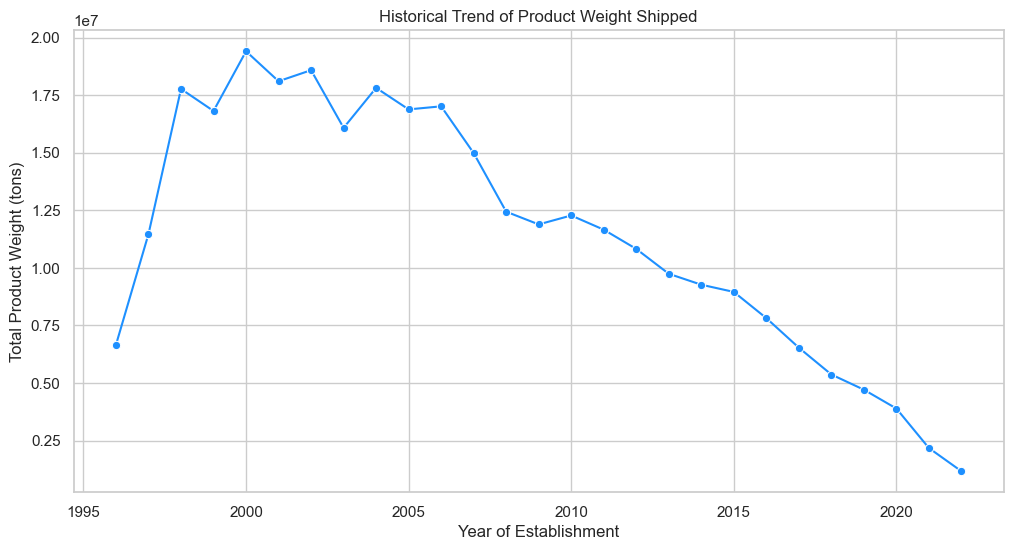

In [63]:
# Historical trend analysis (for warehouses with known establishment years)
wh_est_year_trend = datavis.dropna(subset=['wh_est_year']).groupby('wh_est_year')['product_wg_ton'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=wh_est_year_trend, marker='o', color='dodgerblue')
plt.title('Historical Trend of Product Weight Shipped')
plt.xlabel('Year of Establishment')
plt.ylabel('Total Product Weight (tons)')
plt.show()

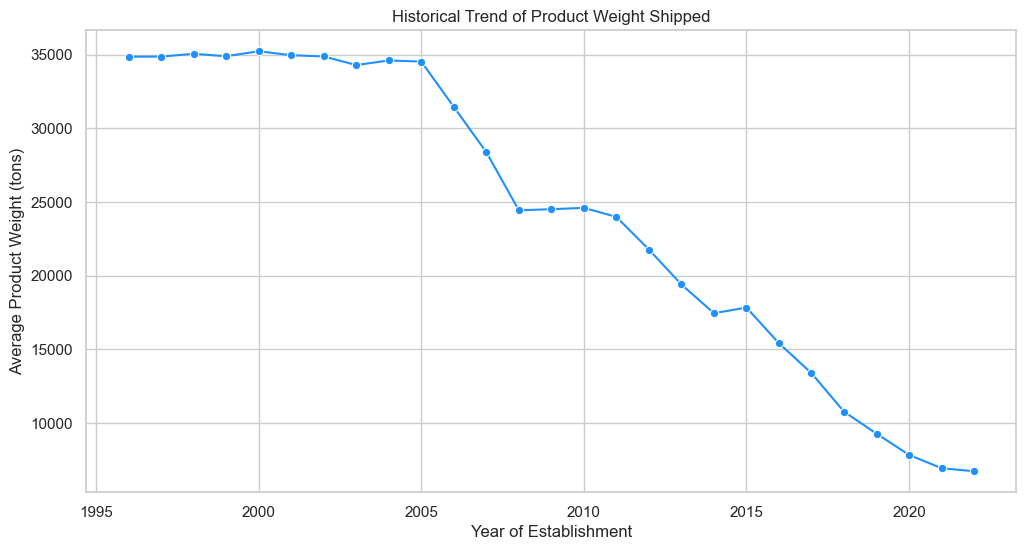

In [64]:
# Historical trend analysis (for warehouses with known establishment years)
wh_est_year_trend2 = datavis.dropna(subset=['wh_est_year']).groupby('wh_est_year')['product_wg_ton'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=wh_est_year_trend2, marker='o', color='dodgerblue')
plt.title('Historical Trend of Product Weight Shipped')
plt.xlabel('Year of Establishment')
plt.ylabel('Average Product Weight (tons)')
plt.show()

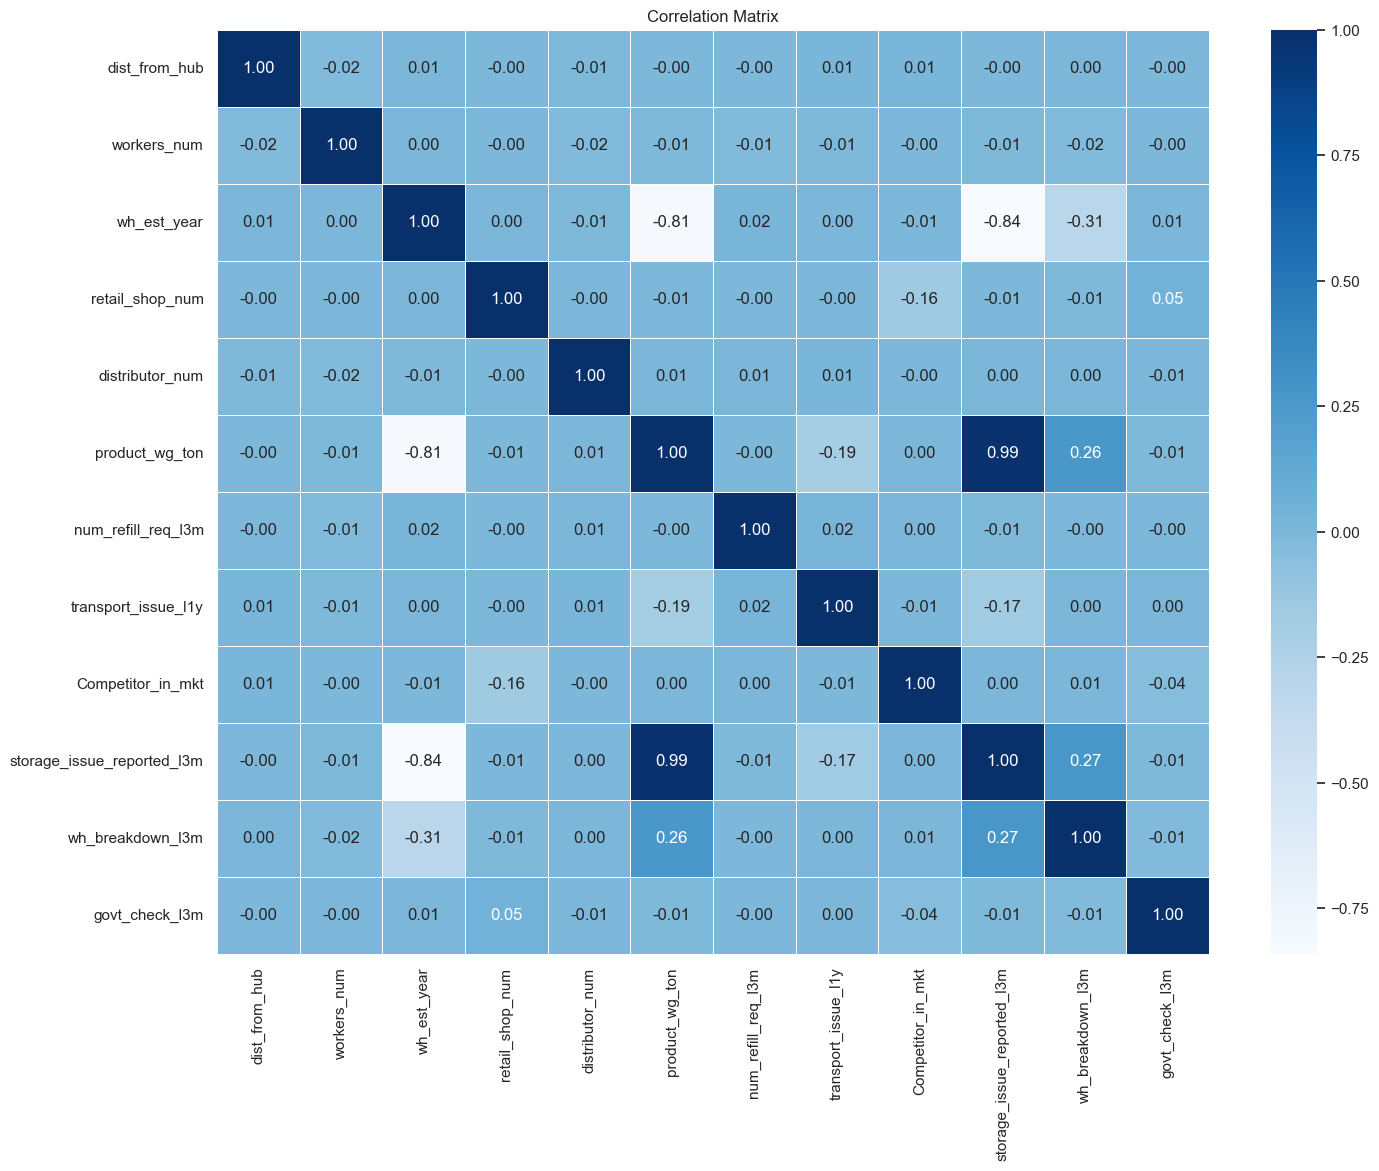

In [65]:
# Correlation Matrix
correlation_matrix = data[cont_col + tar_col + dis_col].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering & Baseline Modelling

In [66]:
# Create indicator variable for wh_est_year missingness
data['wh_est_year_missing'] = data['wh_est_year'].isnull().astype(int)

In [67]:
# Feature Importance Analysis before proceeding with missing value handling and model building.
# Use a placeholder value that is clearly outside the valid range for 'wh_est_year'
year_placeholder = -1
data['wh_est_year'] = data['wh_est_year'].fillna(year_placeholder)

features = data.drop(columns=['product_wg_ton'])
target = data['product_wg_ton']
features_encoded = pd.get_dummies(features, drop_first=True)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(features_encoded, target)

feature_importances = rf.feature_importances_
feature_names = features_encoded.columns

feature_importance_data = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_data = feature_importance_data.sort_values(by='Importance', ascending=False)
print(feature_importance_data)

                            Feature  Importance
11       storage_issue_reported_l3m    0.983234
29   approved_wh_govt_certificate_B    0.004758
30  approved_wh_govt_certificate_B+    0.004718
10                      wh_est_year    0.001062
12                    temp_reg_mach    0.000849
1               transport_issue_l1y    0.000783
8                     dist_from_hub    0.000599
3                   retail_shop_num    0.000587
4                   distributor_num    0.000539
9                       workers_num    0.000455
14                   govt_check_l3m    0.000395
0                num_refill_req_l3m    0.000321
28  approved_wh_govt_certificate_A+    0.000282
13                 wh_breakdown_l3m    0.000226
2                 Competitor_in_mkt    0.000157
31   approved_wh_govt_certificate_C    0.000109
27             wh_owner_type_Rented    0.000072
7                   electric_supply    0.000063
19                       zone_North    0.000061
20                       zone_South    0

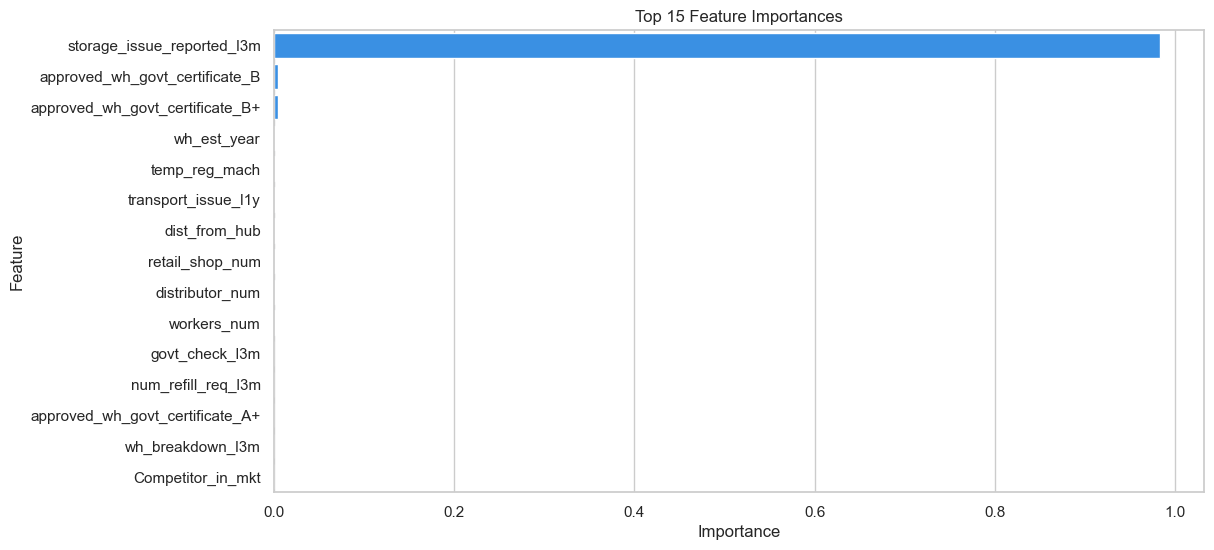

In [68]:
# Visualize most important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_data.head(15), color='dodgerblue', legend=False)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [69]:
# Creating base model v1 (Single Variable Linear Regression)
# Select the most important feature and the target variable
base_X = data[['storage_issue_reported_l3m']]
base_y = data['product_wg_ton']

# Split the data into training and testing sets
base_X_train, base_X_test, base_y_train, base_y_test = train_test_split(base_X, base_y, test_size=0.2, random_state=42)

# Initialize the scaler
base_sc = StandardScaler()

# Fit the scaler on the training data and transform the training data
base_X_train_scaled = base_sc.fit_transform(base_X_train)

# Transform the test data using the already fitted scaler
base_X_test_scaled = base_sc.transform(base_X_test)
 
# Create and fit the model
base_model = LinearRegression()
base_model.fit(base_X_train_scaled, base_y_train)

# Make predictions
base_y_pred = base_model.predict(base_X_test_scaled)

# Evaluate the model
base_mae = mean_absolute_error(base_y_test, base_y_pred)
base_mse = mean_squared_error(base_y_test, base_y_pred)
base_r2 = r2_score(base_y_test, base_y_pred)

print(f'Mean Absolute Error: {base_mae}')
print(f'Mean Squared Error: {base_mse}')
print(f'R-squared: {base_r2}')

Mean Absolute Error: 1171.1772862427251
Mean Squared Error: 2353965.6971311127
R-squared: 0.9817835776732385


In [70]:
# Coefficients and intercept from the model
beta = base_model.coef_[0]
beta_0 = base_model.intercept_

print("Model Coefficients:", beta)
print("Model Intercept:", beta_0)

# Mean and standard deviation used for scaling
mu = base_sc.mean_
sigma = base_sc.scale_

# Calculate new coefficients and intercept
alpha_0 = beta_0 - np.sum(beta * (mu / sigma))
alpha = beta / sigma

print("Reverse Scaled Intercept (alpha_0):", alpha_0)
print("Reverse Scaled Coefficients (alpha):", alpha)

# Final equation
equation = f"y = {alpha_0} + ({alpha[0]}) * x1"
print("Base Equation:", equation)

Model Coefficients: 11230.984434849042
Model Intercept: 22751.738390494476
Reverse Scaled Intercept (alpha_0): -237.0734647341087
Reverse Scaled Coefficients (alpha): [1291.62074019]
Base Equation: y = -237.0734647341087 + (1291.620740187624) * x1


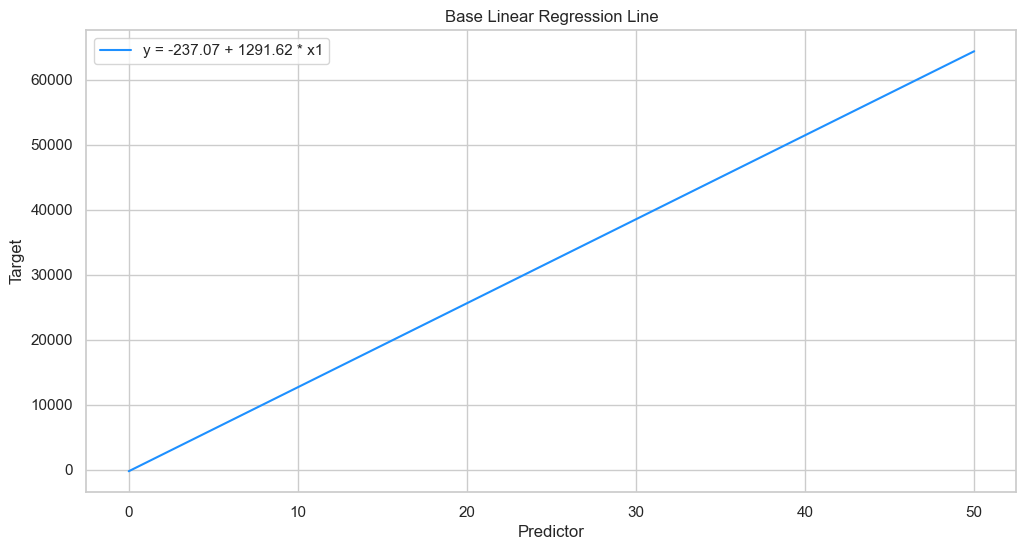

In [71]:
# Reverse scaled coefficients and intercept
alpha_0 = -237.0734647341087
alpha_1 = 1291.620740187624

# Generate a range of values for x1
x1_range = np.linspace(0, 50)

# Calculate corresponding y values
y = alpha_0 + alpha_1 * x1_range

# Plot the equation
plt.figure(figsize=(12, 6))
plt.plot(x1_range, y, label=f'y = {alpha_0:.2f} + {alpha_1:.2f} * x1', color='dodgerblue')
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.title('Base Linear Regression Line')
plt.legend()
plt.show()

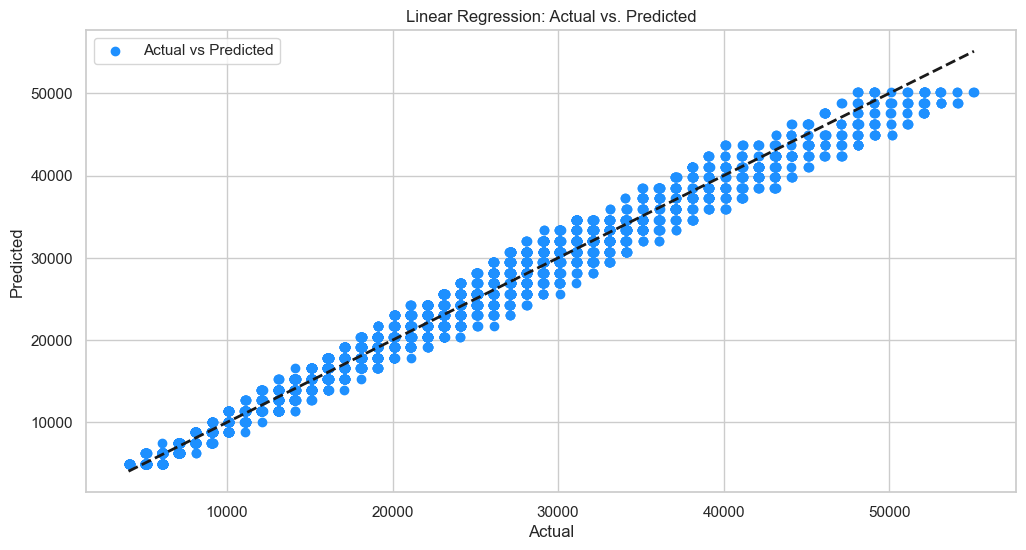

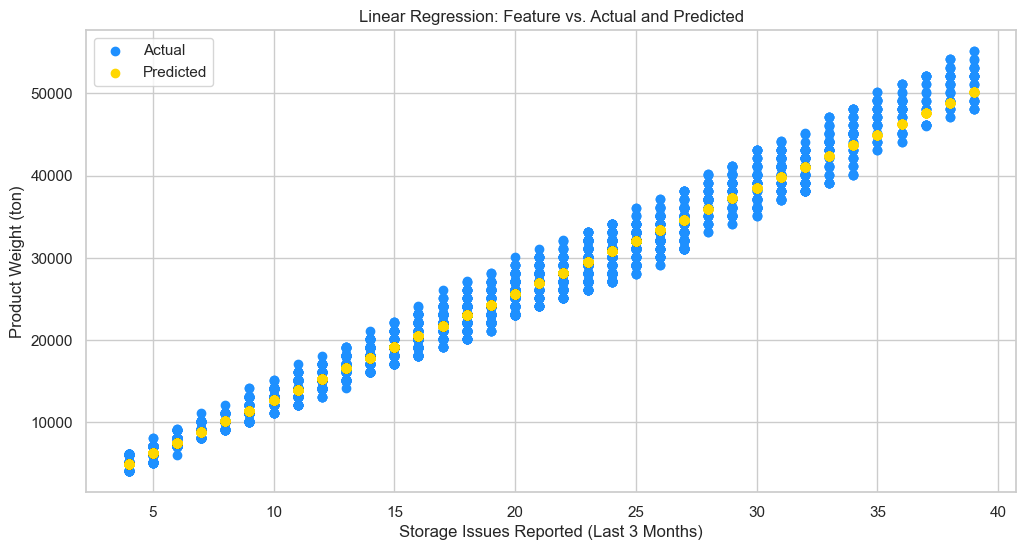

In [72]:
# Plot the results

# Plot 1: Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(base_y_test, base_y_pred, color='dodgerblue', label='Actual vs Predicted')
plt.plot([base_y_test.min(), base_y_test.max()], [base_y_test.min(), base_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# Plot 2: Feature vs. Actual and Predicted
plt.figure(figsize=(12, 6))
plt.scatter(base_X_test, base_y_test, color='dodgerblue', label='Actual')
plt.scatter(base_X_test, base_y_pred, color='gold', label='Predicted')
plt.xlabel('Storage Issues Reported (Last 3 Months)')
plt.ylabel('Product Weight (ton)')
plt.title('Linear Regression: Feature vs. Actual and Predicted')
plt.legend()
plt.show()


In [73]:
# Creating base model v2 (Linear Regression)
# Select the top 5 features and the target variable
base2_data_encoded = pd.get_dummies(data, drop_first=True)
base2_selected_features = ['storage_issue_reported_l3m', 'approved_wh_govt_certificate_B', 
                           'approved_wh_govt_certificate_B+']

base2_X = base2_data_encoded[base2_selected_features]
base2_y = data['product_wg_ton']

# Split the data into training and testing sets
base2_X_train, base2_X_test, base2_y_train, base2_y_test = train_test_split(base2_X, base2_y, test_size=0.2, random_state=42)

# Initialize the scaler
base2_sc = StandardScaler()

# Fit the scaler on the training data and transform the training data
base2_X_train_scaled = base2_sc.fit_transform(base2_X_train)

# Transform the test data using the already fitted scaler
base2_X_test_scaled = base2_sc.transform(base2_X_test)

# Create and fit the model
base2_model = LinearRegression()
base2_model.fit(base2_X_train_scaled, base2_y_train)

# Make predictions
base2_y_pred = base2_model.predict(base2_X_test_scaled)

# Evaluate the model
base2_mae = mean_absolute_error(base2_y_test, base2_y_pred)
base2_mse = mean_squared_error(base2_y_test, base2_y_pred)
base2_r2 = r2_score(base2_y_test, base2_y_pred)

print(f'Mean Absolute Error: {base2_mae}')
print(f'Mean Squared Error: {base2_mse}')
print(f'R-squared: {base2_r2}')


Mean Absolute Error: 906.1091266679356
Mean Squared Error: 1305642.7293490542
R-squared: 0.9898961402051548


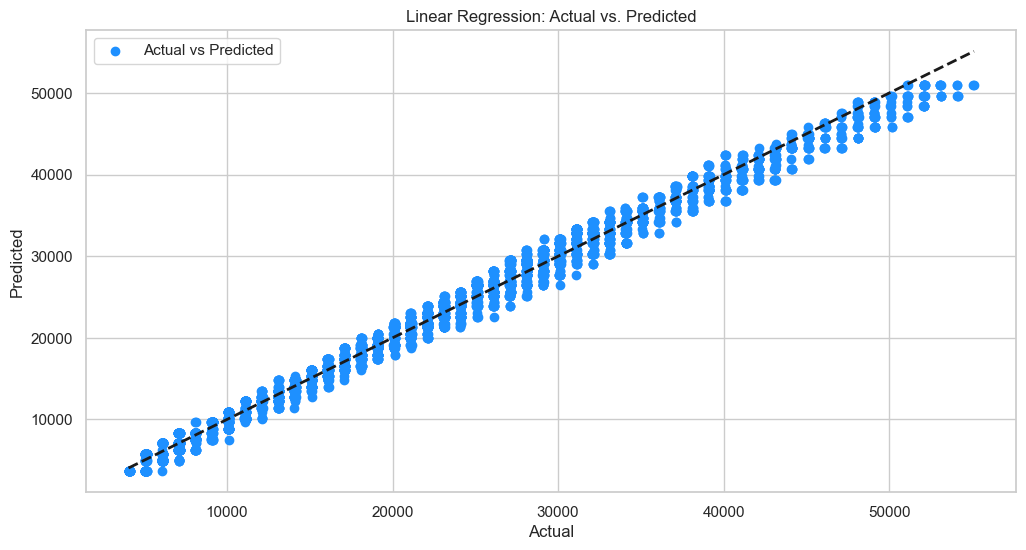

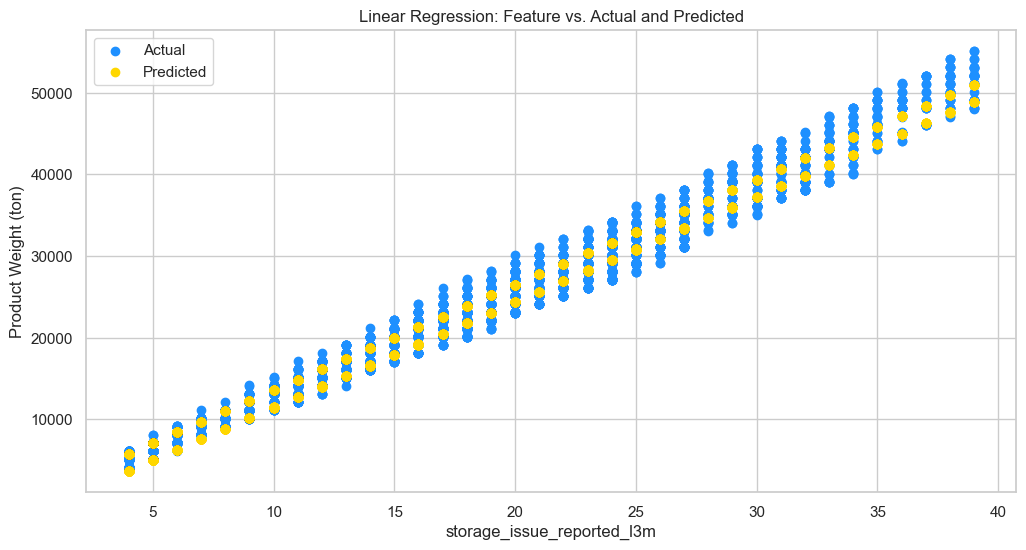

In [74]:
# Plot the results

# Plot 1: Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.scatter(base2_y_test, base2_y_pred, color='dodgerblue', label='Actual vs Predicted')
plt.plot([base2_y_test.min(), base2_y_test.max()], [base2_y_test.min(), base2_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

# Plot 2: Feature vs. Actual and Predicted
# Assuming 'storage_issue_reported_l3m' is the first feature in base2_X_test
feature_index = 0
feature_name = base2_selected_features[feature_index]

plt.figure(figsize=(12, 6))
plt.scatter(base2_X_test.iloc[:, feature_index], base2_y_test, color='dodgerblue', label='Actual')
plt.scatter(base2_X_test.iloc[:, feature_index], base2_y_pred, color='gold', label='Predicted')
plt.xlabel(feature_name)
plt.ylabel('Product Weight (ton)')
plt.title('Linear Regression: Feature vs. Actual and Predicted')
plt.legend()
plt.show()


In [75]:
# Dropping column with 48% missing data
cleaned_data = data.drop(['wh_est_year', 'wh_est_year_missing'], axis=1)

In [76]:
# Saving the dataframe as a CSV file
cleaned_data.to_csv('datasets/processed_data.csv', index=False)
print("Dataframe saved as 'processed_data.csv'")

Dataframe saved as 'processed_data.csv'


In [77]:
# Load the preprocessed data
df = pd.read_csv('datasets/processed_data.csv')

Selected features: Index(['transport_issue_l1y', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'WH_capacity_size_Mid', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'],
      dtype='object')
Mean Absolute Error: 850.8522092510391
Mean Squared Error: 1113294.5940461755
R-squared: 0.9913846473956854


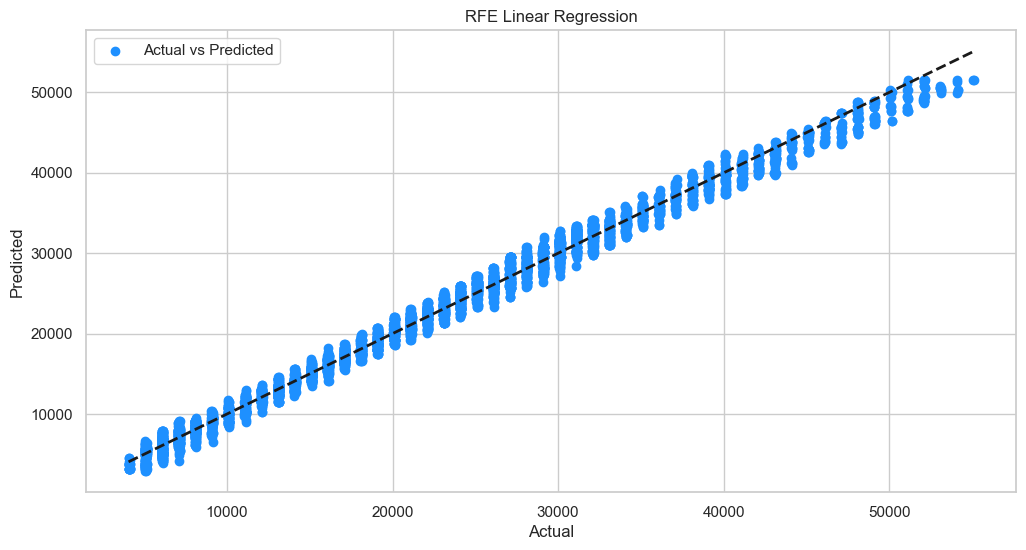

In [78]:
# Features and target variable
X = df.drop(columns=['product_wg_ton'])
y = df['product_wg_ton']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the RFE model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

# Select the most important features
selected_features = X_encoded.columns[rfe.support_]
print("Selected features:", selected_features)

# Fit the model with the selected features
X_train_selected = X_train_scaled[:, rfe.support_]
X_test_selected = X_test_scaled[:, rfe.support_]
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RFE Linear Regression')
plt.legend()
plt.show()

Linear Regression - MAE: 907.6230677460032, MSE: 1311144.6991942169, R2: 0.9897906035134477
Random Forest - MAE: 743.3761293300462, MSE: 931036.1289510767, R2: 0.9927499171991787
Gradient Boosting - MAE: 744.9515987691517, MSE: 931773.082625461, R2: 0.9927439162652615
XGBoost - MAE: 743.2740255128349, MSE: 930926.855241787, R2: 0.9927507892021452


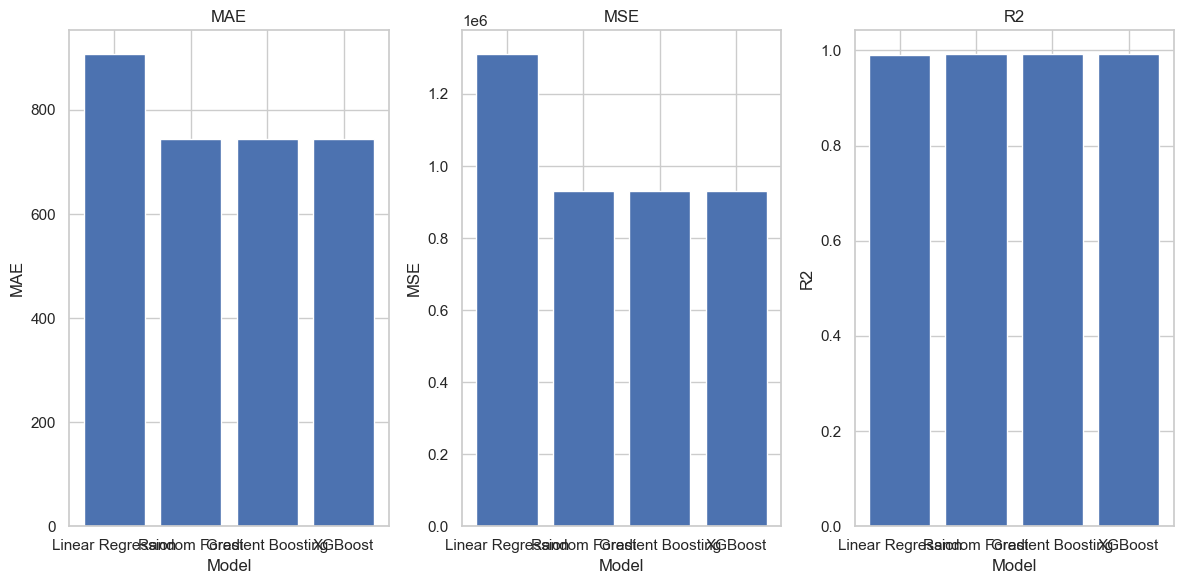

In [79]:
# Identify column indices for the selected features
selected_features = ['storage_issue_reported_l3m', 'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+']
selected_indices = [X_train.columns.get_loc(feature) for feature in selected_features]

# Prepare the data with selected features
X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

# Function to evaluate model using cross-validation
def evaluate_model(model, X, y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    mae_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    
    return {
        'MAE': -mae_scores.mean(),
        'MSE': -mse_scores.mean(),
        'R2': r2_scores.mean()
    }

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_selected, y_train)

# Display results
for model, metrics in results.items():
    print(f"{model} - MAE: {metrics['MAE']}, MSE: {metrics['MSE']}, R2: {metrics['R2']}")

# Plot results
metrics_names = ['MAE', 'MSE', 'R2']
n_models = len(models)
x = np.arange(n_models)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

for i, metric in enumerate(metrics_names):
    values = [results[model][metric] for model in models]
    axs[i].bar(x, values)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(models.keys())
    axs[i].set_title(metric)
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(metric)

plt.tight_layout()
plt.show()

Best Parameters:
{'fit_intercept': True}
Mean Absolute Error: 906.1091266679356
Mean Squared Error: 1305642.7293490542
R-squared: 0.9898961402051548


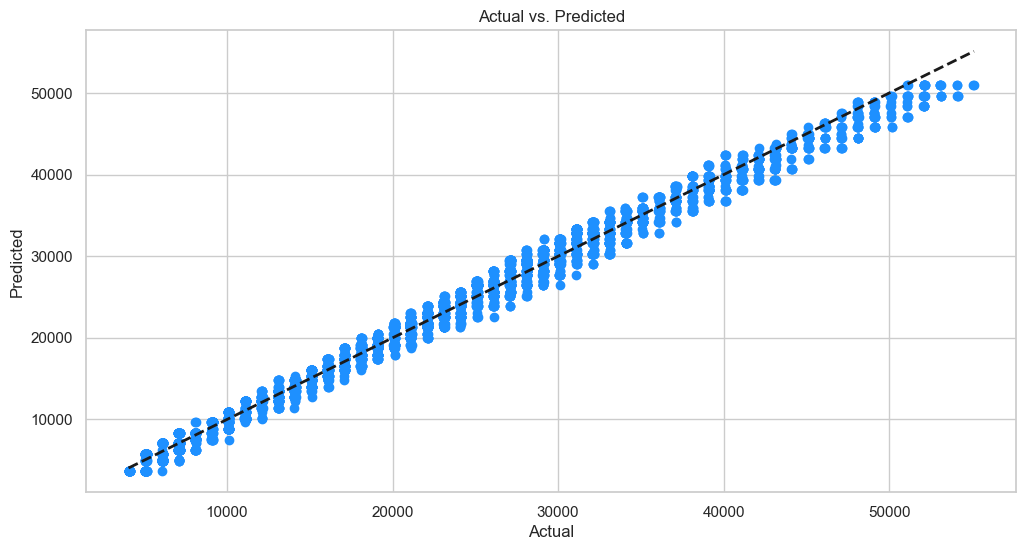

In [80]:
# Building final model
# Perform one-hot encoding
lr_df_encoded = pd.get_dummies(df, drop_first=True)
lr_selected_features = ['storage_issue_reported_l3m', 'approved_wh_govt_certificate_B', 
                        'approved_wh_govt_certificate_B+']

lr_X = lr_df_encoded[lr_selected_features]
lr_y = df['product_wg_ton']

# Split the data into training and testing sets
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=0.2, random_state=42)

# Initialize the scaler
lr_sc = StandardScaler()

# Fit the scaler on the training data and transform the training data
lr_X_train_scaled = lr_sc.fit_transform(lr_X_train)

# Transform the test data using the already fitted scaler
lr_X_test_scaled = lr_sc.transform(lr_X_test)

# Hyperparameter tuning and cross-validation
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=10, scoring='r2')
grid_search.fit(lr_X_train_scaled, lr_y_train)

best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:")
print(grid_search.best_params_)

# Make predictions using the best model
lr_y_pred = best_model.predict(lr_X_test_scaled)

# Evaluate the model
lr_mae = mean_absolute_error(lr_y_test, lr_y_pred)
lr_mse = mean_squared_error(lr_y_test, lr_y_pred)
lr_r2 = r2_score(lr_y_test, lr_y_pred)

print(f'Mean Absolute Error: {lr_mae}')
print(f'Mean Squared Error: {lr_mse}')
print(f'R-squared: {lr_r2}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(lr_y_test, lr_y_pred, color='dodgerblue')
plt.plot([lr_y_test.min(), lr_y_test.max()], [lr_y_test.min(), lr_y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

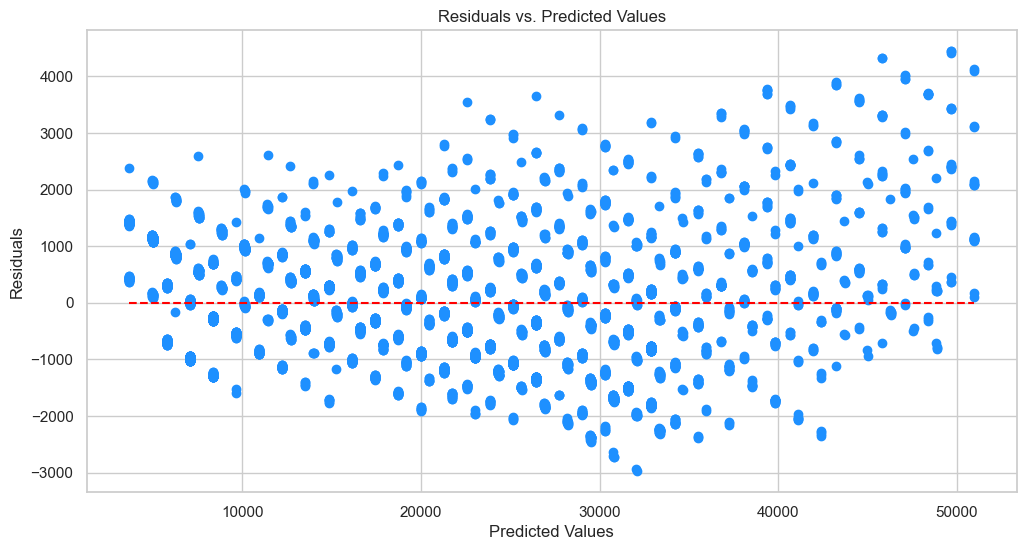

In [81]:
# Calculate residuals
residuals = lr_y_test - lr_y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.scatter(lr_y_pred, residuals, color='dodgerblue')
plt.hlines(y=0, xmin=lr_y_pred.min(), xmax=lr_y_pred.max(), colors='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

In [82]:
# Mean and scale (standard deviation) from the scaler
best_mu = lr_sc.mean_
best_sigma = lr_sc.scale_

# Extract coefficients and intercept from the best model
best_coef_1 = best_model.coef_[0]
best_coef_2 = best_model.coef_[1]
best_coef_3 = best_model.coef_[2]
best_intercept = best_model.intercept_

print("Model Coefficient 1:", best_coef_1)
print("Model Coefficient 2:", best_coef_1)
print("Model Coefficient 3:", best_coef_1)
print("Model Intercept:", best_intercept)

# Calculate new coefficients and intercept considering the scaling
best_alpha_0 = best_intercept - (best_coef_1 * best_mu[0] / best_sigma[0]) - (best_coef_2 * best_mu[1] / best_sigma[1]) - (best_coef_3 * best_mu[2] / best_sigma[2])
best_alpha_1 = best_coef_1 / best_sigma[0]
best_alpha_2 = best_coef_2 / best_sigma[1]
best_alpha_3 = best_coef_3 / best_sigma[2]

print("Reverse Scaled Intercept (alpha_0):", best_alpha_0)
print("Reverse Scaled Coefficient 1 (alpha_1):", best_alpha_1)
print("Reverse Scaled Coefficient 2 (alpha_2):", best_alpha_2)
print("Reverse Scaled Coefficient 3 (alpha_3):", best_alpha_3)

# Final equation
best_equation = f"y = {best_alpha_0} + ({best_alpha_1}) * x1 + ({best_alpha_2}) * x2 + ({best_alpha_3}) * x3"
print("Final Equation:", best_equation)

Model Coefficient 1: 11225.416156136132
Model Coefficient 2: 11225.416156136132
Model Coefficient 3: 11225.416156136132
Model Intercept: 22751.738390494476
Reverse Scaled Intercept (alpha_0): 631.9361291088082
Reverse Scaled Coefficient 1 (alpha_1): 1290.9803596123984
Reverse Scaled Coefficient 2 (alpha_2): -2104.00755484586
Reverse Scaled Coefficient 3 (alpha_3): -2137.4729860991247
Final Equation: y = 631.9361291088082 + (1290.9803596123984) * x1 + (-2104.00755484586) * x2 + (-2137.4729860991247) * x3
